# Measuring the Progress of AI Research

This pilot project collects problems and metrics/datasets from the AI research literature, and tracks progress on them. 

You can use this notebook to see how things are progressing in specific subfields or AI/ML as a whole, as a place to report new results you've obtained, as a place to look for problems that might benefit from having new datasets/metrics designed for them, or as a source to build on for data science projects.

At EFF, we're ultimately most interested in how this data can influence our understanding of the likely implications of AI. To begin with, we're focused on gathering it.

_Original authors: [Peter Eckersley](https://www.eff.org/about/staff/peter-eckersley) and [Yomna Nasser](https://ynasser.github.io/) at EFF<br>_

With contributions from: [Gennie Gebhart](https://www.eff.org/about/staff/gennie-gebhart) and [Owain Evans](https://www.fhi.ox.ac.uk/team/owain-evans/)<br>

Inspired by and merging data from:

* Rodrigo Benenson's ["Who is the Best at X / Are we there yet?"](https://rodrigob.github.io/are_we_there_yet/build/#about) collating machine vision datasets & progress
* Jack Clark and Miles Brundage's [collection of AI progress measurements](https://raw.githubusercontent.com/AI-metrics/master_text/master/archive/AI-metrics-data.txt)
* Sarah Constantin's [Performance Trends in AI](https://srconstantin.wordpress.com/2017/01/28/performance-trends-in-ai/)
* Katja Grace's [Algorithmic Progress in Six Domains](https://intelligence.org/files/AlgorithmicProgress.pdf)
* The Swedish Computer Chess Association's [History of Computer Chess performance](https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders)
* Qi Wu _et al._'s [Visual Question Answering: A survey of Methods and Datasets](https://arxiv.org/abs/1607.05910)
* Eric Yuan's [Comparison of Machine Reading Comprehension Datasets](http://eric-yuan.me/compare-popular-mrc-datasets/)


# Table of Contents

1. [Taxonomy](#Taxonomy)
2. [Source code](#Source-Code) for defining and importing data
3. [Problems, Metrics and Datasets](#Problems,-Metrics,-and-Datasets)
    4. [Game Playing](#Game-Playing)
        5. [Abstract Strategy Games](#Abstract-Strategy-Games)
        6. [Real-time Video Games](#Real-time-video-games)
    7. [Vision and image modelling](#Vision)
        9. [Image recognition](#Vision)
        8. [Visual Question Answering](#Visual-Question-Answering)
        10. [Video recognition](#Vision)
        11. [Generating images](#Image-Generation)
    7. Written Language
        8. [Reading Comprehension](#Reading-Comprehension)
        9. [Language Modelling](#Language-Modelling-and-Comprehension)
        10. [Conversation](#Conversation:-Chatbots-&-Conversational-Agents)
        11. [Translation](#Translation)
    8. Spoken Language
        12. [Speech recognition](#Speech-recognition)
    9. [Scientific and Technical Capabilities](#Scientific-and-Technical-capabilities)
        10. [Solving constrained, well-specified technical problems](#Scientific-and-Technical-capabilities)
        10. [Reading technical papers](#Scientific-and-Technical-capabilities)
        10. [Solving real-world technical problems](#Scientific-and-Technical-capabilities)
        10. [Generating computer programs from specifications](#Generating-computer-programs-from-specifications)
    8. Learning to Learn Better
        7. [Generalization](#Generalisation-and-Transfer-Learning)
        7. [Transfer Learning](#Generalisation-and-Transfer-Learning)
        7. [One-shot Learning](#Generalisation-and-Transfer-Learning)
    8. [Safety and Security](#Safety-and-Security-Problems)
        9. ["Adversarial Examples" and Manipulation of Classfiers](#"Adversarial-Examples"-and-manipulation-of-ML-classifiers)
        9. [Safety for Reinforcement Learning Agents](#Safety-of-Reinforcement-Learning-Agents-and-similar-systems)
        9. [Automated Hacking Systems](#Automated-Hacking-Systems)
        9. [Pedestrian Detection for self-driving vehicles](#Pedestrian-Detection)
    8. [Transparency, Explainability & Interpretability](#Explainability-and-Interpretability)

12. [Taxonomy and recorded progress to date](#Taxonomy-and-recorded-progress-to-date)
    13. [Breakdown of Problems and Metrics by Type/Category](#Problems-and-Metrics-by-category)
    
14. [How to contribute to this project](#How-to-contribute-to-this-notebook)
    15. [Notes on importing data](#Notes-on-importing-data)

### Taxonomy

It collates data with the following structure:

```
problem 
    \   \
     \   metrics  -  measures 
      \
       - subproblems
            \
          metrics
             \
            measure[ment]s
```

Problems describe the ability to learn an important category of task.

Metrics should ideally be formulated in the form "software is able to learn to do X given training data of type Y". In some cases X is the interesting part, but sometimes also Y.

Measurements are the score that a specific instance of a specific algorithm was able to get on a Metric.

problems are tagged with attributes:
eg, vision, abstract-games, language, world-modelling, safety

Some of these are about performance relative to humans (which is of course a very arbitrary standard, but one we're familiar with)
* agi -- most capable humans can do this, so AGIs can do this (note it's conceivable that an agent might pass the Turing test before all of these are won)
* super -- the very best humans can do this, or human organisations can do this
* verysuper -- neither humans nor human orgs can presently do this

problems can have "subproblems", including simpler cases and preconditions for solving the problem in general

a "metric" is one way of measuring progress on a problem, commonly associated with a test dataset. There will often be several metrics
for a given problem, but in some cases we'll start out with zero metrics and will need to start proposing some...

a measure[ment] is a score on a given metric, by a particular codebase/team/project, at a particular time

The present state of the actual taxonomy is [at the bottom of this notebook](#Taxonomy-and-recorded-progress-to-date).

# Source Code

In [90]:
from IPython.display import HTML
HTML('''
<script>
    if (typeof code_show == "undefined") {
        alert("code_show is undefined");
        code_show=false;
    } else {
        code_show = !code_show; // FIXME hack, because we toggle on load :/
    }
    function toggle_one(mouse_event) {
        console.log("Unhiding "+button + document.getElementById(button.region));
        parent = button.parentNode;
        console.log("Parent" + parent)
        input = parent.querySelector(".input");
        console.log("Input" + input + " " + input.classList + " " + input.style.display)
        input.style.display = "block";
        //$(input).show();
    }
    function code_toggle() {
        if (!code_show) {
            inputs = $('div.input');
            for (n = 0; n < inputs.length; n++) {
                if (inputs[n].innerHTML.match('# hidd' + 'encode'))
                    inputs[n].style.display = "none";
                    button = document.createElement("button");
                    button.innerHTML="unhide code";
                    button.style.width = "100px";
                    button.style.marginLeft = "90px";
                    button.addEventListener("click", toggle_one);
                    button.classList.add("cell-specific-unhide")
                    // inputs[n].parentNode.appendChild(button);
            }
        } else { 
            $('div.input').show();
            $('button.cell-specific-unhide').remove()
        } 
        code_show = !code_show;
    } 
    
    $( document ).ready(code_toggle);
    
</script>
<form action="javascript:code_toggle()">
    <input type="submit" value="Click here to show/hide source code cells."> <br><br>(you can mark a cell as code with <tt># hiddencode</tt>)
</form>
''')

In [91]:
# hiddencode

%matplotlib inline  
import matplotlib as mpl
#mpl.use("nbAgg")
#mpl.use('svg')

from collections import defaultdict
from math import log
from matplotlib import pyplot as plt

from matplotlib import markers

try:
    from lxml.cssselect import CSSSelector
except ImportError:
    # terrifying magic for Azure Notebooks
    import os
    if os.getcwd() == "/home/nbuser":
        !pip install cssselect
        from lxml.cssselect import CSSSelector
    else:
        raise

import datetime
import json
import re
import traceback

import lxml.html
import numpy
import requests

try:
    import seaborn as sns
except ImportError:
    print "Seaborn style not installed"

date = datetime.date
problems = {}
metrics = {}
measurements = set() # we don't try to guarantee unique names for these, so use a set
all_attributes = set()

class Problem:
    def __init__(self, name, attributes=[], solved=False, url=None):
        self.name = name
        self.attributes = attributes
        for a in attributes:
            global all_attributes
            all_attributes.add(a)
        self.subproblems = []
        self.superproblems = []
        self.metrics = []
        self.solved = solved
        self.url = url
        global problems, metrics
        problems[name] = self
        
    def add_subproblem(self, other_problem):
        # add this other problem as a subproblem of us
        other_problem.superproblems.append(self)
        self.subproblems.append(other_problem)
        
    def metric(self, *args, **kwargs):
        m = Metric(*args, **kwargs)
        m.parent = self
        self.metrics.append(m)
        return m
    
    def check_solved(self):
        if all(m.solved for m in self.metrics + self.subproblems):
            self.solved = True
            for p in self.superproblems:
                p.check_solved()
    
    def __str__(self):
        return "Problem({0})".format(self.name)
    
    def print_structure(self, indent=0):
        print indent * " " + str(self)
        for m in self.metrics:
            print (indent + 4) * " " + str(m)
        for p in self.subproblems:
            p.print_structure(indent + 4)

            
# Different metrics and measurements for progress are made on very different types of scales
# we have some helper functions to regularise these a little bit, so we can tell (for instance)
# whether progress on some metric appears to be accelerating or decelerating.

# Interface:
#    improvement(score1, score2): retrns a consistent measure of how much better score2 is than score1
#    pseudolinear(score): returns a modified version of score where we would expect vaguely linear progress

class Linear():
    offset = (2,-2)
    axis_label = "Score"
    def improvement(self, score1, score2):
        return score2 - score1
    def pseudolinear(self, score):
        return score

class AtariLinear():
    offset = (2,-2)
    axis_label = "Score (Rewards Normalized)"
    def improvement(self, score1, score2):
        return score2 - score1
    def pseudolinear(self, score):
        return score    
    
linear = Linear()
score = Linear()
atari_linear = AtariLinear()

class ELO:
    offset = (2,-2)
    axis_label = "ELO rating"
    def improvement(self, score1, score2):
        """
        Normalise an ELO score
        
        An ELO increase of 400 improves your odds by 10x, so we could justify something like
        return 10.0 ** ((score2 - score1)/400.)
        However, it seems that at least for chess ELO progress has been roughly linear over
        time, both for humans and computers (though with different coefficients). Perhaps this
        tracks exponential increases in ability to search the game's state space, driven directly
        by Moore's law on the computer side, and indirectly for humans by access to better training
        tools and more profound libraries of past play.
        
        So for now let's treat this as linear? But ELO is not a chess-specific measure, and in other
        contexts we may want to do exponentiation as documented above?
        """
        return score2 - score1
    def pseudolinear(self, score):
        return score
    
elo = ELO()

class ErrorRate:
    """Many labelling contests use these measures"""
    offset = (2,2)
    axis_label = "Error rate"
    def improvement(self, score1, score2):
        # improvement is measured as a negative log of the error rate
        return log(score1) - log(score2)
    def pseudolinear(self, score):
        # error rate 1 => 0
        # error rate 0 => infinity
        return -log(score)
error_rate = ErrorRate()

# some problems have performance measured in bits per X (bits per character, bits per pixel, etc), 
# reflecting the amount of information necessary for a model to accurately encode something from a corpus.
# Lower is better and zero is infinitely good, so we can re-use the error rate math for now (though
# scores above 1 are possible)
bits_per_x = ErrorRate()
bits_per_x.axis_label = "Model Entropy"
# perplexity is 2 to the bits_per_x
perplexity = ErrorRate()
perplexity.axis_label = "Perplexity"

class CorrectPercent:
    "100 - error rate"
    offset = (3,-6)
    axis_label = "Percentage correct"
    def erate(self, score):
        return (100. - score)/100.

    def improvement(self, score1, score2):
        return score2 - score1
    
    def pseudolinear(self, score):
        from math import log
        return -log(self.erate(score))

correct_percent = CorrectPercent()

class BLEUScore:
    "50 is a perfect BLEU score, meaning a system produces exact matches to professional human translations"
    offset = (3,-6)
    axis_label = "BLEU score"
    def erate(self, score):
        return (50. - score)/50.

    def improvement(self, score1, score2):
        return score2 - score1
    
    def pseudolinear(self, score):
        from math import log
        return -log(self.erate(score))

bleu_score = BLEUScore()

class ErrorPercent:
    "100 * error rate"
    offset = (3,-6)
    axis_label = "Percentage error"
    def erate(self, score):
        return score/100.

    def improvement(self, score1, score2):
        return score1 - score2
    
    def pseudolinear(self, score):
        from math import log
        return log(self.erate(score))
    
error_percent = ErrorPercent()

mpl.rcParams["legend.fontsize"] = u"x-small"
mpl.rcParams["xtick.labelsize"] = u"xx-small"
mpl.rcParams["ytick.labelsize"] = u"x-small"

class Metric:
    def __init__(self, name, url=None, solved=False, notes="", scale=linear, target=None, target_source=None,
                 parent=None, changeable=False, axis_label=None, target_label=None):
        self.name = name
        self.measures = []
        self.solved = solved
        self.url = url
        self.notes = notes
        self.scale = scale
        self.target = target
        self.target_source = target_source # Source for human-level performance number
        self.changeable = changeable # True if a metric changes over time
        self.graphed = False
        global metrics
        metrics[name] = self
        self.parent = parent
        self.target_label = target_label
        self.axis_label = (     axis_label            if axis_label 
                           else self.scale.axis_label if hasattr(self.scale, "axis_label") 
                           else self.name)

        
    def __str__(self):
        solved = "SOLVED" if self.solved else "?" if not self.target else "not solved"
        return "{0:<60}{1}".format("Metric(%s)" % self.name, solved)
        
    def measure(self, *args, **kwargs):
        try:
            m = Measurement(*args, **kwargs)
        except AssertionError:
            print "WARNING, failed to create measurement", args, kwargs
            traceback.print_exc()
            return None
        m.metric = self
        if self.target:
            if self.target_source == m.url and self.target == m.value:
                print "Skipping apparent human performance (target_source) paper", m.url
                return None
            if self.scale.improvement(self.target, m.value) >= 0:
                self.solved = True
                self.parent.check_solved()
        self.measures.append(m)
        return m
    
    def graph(self, size=(7,5), scale=1.0):
        if len(self.measures) < 2:
            return
        fig = plt.figure(dpi=300)
        fig.set_size_inches((7*scale, 5*scale))
        #fig.add_subplot(111).set_ylabel(self.name)
        subplot = fig.add_subplot(111)
        subplot.set_ylabel(self.axis_label)
        subplot.set_title(self.name)
        #fig.add_subplot(111).set_ylabel(self.name)
        
        self.measures.sort(key=lambda m: (m.date, m.metric.scale.pseudolinear(m.value)))
        
        # scatter plot of results in the literature
        for n, m in enumerate(self.measures):
            kwargs = {"c": "r"}
            if self.target and self.scale.improvement(self.target, m.value) >= 0:
                kwargs["c"] = "b"
            if m.withdrawn:
                if "X" in markers.MarkerStyle().markers:
                    kwargs["marker"] = "X"
                kwargs["c"] = "#aaaaaa"
            plt.plot_date([m.date], [m.value], **kwargs)
            
            label = m.name
            if m.withdrawn and not "withdrawn" in label.lower():
                label = "WITHDRAWN " + label
            if len(label) >= 28:
                label = label[:25] + "..."
                
            plt.annotate('%s' % label, xy=(m.date, m.value), xytext=m.metric.scale.offset, fontsize=scale * 6, textcoords='offset points')
            # cases where either results or dates of publication are uncertain
            kwargs = {"c": "#80cf80", "linewidth": scale*1.0, "capsize": scale*1.5, "capthick": scale*0.5, "dash_capstyle": 'projecting'}
                
            if m.min_date or m.max_date:
                before = (m.date - m.min_date) if m.min_date else datetime.timedelta(0)
                after = (m.max_date - m.date) if m.max_date else datetime.timedelta(0)
                kwargs["xerr"] = numpy.array([[before], [after]])
            if self.measures[n].value != self.measures[n].minval:
                kwargs["yerr"] = numpy.array([[m.value - self.measures[n].minval], [self.measures[n].maxval - m.value]])
            if "xerr" in kwargs or "yerr" in kwargs:
                subplot.errorbar(m.date, m.value, **kwargs)
        
        # line graph of the frontier of best results
        if not self.changeable:
            best = self.measures[0].value
            frontier_x, frontier_y = [], []
            for m in self.measures:
                if self.scale.improvement(best, m.value) >= 0 and not m.withdrawn:
                    frontier_x.append(m.date)
                    frontier_y.append(m.value)
                    xy = (m.date, m.value)       
                    best = m.value
            plt.plot_date(frontier_x, frontier_y, "g-")
        
        # dashed line for "solved" / strong human performance
        if self.target:
            target_label = (       self.target_label  if self.target_label
                             else "Human performance" if self.parent and "agi" in self.parent.attributes
                             else "Target")
            start = min([self.measures[0].date]  + [m.min_date for m in self.measures if m.min_date])
            end =   max([self.measures[-1].date] + [m.max_date for m in self.measures if m.max_date])

            plt.plot_date([start, end], 2 * [self.target], "r--", label=target_label)
            
        plt.legend()
        plt.show()
        self.graphed = True

""

''

In [92]:
# hiddencode
def canonicalise(url):
    if not url:
        return ""
    if url.startswith("http://arxiv.org"):
        url = url.replace("http", "https")
    if url.startswith("https://arxiv.org/pdf/"):
        url = url.replace("pdf", "abs", 1)
        url = url.replace(".pdf", "", 1)
    return url
# dates of conferences help us date papers from the "Are We There Yet" dataset
conference_dates = {"ICML 2016": date(2016, 6, 19),
                    "NIPS 2015": date(2015, 12, 7),
                    "ICLR 2014": date(2014, 4, 14),
                    "ICML 2013": date(2013, 6, 16),
                    "CVPR 2012": date(2012, 6, 16),
                    "NIPS 2012": date(2012, 12, 3),
                    "CVPR 2015": date(2015, 6, 8),
                    "NIPS 2011": date(2011, 12, 17),
                    "NIPS 2014": date(2014, 12, 8),
               "TUM-I1222 2013": date(2013, 10, 29),
                     "WMT 2014": date(2014, 2, 24)}
conferences_wanted = defaultdict(lambda: 0)

offline = False
try:
    r = requests.get('http://arxiv.org/abs/1501.02876')
    if str(r.status_code).startswith("4"):
        offline = True
        print "Arxiv blocked!"
except requests.ConnectionError:
    print "In Offline mode!"
    offline = True

class Measurement:
    def __init__(self, d, value, name, url, algorithms=[], uncertainty=0, minval=None, maxval=None, opensource=False, replicated="",
                 papername=None, venue=None, min_date=None, max_date=None, algorithm_src_url=None, withdrawn=False):
        self.date = d
        self.value = value
        assert isinstance(value, float) or isinstance(value, int), "Measurements on metrics need to be numbers"
        self.name = name
        
        # For papers on arxiv, always use the abstract link rather than the PDF link
        self.url = canonicalise(url)
        assert self.url or papername, "Measurements must have a URL or a paper name"
        self.min_date = min_date
        self.max_date = max_date
        self.aglorithm_src_url = algorithm_src_url
        if algorithm_src_url and not min_date:
            _, prev_dates, _ = ade.get_paper_data(algorithm_src_url)
            if prev_dates:
                self.min_date = min(prev_dates.values())
                    
        self.minval = minval if minval else value - uncertainty
        self.maxval = maxval if maxval else value + uncertainty
        self.opensource = opensource
        self.replicated_url = replicated
        self.algorithms = []
        arxiv_papername, arxiv_dates, arxiv_withdrawn = ade.get_paper_data(self.url)
        self.withdrawn = withdrawn or arxiv_withdrawn 
        if "arxiv.org" in self.url and not offline:
            assert arxiv_dates, "Failed to extract arxiv dates for "+ self.url
        self.papername = papername if papername else arxiv_papername
        self.determine_paper_dates(d, arxiv_dates, venue)
            
        global measurements
        measurements.add(self)

    
    year_re=re.compile(r"([0-9][0-9][0-9][0-9])")
    def determine_paper_dates(self, d, arxiv_dates, venue):
        """
        Try to figure out when a result was obtained, and our uncertainty on that.
        
        :param datetime.date d: date supplied at paper entry time. We may not be able to trust this if the paper had multiple versions
                                   and the person doing the entry didn't specify which version they got their result numbers from :/
        :param dict arxiv_dates:   either None or a dict like {"1": date(2017,1,13), "2": date(2017, 3, 4)...}
        :param venue:              for Rodriguo Benenson's data, a publication venue like "ICML 2016" or "arXiv 2014"
        """
        # begin by trusting whoever entered the data
        self.date = d

        # but warn if it doesn't match arXiv dates
        adates = sorted(arxiv_dates.values()) if arxiv_dates else []

        if arxiv_dates and d:
            if d < min(adates) and d > max(adates):
                print "WARNING, date", self.date, "for", self.url, 
                print "does not match any of the arXiv versions (%s)" % " ".join(str(s) for s in arxiv_dates.values())
        if arxiv_dates:
            if len(arxiv_dates) == 1:
                if not self.date:
                    self.date = adates[0]
            else:
                # multiple arxiv dates means the url wasn't versioned, and we might not have gotten the date exactly right
                self.min_date = self.min_date if self.min_date else min(adates)
                self.max_date = self.max_date if self.max_date else max(adates)
                if not self.date:
                    midrange = datetime.timedelta(days=0.5 * (self.max_date - self.min_date).days)
                    self.date = self.min_date + midrange
        elif venue and not self.date:
            # if all we have is a conference / journal, we might be able to still figure something out..
            if venue.upper() in conference_dates:
                self.date = conference_dates[venue]
            else:
                conferences_wanted[venue] += 1
                year = int(self.year_re.search(venue).groups(0)[0])
                self.date = date(year, 7, 1)
                self.min_date = date(year, 1, 1)
                self.max_date = date(year, 12, 31)
        if not self.date:
            print d, arxiv_dates, venue
        assert self.date, "Need a date for paper {0} {1}".format(self.url, self.papername)

#print canonicalise('http://arxiv.org/pdf/1412.6806.pdf')
#cifar10.measure(None, 96.53, 'Fractional Max-Pooling', 'http://arxiv.org/abs/1412.6071', 
# papername='Fractional Max-Pooling', venue='arXiv 2015')
#cifar10.measure(None, 95.59, 'Striving for Simplicity: The All Convolutional Net', 
# 'http://arxiv.org/pdf/1412.6806.pdf', papername='Striving for Simplicity: The All Convolutional Net', venue='ICLR 2015')

In [93]:
# hiddencode
# simple hooks for letting us save & restore datetime.date objects in a JSON cache
class DateEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, datetime.date):
            return str(obj)
        return super(MyEncoder, self).default(obj)

def parse_date(json_dict):
    if "dates" in json_dict:
        for v, date_str in json_dict["dates"].items():
            json_dict["dates"][v] = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
    return json_dict


class ArxivDataExtractor:
    def __init__(self):
        try:
            with open(".paper_cache.json") as f:
                self.cache = json.load(f, object_hook=parse_date)
        except:
            print "Failed to load local paper cache, trying a network copy..."
            try:
                req = requests.get('https://raw.githubusercontent.com/AI-metrics/master_text/master/.paper_cache.json')
                self.cache = json.loads(req.content, object_hook=parse_date)
            except:
                traceback.print_exc()
                print "(Continuing with an empty cache)"
                self.cache = {}
        self.arxiv_re = re.compile(r"\[[0-9v.]+\] (.*)")
        
    def save_cache(self):
        try:
            with open(".paper_cache.json", "w") as f:
                json.dump(self.cache, f, indent=4, sort_keys=True, cls=DateEncoder)
        except:
            traceback.print_exc()
            print "Not able to save cache"
    
    ends_with_version = re.compile(r".*v([0-9])+$")
    def arxiv_link_version(self, url):
        m = self.ends_with_version.match(url)
        if m:
            return m.group(1)
        else:
            return None
        
    def get_paper_data(self, url):
        "Ask arxiv for a (papername, {version:date}) if we don't know it"
        if not url:
            return (None, None, None)    
        if url in self.cache:
            c = self.cache[url]
            return (c["name"], c.get("dates"), c.get("withdrawn", False))
        
        try:
            req = requests.get(url)
        except requests.ConnectionError:
            print "Failed to fetch", url
            #traceback.print_exc()
            return (None, None, None)
        record = {}
        tree = lxml.html.fromstring(req.content)
        withdrawn = self.detect_withdrawn(tree, url)
        if withdrawn:
            record["withdrawn"] = True
        papername = tree.findtext('.//title')
        dates = None
        if papername:
            match = self.arxiv_re.match(papername)
            if match:
                papername = match.groups(0)[0]
                v = self.arxiv_link_version(url)
                dates = self.get_submission_dates(tree, v)
                record["dates"] = dates
        record["name"] = papername
        self.cache[url] = record
        print "Caching paper name:", papername
        self.save_cache()
        return papername, dates, withdrawn
    
    def detect_withdrawn(self, tree, url):
        comment = CSSSelector(".tablecell.comments")(tree)
        if comment:
            comment = comment[0].text_content()
            if "withdrawn" in comment.lower():
                print "Paper", url, "appears to be withdrawn!"
                return True
        return False

    version_re = re.compile(r"\[v([0-9]+)\] (.*[0-9][0-9][0-9][0-9]) ")

    def get_submission_dates(self, arxiv_tree, queried_version):
        links = CSSSelector("div.submission-history")(arxiv_tree)[0]
        versions = {}
        #print "Parsing", links.text_content()
        for line in links.text_content().split("\n"):
            match = self.version_re.match(line)
            if match:
                version, d = match.group(1), match.group(2)
                d = datetime.datetime.strptime(d,'%a, %d %b %Y').date()
                versions[version] = d
                if queried_version == version:
                    return {version: d}
                #print version, date

        return versions

ade = ArxivDataExtractor()

#ade.get_paper_data("https://arxiv.org/abs/1501.02876")
None

 # Problems, Metrics, and Datasets

## Vision

<div style="float: right">
<br>
<img src="images/imagenet.jpg" style="width:80%; height: 80%">
<div style="text-align:center">(Imagenet example data)</div>
</div>

The simplest vision subproblem is probably image classification, which determines what objects are present in a picture. From 2010-2017, Imagenet has been a closely watched contest for progress in this domain.

Image classification includes not only recognising single things within an image, but localising them and essentially specifying which pixels are which object. The MSRC-21 metric is specifically for that task:

<br>
<div style="float:left; margin-left: 5%">
<img src="images/msrc_21.png" style="margin-bottom: 10px">
<div style="text-align:center">(MSRC 21 example data)</div>
</div>

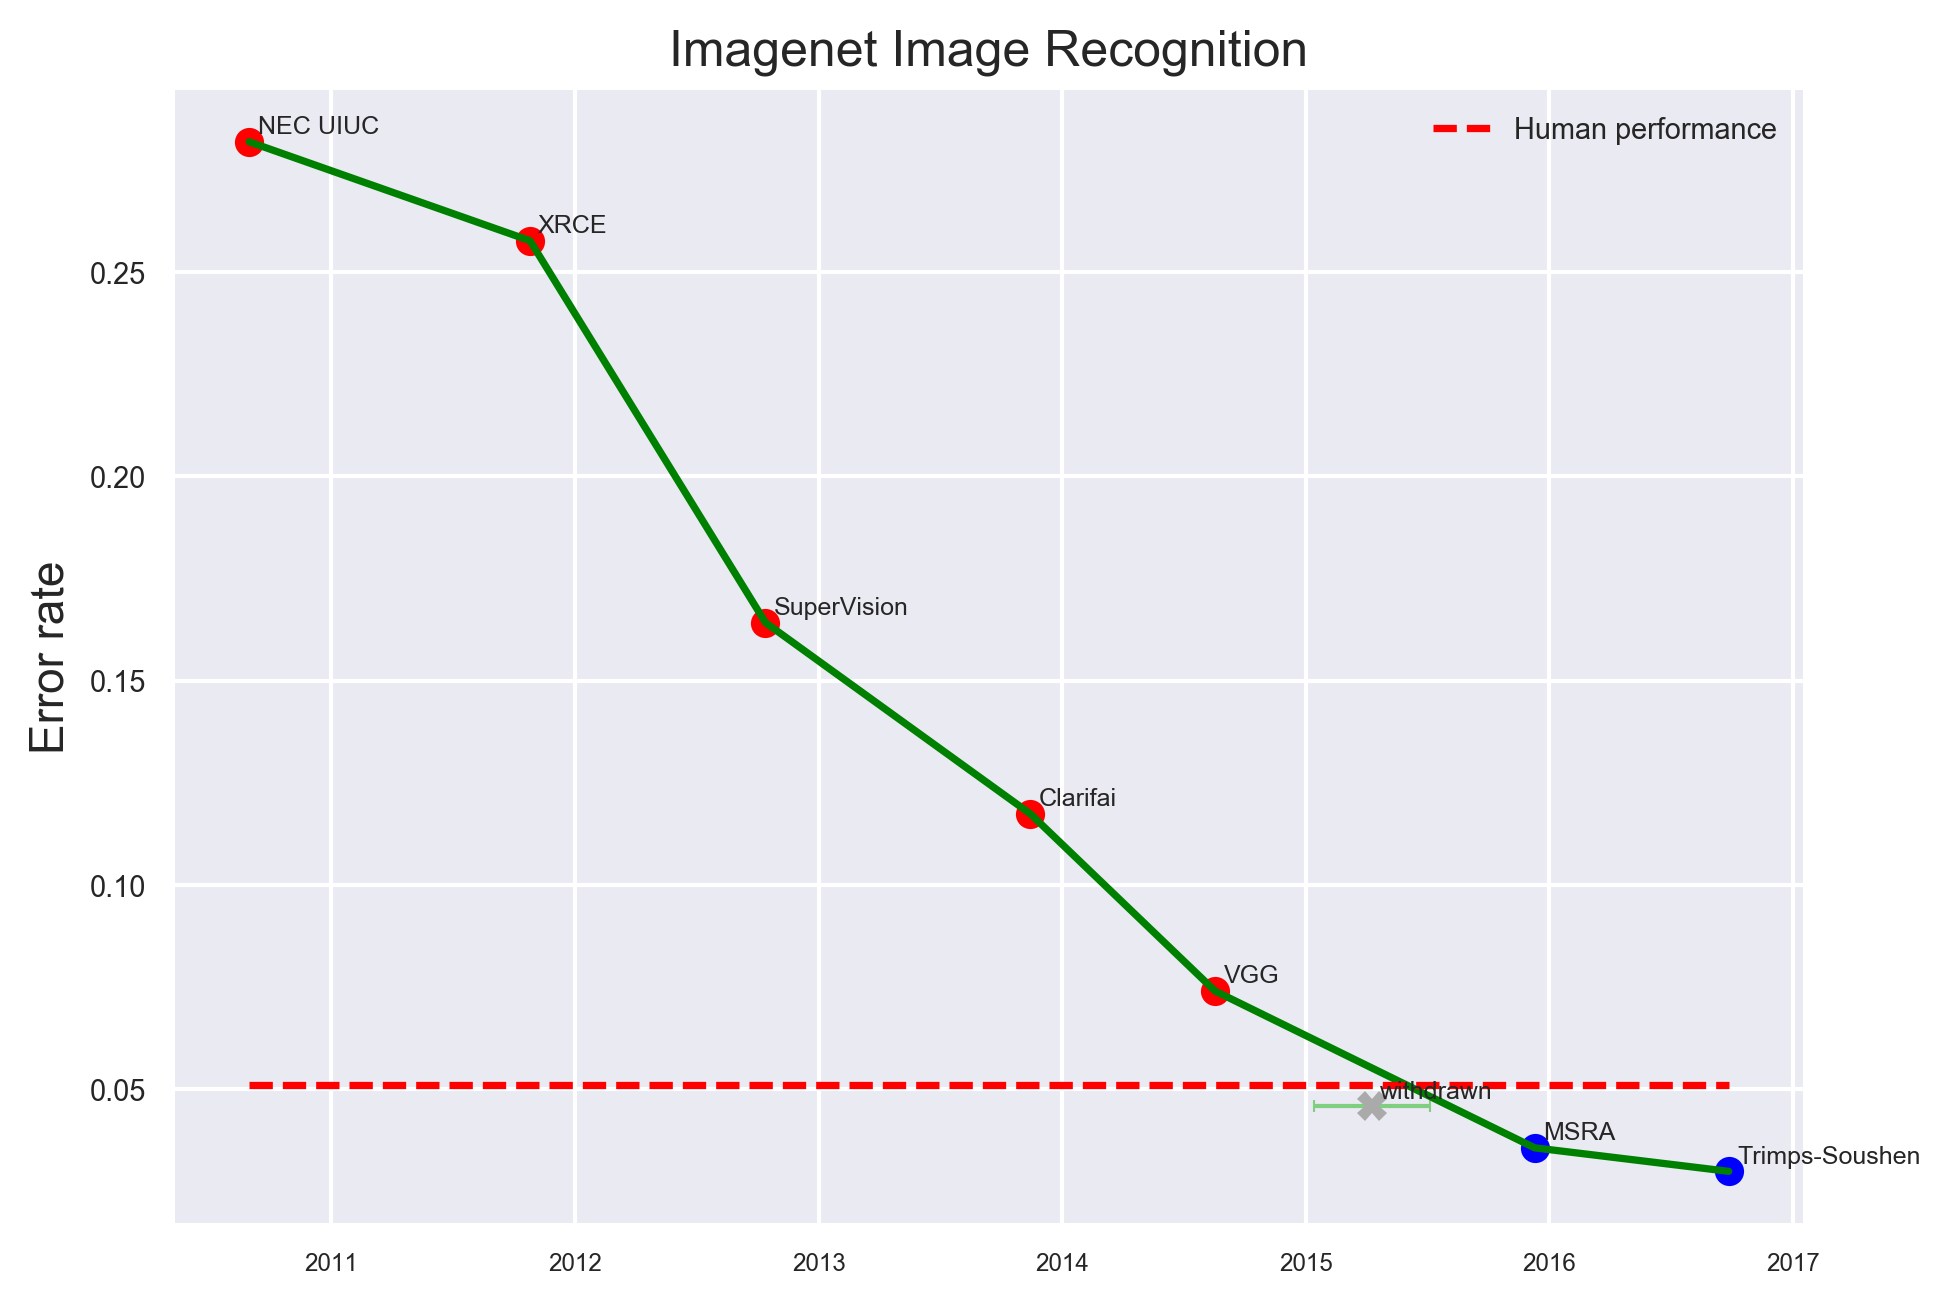

In [94]:
# BEGIN ACTUALLY CLASSIFYING PROBLEMS

vision = Problem("Vision", ["agi", "vision", "world-modelling"])

image_comprehension = Problem("Image comprehension", ["agi", "vision", "language", "world-modelling"])
image_classification = Problem("Image classification", ["vision", "agi"])
image_classification.add_subproblem(image_comprehension)
vision.add_subproblem(image_classification)

imagenet = image_classification.metric("Imagenet Image Recognition", "http://image-net.org", scale=error_rate, target=0.051)
imagenet.notes = """
Correctly label images from the Imagenet dataset. As of 2016, this includes:
 - Object localization for 1000 categories.
 - Object detection for 200 fully labeled categories.
 - Object detection from video for 30 fully labeled categories.
 - Scene classification for 365 scene categories (Joint with MIT Places team) on Places2 Database http://places2.csail.mit.edu.
 - Scene parsing for 150 stuff and discrete object categories (Joint with MIT Places team).
"""
imagenet.measure(date(2010,8,31), 0.28191, "NEC UIUC", "http://image-net.org/challenges/LSVRC/2010/results")
imagenet.measure(date(2011,10,26), 0.2577, "XRCE","http://image-net.org/challenges/LSVRC/2011/results")
imagenet.measure(date(2012,10,13), 0.16422, "SuperVision", "http://image-net.org/challenges/LSVRC/2012/results.html")
imagenet.measure(date(2013,11,14), 0.11743, "Clarifai","http://www.image-net.org/challenges/LSVRC/2013/results.php")
imagenet.measure(date(2014,8,18), 0.07405, "VGG", "http://image-net.org/challenges/LSVRC/2014/index")
imagenet.measure(date(2015,12,10), 0.03567, "MSRA", "http://image-net.org/challenges/LSVRC/2015/results", algorithms=["residual-networks"])
imagenet.measure(date(2016,9,26), 0.02991, "Trimps-Soushen", "http://image-net.org/challenges/LSVRC/2016/results")

# Test automatic detection of withdrawn papers
imagenet.measure(None, 0.0458, "withdrawn", "https://arxiv.org/abs/1501.02876")

video_classification = Problem("Recognise events in videos")
vision.add_subproblem(video_classification)
video_classification.metric("YouTube-8M video labelling", url="https://research.google.com/youtube8m/")
imagenet.graph()

<img src="images/vqa.jpg" style="width: 50%; height: 50%; float: right" float="right">

### Visual Question Answering


Comprehending an image involves more than recognising what objects or entities are within it, but recognising events, relationships, and context from the image. This problem requires both sophisticated image recognition, language, world-modelling, and "image comprehension". There are several datasets in use. The illustration is from VQA, which was generated by asking Amazon Mechanical Turk workers to propose questions about photos from Microsoft's COCO image collection.

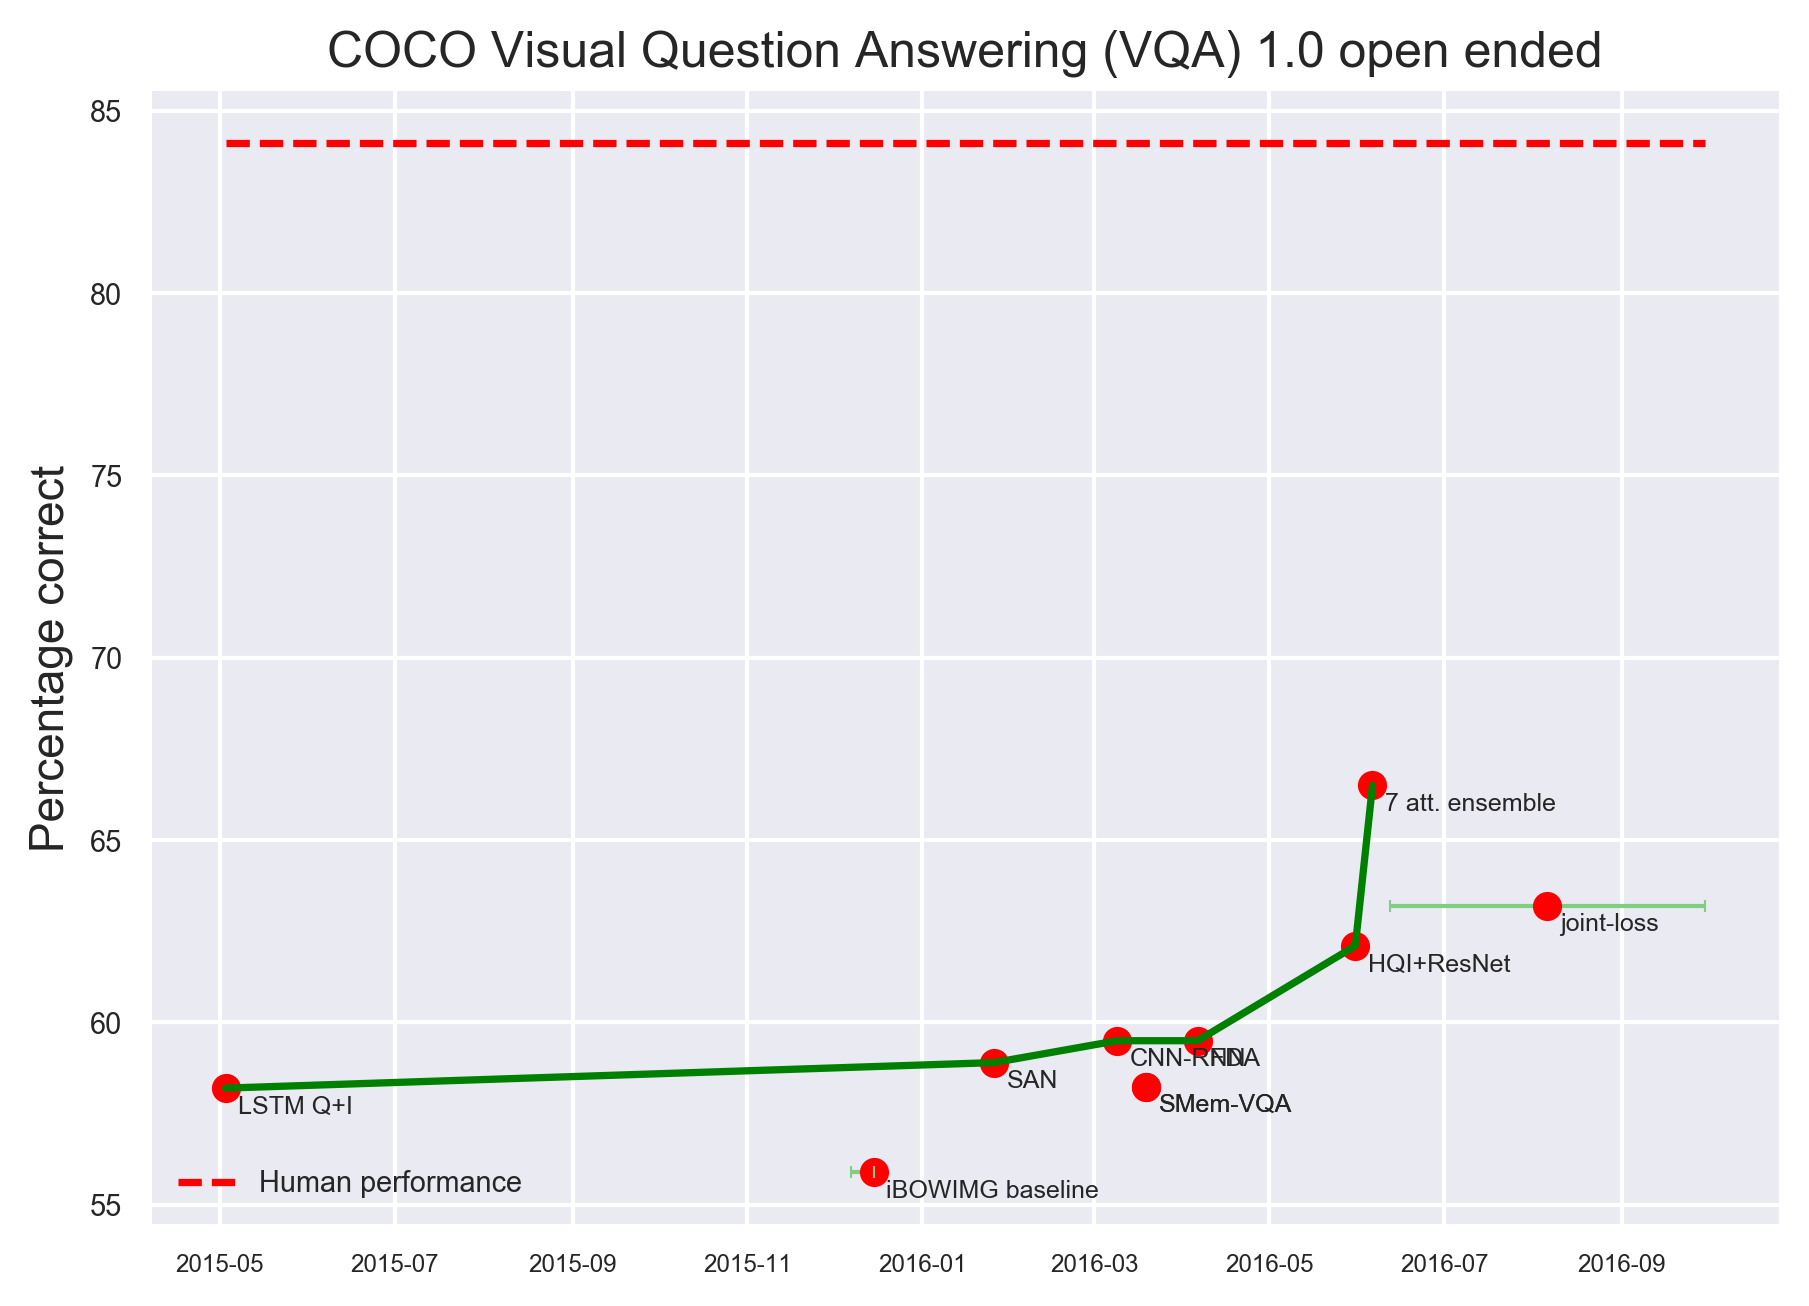

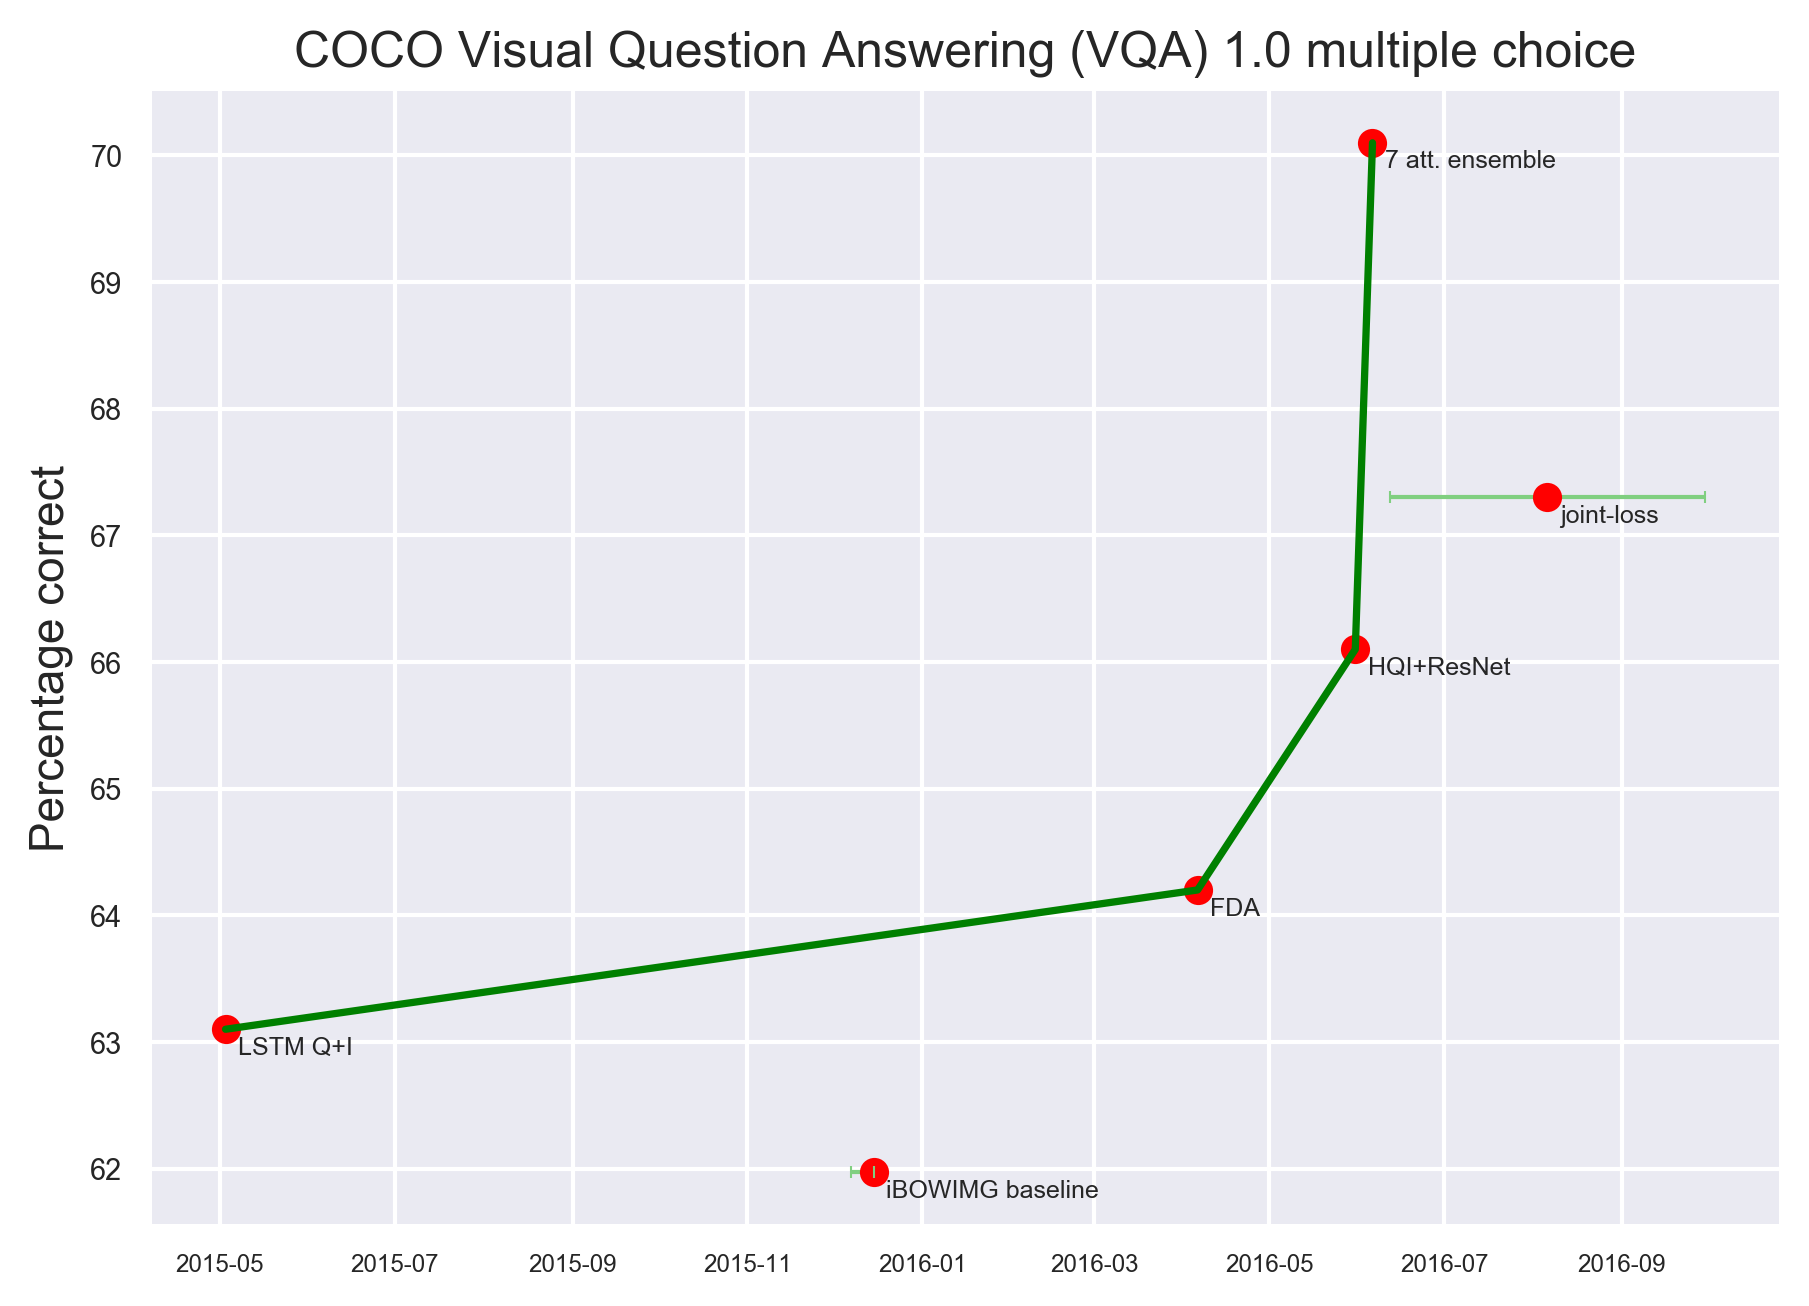

In [95]:
# The VQA paper breaks human performance down by real/abstract image so we need to compute the overall number...
# Also they don't seem to have human performance numbers for VQA multiple choice?
vqa_abstract_human_performance = 87.49
vqa_real_human_performance = 83.3
vqa_imgs = 50000 + 204751.
vqa_target = (50000/vqa_imgs) * vqa_abstract_human_performance + (204751 / vqa_imgs) * vqa_real_human_performance

vqa_oe = image_comprehension.metric("COCO Visual Question Answering (VQA) 1.0 open ended", url="http://visualqa.org/", target=vqa_target, target_source="https://arxiv.org/abs/1505.00468", scale=correct_percent)
vqa_mc = image_comprehension.metric("COCO Visual Question Answering (VQA) 1.0 multiple choice", url="http://visualqa.org/", scale=correct_percent, solved=False)
# other visual question answering metrics (we don't have data for these yet)
# For a survey: https://arxiv.org/pdf/1607.05910
image_comprehension.metric("Toronto COCO-QA", url="http://www.cs.toronto.edu/~mren/imageqa/data/cocoqa/" )
image_comprehension.metric("DAQUAR", url="https://www.mpi-inf.mpg.de/departments/computer-vision-and-multimodal-computing/research/vision-and-language/visual-turing-challenge/", scale=correct_percent, target=60.27, target_source="https://arxiv.org/abs/1505.02074")
visual7w = image_comprehension.metric("Visual7W", url="https://arxiv.org/abs/1511.03416", scale=correct_percent)
image_comprehension.metric("FM-IQA", url="http://idl.baidu.com/FM-IQA.html")
image_comprehension.metric("Visual Madlibs", url="http://tamaraberg.com/visualmadlibs/")


vqa_oe.measure(date(2015,12,15), 55.89, "iBOWIMG baseline", url="https://arxiv.org/abs/1512.02167")
vqa_mc.measure(date(2015,12,15), 61.97, "iBOWIMG baseline", url="https://arxiv.org/abs/1512.02167")

vqa_oe.measure(None, 58.24, "SMem-VQA", url="https://arxiv.org/abs/1511.05234v2")
vqa_oe.measure(None, 58.24, "SMem-VQA", url="https://arxiv.org/abs/1511.05234v2")

# not so clear what the number in the SANv1 paper was...
#vqa_oe.measure(None, 57.6, "SAN(2,CNN)", url="https://arxiv.org/abs/1511.02274v1")
vqa_oe.measure(None, 58.9, "SAN", url="https://arxiv.org/abs/1511.02274v2")

vqa_oe.measure(None, 59.5, "CNN-RNN", url="https://arxiv.org/abs/1603.02814v1")


vqa_oe.measure(None, 59.5, "FDA", url="https://arxiv.org/abs/1604.01485v1")
vqa_mc.measure(None, 64.2, "FDA", url="https://arxiv.org/abs/1604.01485v1")

vqa_oe.measure(None, 62.1, "HQI+ResNet", url="https://arxiv.org/abs/1606.00061v1")
vqa_mc.measure(None, 66.1, "HQI+ResNet", url="https://arxiv.org/abs/1606.00061v1")

vqa_oe.measure(None, 58.2, "LSTM Q+I", url="https://arxiv.org/abs/1505.00468v1")
vqa_mc.measure(None, 63.1, "LSTM Q+I", url="https://arxiv.org/abs/1505.00468v1")

vqa_oe.measure(None, 63.2, "joint-loss", url="https://arxiv.org/abs/1606.03647")
vqa_mc.measure(None, 67.3, "joint-loss", url="https://arxiv.org/abs/1606.03647")

vqa_oe.measure(None, 66.5, "7 att. ensemble", url="https://arxiv.org/abs/1606.01847v1")
vqa_mc.measure(None, 70.1, "7 att. ensemble", url="https://arxiv.org/abs/1606.01847v1")
visual7w.measure(None, 62.2, "MCB+Att.", url="https://arxiv.org/abs/1606.01847v1")

vqa_oe.graph()
vqa_mc.graph()

In [96]:
# hiddencode
# Rodriguo Benenson's "Are We There Yet?" data!
reimport_awty = False
if reimport_awty and not offline:
    # Fetch the summary page
    awty_url = "https://rodrigob.github.io/are_we_there_yet/build/"
    req = requests.get(awty_url)
    page = req.content.replace("</html>", "", 1) # There is a crazy weird </html> near the top of the page that breaks everything
    tree = lxml.html.fromstring(page)

In [97]:
# hiddencode
from urlparse import urlparse
awty_datasets = {}

if reimport_awty and not offline:
    for e in CSSSelector('div.span7')(tree):
        #print dir(e)
        node = e.getchildren()[0].getchildren()[0]
        link = node.attrib["href"]
        metric_name = node.text_content()
        print "%40s" % metric_name, link
        awty_datasets[metric_name] = urlparse(link)

In [98]:
# hiddencode
try:
    got = json.load(open(".awty_cache.json"))
except:
    got = {}
    

# For lots of AWTY data, there's no date but there is a conference, so we can look up the dates that way.
conf_dates = {}


def parse_awty_dataset(name, link, verbose=False):
    if offline or not reimport_awty: return []
    print "# Handling", repr(name), link.geturl()
    if link.path not in got:
        page = requests.get(awty_url + link.path).content
        tree = lxml.html.fromstring(page.replace("</html>", "", 1))
        got[link.path] = tree
    else:
        tree = got[link.path]
    #print dir(tree)
    #print "fragment:", link.fragment
    #print page
    results_section = CSSSelector("div#" + link.fragment)(tree)[0]
    
    rows = CSSSelector("tr")(results_section)
    results = []
    for r in rows[1:]:
        result, paperlink, journal, _ = CSSSelector("td")(r)
        result, papername, journal = [e.text_content() for e in (result, paperlink, journal)]
        if "%" not in result:
            print "# Skipping", result, papername, journal
            continue
        if verbose: 
            print "%6s" % result, "%90s" % papername, "%10s" %journal
        e = CSSSelector("a")(paperlink)
        paper_url = e[0].attrib["href"] if e else None
        results.append((result, papername, paper_url, journal))
    return results

percent_re = re.compile(r'([0-9.]+) *% *(\(?±([0-9\.]+))?')
done = {}
def ingest_awty_dataset(name, metric, label, regex=percent_re):
    if offline or not reimport_awty:
        #print "Offline, not ingesting", name
        return None
    done[name] = True
    for result, papername, paper_url, journal in parse_awty_dataset(name, awty_datasets[name]):
        try:
            match = regex.match(result)
            value = float(match.group(1))
        except AttributeError:
            print "result", result, "does not parse"
            continue

        try:
            uncertainty = float(match.group(3)) if match.group(3) else 0.0
        except IndexError:
            uncertainty = 0.0

        print "%s.measure(%s, %s, '%s', url=%r, papername='%s', uncertainty=%s, venue='%s')" % (
               label, None, value, papername, paper_url,  papername, uncertainty, journal)
        try:
            metric.measure(None, value, papername, url=paper_url, papername=papername, uncertainty=uncertainty, venue=journal)
        except requests.ConnectionError, e:
            print "Network error on {0} ({1}), skipping:".format(paper_url, papername)
            print e

In [99]:
msrc21_pc = image_classification.metric("MSRC-21 image semantic labelling (per-class)", "http://jamie.shotton.org/work/data.html", scale=correct_percent)
msrc21_pp = image_classification.metric("MSRC-21 image semantic labelling (per-pixel)", "http://jamie.shotton.org/work/data.html", scale=correct_percent)


cifar100 = image_classification.metric("CIFAR-100 Image Recognition", "http://https://www.cs.toronto.edu/~kriz/cifar.html", scale=correct_percent)

cifar10 = image_classification.metric("CIFAR-10 Image Recognition", "http://https://www.cs.toronto.edu/~kriz/cifar.html", scale=correct_percent, target=94, target_source="http://karpathy.github.io/2011/04/27/manually-classifying-cifar10/")

svhn = image_classification.metric("Street View House Numbers (SVHN)", "http://ufldl.stanford.edu/housenumbers/", scale=error_percent, target=2.0, target_source="http://ufldl.stanford.edu/housenumbers/nips2011_housenumbers.pdf")

# We declare MNIST solved because the gap between best performance and human performance appears to be less than the uncertainty in human performance
mnist = image_classification.metric("MNIST handwritten digit recognition", "http://yann.lecun.com/exdb/mnist/", scale=error_percent, target=0.2, target_source="http://people.idsia.ch/~juergen/superhumanpatternrecognition.html", solved=True)

# This awty URL broken
mnist.measure(date(2013,2,28), 0.52, 'COSFIRE', 'http://www.rug.nl/research/portal/files/2390194/2013IEEETPAMIAzzopardi.pdf', papername='Trainable COSFIRE Filters for Keypoint Detection and Pattern Recognition')
# awty transcribes what's in this paper, but it seems to somehow have confused, wildly different units from everything else:
for i, m in enumerate(mnist.measures):
    if m.url == "http://personal.ie.cuhk.edu.hk/~ccloy/files/aaai_2015_target_coding.pdf":
        del mnist.measures[i]

stl10 = image_classification.metric("STL-10 Image Recognition", "https://cs.stanford.edu/~acoates/stl10/", scale=correct_percent)
if not offline: ingest_awty_dataset('STL-10', stl10, 'stl10')

leeds_sport_poses = image_classification.metric("Leeds Sport Poses")

if reimport_awty and not offline:
    ingest_awty_dataset('SVHN', svhn, 'svhn')
    ingest_awty_dataset('CIFAR-100', cifar100, 'cifar100')
    ingest_awty_dataset('CIFAR-10', cifar10, 'cifar10')
    ingest_awty_dataset('MNIST', mnist, 'mnist')
    ingest_awty_dataset('MSRC-21', msrc21_pc, 'msrc21_pc')
    ingest_awty_dataset('MSRC-21', msrc21_pp, 'msrc21_pp', regex=re.compile("[0-9.]+ *% */ * ([0-9.]+) *%"))

    for name, link in awty_datasets.items():
        if not link.scheme and name not in done:
            parse_awty_dataset(name, link, verbose=True)

In [100]:
# hiddencode
# Automatically generated AWTY import data, but we may want to start editing these, moving the current name to papername, and adding a short
# algorithm name
# Handling 'MSRC-21' semantic_labeling_datasets_results.html#4d5352432d3231
msrc21_pc.measure(None, 80.9, 'Large-Scale Semantic Co-Labeling of Image Sets', url='http://www.cvc.uab.es/~jalvarez/research_cosegment.php', papername='Large-Scale Semantic Co-Labeling of Image Sets', uncertainty=0.0, venue='WACV 2014')
msrc21_pc.measure(None, 80.0, 'Harmony Potentials - Fusing Local and Global Scale for Semantic Image Segmentation', url='http://link.springer.com/article/10.1007%2Fs11263-011-0449-8', papername='Harmony Potentials - Fusing Local and Global Scale for Semantic Image Segmentation', uncertainty=0.0, venue='IJCV 2012')
msrc21_pc.measure(None, 79.0, 'Describing the Scene as a Whole: Joint Object Detection, Scene Classification and Semantic Segmentation', url='http://ttic.uchicago.edu/~rurtasun/publications/yao_et_al_cvpr12.pdf', papername='Describing the Scene as a Whole: Joint Object Detection, Scene Classification and Semantic Segmentation', uncertainty=0.0, venue='CVPR 2012')
msrc21_pc.measure(None, 78.2, 'Morphological Proximity Priors: Spatial Relationships for Semantic Segmentation', url='http://mediatum.ub.tum.de/doc/1175516/1175516.pdf', papername='Morphological Proximity Priors: Spatial Relationships for Semantic Segmentation', uncertainty=0.0, venue='TUM-I1222 2013')
msrc21_pc.measure(None, 78.0, 'Efficient Inference in Fully Connected CRFs with Gaussian Edge Potentials', url='http://graphics.stanford.edu/projects/densecrf/densecrf.pdf', papername='Efficient Inference in Fully Connected CRFs with Gaussian Edge Potentials', uncertainty=0.0, venue='NIPS 2011')
msrc21_pc.measure(None, 77.0, 'Graph Cut based Inference with Co-occurrence Statistics', url='http://research.microsoft.com/en-us/um/people/pkohli/papers/lrkt_eccv2010.pdf', papername='Graph Cut based Inference with Co-occurrence Statistics', uncertainty=0.0, venue='ECCV 2010')
msrc21_pc.measure(None, 77.0, 'Are Spatial and Global Constraints Really Necessary for Segmentation?', url='http://infoscience.epfl.ch/record/169178/files/lucchi_ICCV11.pdf', papername='Are Spatial and Global Constraints Really Necessary for Segmentation?', uncertainty=0.0, venue='ICCV 2011')
msrc21_pc.measure(None, 76.0, 'Structured Image Segmentation using Kernelized Features', url='http://infoscience.epfl.ch/record/180190', papername='Structured Image Segmentation using Kernelized Features', uncertainty=0.0, venue='ECCV 2012')
msrc21_pc.measure(None, 72.8, 'PatchMatchGraph: Building a Graph of Dense Patch Correspondences for Label Transfer', url='http://users.cecs.anu.edu.au/~sgould/papers/eccv12-patchGraph.pdf', papername='PatchMatchGraph: Building a Graph of Dense Patch Correspondences for Label Transfer', uncertainty=0.0, venue='ECCV 2012')
msrc21_pc.measure(None, 69.0, 'Auto-Context and Its Application to High-Level Vision Tasks and 3D Brain Image Segmentation', url='http://pages.ucsd.edu/~ztu/publication/pami_autocontext.pdf', papername='Auto-Context and Its Application to High-Level Vision Tasks and 3D Brain Image Segmentation', uncertainty=0.0, venue='PAMI 2010')
msrc21_pc.measure(None, 67.0, 'Semantic Texton Forests for Image Categorization and Segmentation', url='http://mi.eng.cam.ac.uk/~cipolla/publications/inproceedings/2008-CVPR-semantic-texton-forests.pdf', papername='Semantic Texton Forests for Image Categorization and Segmentation', uncertainty=0.0, venue='CVPR 2008')
msrc21_pc.measure(None, 57.0, 'TextonBoost for Image Understanding', url='http://research.microsoft.com/pubs/117885/ijcv07a.pdf', papername='TextonBoost for Image Understanding', uncertainty=0.0, venue='IJCV 2009')
#Handling 'MSRC-21' semantic_labeling_datasets_results.html#4d5352432d3231
msrc21_pp.measure(None, 86.8, 'Large-Scale Semantic Co-Labeling of Image Sets', url='http://www.cvc.uab.es/~jalvarez/research_cosegment.php', papername='Large-Scale Semantic Co-Labeling of Image Sets', uncertainty=0.0, venue='WACV 2014')
msrc21_pp.measure(None, 83.0, 'Harmony Potentials - Fusing Local and Global Scale for Semantic Image Segmentation', url='http://link.springer.com/article/10.1007%2Fs11263-011-0449-8', papername='Harmony Potentials - Fusing Local and Global Scale for Semantic Image Segmentation', uncertainty=0.0, venue='IJCV 2012')
msrc21_pp.measure(None, 86.0, 'Describing the Scene as a Whole: Joint Object Detection, Scene Classification and Semantic Segmentation', url='http://ttic.uchicago.edu/~rurtasun/publications/yao_et_al_cvpr12.pdf', papername='Describing the Scene as a Whole: Joint Object Detection, Scene Classification and Semantic Segmentation', uncertainty=0.0, venue='CVPR 2012')
msrc21_pp.measure(None, 85.0, 'Morphological Proximity Priors: Spatial Relationships for Semantic Segmentation', url='http://mediatum.ub.tum.de/doc/1175516/1175516.pdf', papername='Morphological Proximity Priors: Spatial Relationships for Semantic Segmentation', uncertainty=0.0, venue='TUM-I1222 2013')
msrc21_pp.measure(None, 86.0, 'Efficient Inference in Fully Connected CRFs with Gaussian Edge Potentials', url='http://graphics.stanford.edu/projects/densecrf/densecrf.pdf', papername='Efficient Inference in Fully Connected CRFs with Gaussian Edge Potentials', uncertainty=0.0, venue='NIPS 2011')
msrc21_pp.measure(None, 87.0, 'Graph Cut based Inference with Co-occurrence Statistics', url='http://research.microsoft.com/en-us/um/people/pkohli/papers/lrkt_eccv2010.pdf', papername='Graph Cut based Inference with Co-occurrence Statistics', uncertainty=0.0, venue='ECCV 2010')
msrc21_pp.measure(None, 85.0, 'Are Spatial and Global Constraints Really Necessary for Segmentation?', url='http://infoscience.epfl.ch/record/169178/files/lucchi_ICCV11.pdf', papername='Are Spatial and Global Constraints Really Necessary for Segmentation?', uncertainty=0.0, venue='ICCV 2011')
msrc21_pp.measure(None, 82.0, 'Structured Image Segmentation using Kernelized Features', url='http://infoscience.epfl.ch/record/180190', papername='Structured Image Segmentation using Kernelized Features', uncertainty=0.0, venue='ECCV 2012')
msrc21_pp.measure(None, 79.0, 'PatchMatchGraph: Building a Graph of Dense Patch Correspondences for Label Transfer', url='http://users.cecs.anu.edu.au/~sgould/papers/eccv12-patchGraph.pdf', papername='PatchMatchGraph: Building a Graph of Dense Patch Correspondences for Label Transfer', uncertainty=0.0, venue='ECCV 2012')
msrc21_pp.measure(None, 78.0, 'Auto-Context and Its Application to High-Level Vision Tasks and 3D Brain Image Segmentation', url='http://pages.ucsd.edu/~ztu/publication/pami_autocontext.pdf', papername='Auto-Context and Its Application to High-Level Vision Tasks and 3D Brain Image Segmentation', uncertainty=0.0, venue='PAMI 2010')
msrc21_pp.measure(None, 72.0, 'Semantic Texton Forests for Image Categorization and Segmentation', url='http://mi.eng.cam.ac.uk/~cipolla/publications/inproceedings/2008-CVPR-semantic-texton-forests.pdf', papername='Semantic Texton Forests for Image Categorization and Segmentation', uncertainty=0.0, venue='CVPR 2008')
msrc21_pp.measure(None, 72.0, 'TextonBoost for Image Understanding', url='http://research.microsoft.com/pubs/117885/ijcv07a.pdf', papername='TextonBoost for Image Understanding', uncertainty=0.0, venue='IJCV 2009')


#Handling 'CIFAR-100' classification_datasets_results.html#43494641522d313030
cifar100.measure(None, 75.72, 'Fast and Accurate Deep Network Learning by Exponential Linear Units', url='http://arxiv.org/abs/1511.07289', papername='Fast and Accurate Deep Network Learning by Exponential Linear Units', uncertainty=0.0, venue='arXiv 2015')
cifar100.measure(None, 75.7, 'Spatially-sparse convolutional neural networks', url='http://arxiv.org/abs/1409.6070', papername='Spatially-sparse convolutional neural networks', uncertainty=0.0, venue='arXiv 2014')
cifar100.measure(None, 73.61, 'Fractional Max-Pooling', url='http://arxiv.org/abs/1412.6071', papername='Fractional Max-Pooling', uncertainty=0.0, venue='arXiv 2015')
cifar100.measure(None, 72.6, 'Scalable Bayesian Optimization Using Deep Neural Networks', url='http://arxiv.org/abs/1502.05700', papername='Scalable Bayesian Optimization Using Deep Neural Networks', uncertainty=0.0, venue='ICML 2015')
cifar100.measure(None, 72.44, 'Competitive Multi-scale Convolution', url='http://arxiv.org/abs/1511.05635', papername='Competitive Multi-scale Convolution', uncertainty=0.0, venue='arXiv 2015')
cifar100.measure(None, 72.34, 'All you need is a good init', url='http://arxiv.org/abs/1511.06422', papername='All you need is a good init', uncertainty=0.0, venue='ICLR 2015')
cifar100.measure(None, 71.14, 'Batch-normalized Maxout Network in Network', url='http://arxiv.org/abs/1511.02583', papername='Batch-normalized Maxout Network in Network', uncertainty=0.0, venue='arXiv 2015')
cifar100.measure(None, 70.8, 'On the Importance of Normalisation Layers in Deep Learning with Piecewise Linear Activation Units', url='http://arxiv.org/abs/1508.00330', papername='On the Importance of Normalisation Layers in Deep Learning with Piecewise Linear Activation Units', uncertainty=0.0, venue='arXiv 2015')
cifar100.measure(None, 69.17, 'Learning Activation Functions to Improve Deep Neural Networks', url='http://arxiv.org/abs/1412.6830', papername='Learning Activation Functions to Improve Deep Neural Networks', uncertainty=0.0, venue='ICLR 2015')
cifar100.measure(None, 69.12, 'Stacked What-Where Auto-encoders', url='http://arxiv.org/abs/1506.02351', papername='Stacked What-Where Auto-encoders', uncertainty=0.0, venue='arXiv 2015')
cifar100.measure(None, 68.53, 'Multi-Loss Regularized Deep Neural Network', url='http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=7258343', papername='Multi-Loss Regularized Deep Neural Network', uncertainty=0.0, venue='CSVT 2015')
cifar100.measure(None, 68.4, 'Spectral Representations for Convolutional Neural Networks', url='http://papers.nips.cc/paper/5649-spectral-representations-for-convolutional-neural-networks.pdf', papername='Spectral Representations for Convolutional Neural Networks', uncertainty=0.0, venue='NIPS 2015')
cifar100.measure(None, 68.25, 'Recurrent Convolutional Neural Network for Object Recognition', url='http://www.cv-foundation.org/openaccess/content_cvpr_2015/app/2B_004.pdf', papername='Recurrent Convolutional Neural Network for Object Recognition', uncertainty=0.0, venue='CVPR 2015')
cifar100.measure(None, 67.76, 'Training Very Deep Networks', url='http://people.idsia.ch/~rupesh/very_deep_learning/', papername='Training Very Deep Networks', uncertainty=0.0, venue='NIPS 2015')
cifar100.measure(None, 67.68, 'Deep Convolutional Neural Networks as Generic Feature Extractors', url='http://www.isip.uni-luebeck.de/fileadmin/uploads/tx_wapublications/hertel_ijcnn_2015.pdf', papername='Deep Convolutional Neural Networks as Generic Feature Extractors', uncertainty=0.0, venue='IJCNN 2015')
cifar100.measure(None, 67.63, 'Generalizing Pooling Functions in Convolutional Neural Networks: Mixed, Gated, and Tree', url='http://arxiv.org/abs/1509.08985', papername='Generalizing Pooling Functions in Convolutional Neural Networks: Mixed, Gated, and Tree', uncertainty=0.0, venue='AISTATS 2016')
cifar100.measure(None, 67.38, 'HD-CNN: Hierarchical Deep Convolutional Neural Network for Large Scale Visual Recognition', url='https://sites.google.com/site/homepagezhichengyan/home/hdcnn', papername='HD-CNN: Hierarchical Deep Convolutional Neural Network for Large Scale Visual Recognition', uncertainty=0.0, venue='ICCV 2015')
cifar100.measure(None, 67.16, 'Universum Prescription: Regularization using Unlabeled Data', url='http://arxiv.org/abs/1511.03719', papername='Universum Prescription: Regularization using Unlabeled Data', uncertainty=0.0, venue='arXiv 2015')
cifar100.measure(None, 66.29, 'Striving for Simplicity: The All Convolutional Net', url='http://arxiv.org/pdf/1412.6806.pdf', papername='Striving for Simplicity: The All Convolutional Net', uncertainty=0.0, venue='ICLR 2014')
cifar100.measure(None, 66.22, 'Deep Networks with Internal Selective Attention through Feedback Connections', url='http://papers.nips.cc/paper/5276-deep-networks-with-internal-selective-attention-through-feedback-connections.pdf', papername='Deep Networks with Internal Selective Attention through Feedback Connections', uncertainty=0.0, venue='NIPS 2014')
cifar100.measure(None, 65.43, 'Deeply-Supervised Nets', url='http://vcl.ucsd.edu/~sxie/2014/09/12/dsn-project/', papername='Deeply-Supervised Nets', uncertainty=0.0, venue='arXiv 2014')
cifar100.measure(None, 64.77, 'Deep Representation Learning with Target Coding', url='http://personal.ie.cuhk.edu.hk/~ccloy/files/aaai_2015_target_coding.pdf', papername='Deep Representation Learning with Target Coding', uncertainty=0.0, venue='AAAI 2015')
cifar100.measure(None, 64.32, 'Network in Network', url='http://openreview.net/document/9b05a3bb-3a5e-49cb-91f7-0f482af65aea#9b05a3bb-3a5e-49cb-91f7-0f482af65aea', papername='Network in Network', uncertainty=0.0, venue='ICLR 2014')
cifar100.measure(None, 63.15, 'Discriminative Transfer Learning with Tree-based Priors', url='http://www.cs.toronto.edu/~nitish/treebasedpriors.pdf', papername='Discriminative Transfer Learning with Tree-based Priors', uncertainty=0.0, venue='NIPS 2013')
cifar100.measure(None, 61.86, 'Improving Deep Neural Networks with Probabilistic Maxout Units', url='http://openreview.net/document/28d9c3ab-fe88-4836-b898-403d207a037c#28d9c3ab-fe88-4836-b898-403d207a037c', papername='Improving Deep Neural Networks with Probabilistic Maxout Units', uncertainty=0.0, venue='ICLR 2014')
cifar100.measure(None, 61.43, 'Maxout Networks', url='http://jmlr.org/proceedings/papers/v28/goodfellow13.pdf', papername='Maxout Networks', uncertainty=0.0, venue='ICML 2013')
cifar100.measure(None, 60.8, 'Stable and Efficient Representation Learning with Nonnegativity Constraints ', url='http://jmlr.org/proceedings/papers/v32/line14.pdf', papername='Stable and Efficient Representation Learning with Nonnegativity Constraints ', uncertainty=0.0, venue='ICML 2014')
cifar100.measure(None, 59.75, 'Empirical Evaluation of Rectified Activations in Convolution Network', url='http://arxiv.org/pdf/1505.00853.pdf', papername='Empirical Evaluation of Rectified Activations in Convolution Network', uncertainty=0.0, venue='ICML workshop 2015')
cifar100.measure(None, 57.49, 'Stochastic Pooling for Regularization of Deep Convolutional Neural Networks', url='http://arxiv.org/pdf/1301.3557.pdf', papername='Stochastic Pooling for Regularization of Deep Convolutional Neural Networks', uncertainty=0.0, venue='arXiv 2013')
cifar100.measure(None, 56.29, 'Learning Smooth Pooling Regions for Visual Recognition', url='http://www.d2.mpi-inf.mpg.de/content/learning-smooth-pooling-regions-visual-recognition', papername='Learning Smooth Pooling Regions for Visual Recognition', uncertainty=0.0, venue='BMVC 2013')
cifar100.measure(None, 54.23, 'Beyond Spatial Pyramids: Receptive Field Learning for Pooled Image Features', url='http://www.eecs.berkeley.edu/~jiayq/assets/pdf/cvpr12_pooling.pdf', papername='Beyond Spatial Pyramids: Receptive Field Learning for Pooled Image Features', uncertainty=0.0, venue='CVPR 2012')

#Handling 'CIFAR-10' classification_datasets_results.html#43494641522d3130
cifar10.measure(None, 96.53, 'Fractional Max-Pooling', url='http://arxiv.org/abs/1412.6071', papername='Fractional Max-Pooling', uncertainty=0.0, venue='arXiv 2015')
cifar10.measure(None, 95.59, 'Striving for Simplicity: The All Convolutional Net', url='http://arxiv.org/pdf/1412.6806.pdf', papername='Striving for Simplicity: The All Convolutional Net', uncertainty=0.0, venue='ICLR 2015')
cifar10.measure(None, 94.16, 'All you need is a good init', url='http://arxiv.org/abs/1511.06422', papername='All you need is a good init', uncertainty=0.0, venue='ICLR 2016')
cifar10.measure(None, 94.0, 'Lessons learned from manually classifying CIFAR-10', url='http://karpathy.github.io/2011/04/27/manually-classifying-cifar10/', papername='Lessons learned from manually classifying CIFAR-10', uncertainty=0.0, venue='unpublished 2011')
#Skipping aparent source paper http://karpathy.github.io/2011/04/27/manually-classifying-cifar10/
cifar10.measure(None, 93.95, 'Generalizing Pooling Functions in Convolutional Neural Networks: Mixed, Gated, and Tree', url='http://arxiv.org/abs/1509.08985', papername='Generalizing Pooling Functions in Convolutional Neural Networks: Mixed, Gated, and Tree', uncertainty=0.0, venue='AISTATS 2016')
cifar10.measure(None, 93.72, 'Spatially-sparse convolutional neural networks', url='http://arxiv.org/abs/1409.6070', papername='Spatially-sparse convolutional neural networks', uncertainty=0.0, venue='arXiv 2014')
cifar10.measure(None, 93.63, 'Scalable Bayesian Optimization Using Deep Neural Networks', url='http://arxiv.org/abs/1502.05700', papername='Scalable Bayesian Optimization Using Deep Neural Networks', uncertainty=0.0, venue='ICML 2015')
cifar10.measure(None, 93.57, 'Deep Residual Learning for Image Recognition', url='http://arxiv.org/abs/1512.03385', papername='Deep Residual Learning for Image Recognition', uncertainty=0.0, venue='arXiv 2015')
cifar10.measure(None, 93.45, 'Fast and Accurate Deep Network Learning by Exponential Linear Units', url='http://arxiv.org/abs/1511.07289', papername='Fast and Accurate Deep Network Learning by Exponential Linear Units', uncertainty=0.0, venue='arXiv 2015')
cifar10.measure(None, 93.34, 'Universum Prescription: Regularization using Unlabeled Data', url='http://arxiv.org/abs/1511.03719', papername='Universum Prescription: Regularization using Unlabeled Data', uncertainty=0.0, venue='arXiv 2015')
cifar10.measure(None, 93.25, 'Batch-normalized Maxout Network in Network', url='http://arxiv.org/abs/1511.02583', papername='Batch-normalized Maxout Network in Network', uncertainty=0.0, venue='arXiv 2015')
cifar10.measure(None, 93.13, 'Competitive Multi-scale Convolution', url='http://arxiv.org/abs/1511.05635', papername='Competitive Multi-scale Convolution', uncertainty=0.0, venue='arXiv 2015')
cifar10.measure(None, 92.91, 'Recurrent Convolutional Neural Network for Object Recognition', url='http://www.cv-foundation.org/openaccess/content_cvpr_2015/app/2B_004.pdf', papername='Recurrent Convolutional Neural Network for Object Recognition', uncertainty=0.0, venue='CVPR 2015')
cifar10.measure(None, 92.49, 'Learning Activation Functions to Improve Deep Neural Networks', url='http://arxiv.org/abs/1412.6830', papername='Learning Activation Functions to Improve Deep Neural Networks', uncertainty=0.0, venue='ICLR 2015')
cifar10.measure(None, 92.45, 'cifar.torch', url='http://torch.ch/blog/2015/07/30/cifar.html', papername='cifar.torch', uncertainty=0.0, venue='unpublished 2015')
cifar10.measure(None, 92.4, 'Training Very Deep Networks', url='http://people.idsia.ch/~rupesh/very_deep_learning/', papername='Training Very Deep Networks', uncertainty=0.0, venue='NIPS 2015')
cifar10.measure(None, 92.23, 'Stacked What-Where Auto-encoders', url='http://arxiv.org/abs/1506.02351', papername='Stacked What-Where Auto-encoders', uncertainty=0.0, venue='arXiv 2015')
cifar10.measure(None, 91.88, 'Multi-Loss Regularized Deep Neural Network', url='http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=7258343', papername='Multi-Loss Regularized Deep Neural Network', uncertainty=0.0, venue='CSVT 2015')
cifar10.measure(None, 91.78, 'Deeply-Supervised Nets', url='http://vcl.ucsd.edu/~sxie/2014/09/12/dsn-project/', papername='Deeply-Supervised Nets', uncertainty=0.0, venue='arXiv 2014')
cifar10.measure(None, 91.73, 'BinaryConnect: Training Deep Neural Networks with binary weights during propagations', url='http://papers.nips.cc/paper/5647-binaryconnect-training-deep-neural-networks-with-binary-weights-during-propagations.pdf', papername='BinaryConnect: Training Deep Neural Networks with binary weights during propagations', uncertainty=0.0, venue='NIPS 2015')
cifar10.measure(None, 91.48, 'On the Importance of Normalisation Layers in Deep Learning with Piecewise Linear Activation Units', url='http://arxiv.org/abs/1508.00330', papername='On the Importance of Normalisation Layers in Deep Learning with Piecewise Linear Activation Units', uncertainty=0.0, venue='arXiv 2015')
cifar10.measure(None, 91.4, 'Spectral Representations for Convolutional Neural Networks', url='http://papers.nips.cc/paper/5649-spectral-representations-for-convolutional-neural-networks.pdf', papername='Spectral Representations for Convolutional Neural Networks', uncertainty=0.0, venue='NIPS 2015')
cifar10.measure(None, 91.2, 'Network In Network', url='http://openreview.net/document/9b05a3bb-3a5e-49cb-91f7-0f482af65aea#9b05a3bb-3a5e-49cb-91f7-0f482af65aea', papername='Network In Network', uncertainty=0.0, venue='ICLR 2014')
cifar10.measure(None, 91.19, 'Speeding up Automatic Hyperparameter Optimization of Deep Neural Networks by Extrapolation of Learning Curves', url='http://aad.informatik.uni-freiburg.de/papers/15-IJCAI-Extrapolation_of_Learning_Curves.pdf', papername='Speeding up Automatic Hyperparameter Optimization of Deep Neural Networks by Extrapolation of Learning Curves', uncertainty=0.0, venue='IJCAI 2015')
cifar10.measure(None, 90.78, 'Deep Networks with Internal Selective Attention through Feedback Connections', url='http://papers.nips.cc/paper/5276-deep-networks-with-internal-selective-attention-through-feedback-connections.pdf', papername='Deep Networks with Internal Selective Attention through Feedback Connections', uncertainty=0.0, venue='NIPS 2014')
cifar10.measure(None, 90.68, 'Regularization of Neural Networks using DropConnect', url='http://cs.nyu.edu/~wanli/dropc/', papername='Regularization of Neural Networks using DropConnect', uncertainty=0.0, venue='ICML 2013')
cifar10.measure(None, 90.65, 'Maxout Networks', url='http://jmlr.org/proceedings/papers/v28/goodfellow13.pdf', papername='Maxout Networks', uncertainty=0.0, venue='ICML 2013')
cifar10.measure(None, 90.61, 'Improving Deep Neural Networks with Probabilistic Maxout Units', url='http://openreview.net/document/28d9c3ab-fe88-4836-b898-403d207a037c#28d9c3ab-fe88-4836-b898-403d207a037c', papername='Improving Deep Neural Networks with Probabilistic Maxout Units', uncertainty=0.0, venue='ICLR 2014')
cifar10.measure(None, 90.5, 'Practical Bayesian Optimization of Machine Learning Algorithms ', url='http://papers.nips.cc/paper/4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf', papername='Practical Bayesian Optimization of Machine Learning Algorithms ', uncertainty=0.0, venue='NIPS 2012')
cifar10.measure(None, 89.67, 'APAC: Augmented PAttern Classification with Neural Networks', url='http://arxiv.org/abs/1505.03229', papername='APAC: Augmented PAttern Classification with Neural Networks', uncertainty=0.0, venue='arXiv 2015')
cifar10.measure(None, 89.14, 'Deep Convolutional Neural Networks as Generic Feature Extractors', url='http://www.isip.uni-luebeck.de/fileadmin/uploads/tx_wapublications/hertel_ijcnn_2015.pdf', papername='Deep Convolutional Neural Networks as Generic Feature Extractors', uncertainty=0.0, venue='IJCNN 2015')
cifar10.measure(None, 89.0, 'ImageNet Classification with Deep Convolutional Neural Networks', url='http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks', papername='ImageNet Classification with Deep Convolutional Neural Networks', uncertainty=0.0, venue='NIPS 2012')
cifar10.measure(None, 88.8, 'Empirical Evaluation of Rectified Activations in Convolution Network', url='http://arxiv.org/pdf/1505.00853.pdf', papername='Empirical Evaluation of Rectified Activations in Convolution Network', uncertainty=0.0, venue='ICML workshop 2015')
cifar10.measure(None, 88.79, 'Multi-Column Deep Neural Networks for Image Classification ', url='http://www.idsia.ch/~ciresan/data/cvpr2012.pdf', papername='Multi-Column Deep Neural Networks for Image Classification ', uncertainty=0.0, venue='CVPR 2012')
cifar10.measure(None, 87.65, 'ReNet: A Recurrent Neural Network Based Alternative to Convolutional Networks', url='http://arxiv.org/abs/1505.00393', papername='ReNet: A Recurrent Neural Network Based Alternative to Convolutional Networks', uncertainty=0.0, venue='arXiv 2015')
cifar10.measure(None, 86.7, 'An Analysis of Unsupervised Pre-training in Light of Recent Advances', url='http://arxiv.org/abs/1412.6597', papername='An Analysis of Unsupervised Pre-training in Light of Recent Advances', uncertainty=0.0, venue='ICLR 2015')
cifar10.measure(None, 84.87, 'Stochastic Pooling for Regularization of Deep Convolutional Neural Networks', url='http://arxiv.org/pdf/1301.3557.pdf', papername='Stochastic Pooling for Regularization of Deep Convolutional Neural Networks', uncertainty=0.0, venue='arXiv 2013')
cifar10.measure(None, 84.4, 'Improving neural networks by preventing co-adaptation of feature detectors', url='http://arxiv.org/pdf/1207.0580.pdf', papername='Improving neural networks by preventing co-adaptation of feature detectors', uncertainty=0.0, venue='arXiv 2012')
cifar10.measure(None, 83.96, 'Discriminative Learning of Sum-Product Networks', url='http://papers.nips.cc/paper/4516-discriminative-learning-of-sum-product-networks', papername='Discriminative Learning of Sum-Product Networks', uncertainty=0.0, venue='NIPS 2012')
cifar10.measure(None, 82.9, 'Stable and Efficient Representation Learning with Nonnegativity Constraints ', url='http://jmlr.org/proceedings/papers/v32/line14.pdf', papername='Stable and Efficient Representation Learning with Nonnegativity Constraints ', uncertainty=0.0, venue='ICML 2014')
cifar10.measure(None, 82.2, 'Learning Invariant Representations with Local Transformations', url='http://icml.cc/2012/papers/659.pdf', papername='Learning Invariant Representations with Local Transformations', uncertainty=0.0, venue='ICML 2012')
cifar10.measure(None, 82.18, 'Convolutional Kernel Networks', url='http://arxiv.org/abs/1406.3332', papername='Convolutional Kernel Networks', uncertainty=0.0, venue='arXiv 2014')
cifar10.measure(None, 82.0, 'Discriminative Unsupervised Feature Learning with Convolutional Neural Networks', url='http://papers.nips.cc/paper/5548-discriminative-unsupervised-feature-learning-with-convolutional-neural-networks.pdf', papername='Discriminative Unsupervised Feature Learning with Convolutional Neural Networks', uncertainty=0.0, venue='NIPS 2014')
cifar10.measure(None, 80.02, 'Learning Smooth Pooling Regions for Visual Recognition', url='http://www.d2.mpi-inf.mpg.de/content/learning-smooth-pooling-regions-visual-recognition', papername='Learning Smooth Pooling Regions for Visual Recognition', uncertainty=0.0, venue='BMVC 2013')
cifar10.measure(None, 80.0, 'Object Recognition with Hierarchical Kernel Descriptors', url='http://research.cs.washington.edu/istc/lfb/paper/cvpr11.pdf', papername='Object Recognition with Hierarchical Kernel Descriptors', uncertainty=0.0, venue='CVPR 2011')
cifar10.measure(None, 79.7, 'Learning with Recursive Perceptual Representations', url='http://papers.nips.cc/paper/4747-learning-with-recursive-perceptual-representations', papername='Learning with Recursive Perceptual Representations', uncertainty=0.0, venue='NIPS 2012')
cifar10.measure(None, 79.6, 'An Analysis of Single-Layer Networks in Unsupervised Feature Learning ', url='http://www.stanford.edu/~acoates/papers/coatesleeng_aistats_2011.pdf', papername='An Analysis of Single-Layer Networks in Unsupervised Feature Learning ', uncertainty=0.0, venue='AISTATS 2011')
cifar10.measure(None, 78.67, 'PCANet: A Simple Deep Learning Baseline for Image Classification?', url='http://arxiv.org/abs/1404.3606', papername='PCANet: A Simple Deep Learning Baseline for Image Classification?', uncertainty=0.0, venue='arXiv 2014')
cifar10.measure(None, 75.86, 'Enhanced Image Classification With a Fast-Learning Shallow Convolutional Neural Network', url='http://arxiv.org/abs/1503.04596', papername='Enhanced Image Classification With a Fast-Learning Shallow Convolutional Neural Network', uncertainty=0.0, venue='arXiv 2015')

#Handling 'SVHN' classification_datasets_results.html#5356484e
svhn.measure(None, 1.69, 'Generalizing Pooling Functions in Convolutional Neural Networks: Mixed, Gated, and Tree', url='http://arxiv.org/abs/1509.08985', papername='Generalizing Pooling Functions in Convolutional Neural Networks: Mixed, Gated, and Tree', uncertainty=0.0, venue='AISTATS 2016')
svhn.measure(None, 1.76, 'Competitive Multi-scale Convolution', url='http://arxiv.org/abs/1511.05635', papername='Competitive Multi-scale Convolution', uncertainty=0.0, venue='arXiv 2015')
svhn.measure(None, 1.77, 'Recurrent Convolutional Neural Network for Object Recognition', url='http://www.cv-foundation.org/openaccess/content_cvpr_2015/app/2B_004.pdf', papername='Recurrent Convolutional Neural Network for Object Recognition', uncertainty=0.0, venue='CVPR 2015')
svhn.measure(None, 1.81, 'Batch-normalized Maxout Network in Network', url='http://arxiv.org/abs/1511.02583', papername='Batch-normalized Maxout Network in Network', uncertainty=0.0, venue='arXiv 2015')
svhn.measure(None, 1.92, 'Deeply-Supervised Nets', url='http://vcl.ucsd.edu/~sxie/2014/09/12/dsn-project/', papername='Deeply-Supervised Nets', uncertainty=0.0, venue='arXiv 2014')
svhn.measure(None, 1.92, 'Multi-Loss Regularized Deep Neural Network', url='http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=7258343', papername='Multi-Loss Regularized Deep Neural Network', uncertainty=0.0, venue='CSVT 2015')
svhn.measure(None, 1.94, 'Regularization of Neural Networks using DropConnect', url='http://cs.nyu.edu/~wanli/dropc/', papername='Regularization of Neural Networks using DropConnect', uncertainty=0.0, venue='ICML 2013')
svhn.measure(None, 1.97, 'On the Importance of Normalisation Layers in Deep Learning with Piecewise Linear Activation Units', url='http://arxiv.org/abs/1508.00330', papername='On the Importance of Normalisation Layers in Deep Learning with Piecewise Linear Activation Units', uncertainty=0.0, venue='arXiv 2015')
svhn.measure(None, 2.0, 'Estimated human performance', url='http://ufldl.stanford.edu/housenumbers/nips2011_housenumbers.pdf', papername='Estimated human performance', uncertainty=0.0, venue='NIPS 2011')
# Skipping aparent source paper http://ufldl.stanford.edu/housenumbers/nips2011_housenumbers.pdf
svhn.measure(None, 2.15, 'BinaryConnect: Training Deep Neural Networks with binary weights during propagations', url='http://papers.nips.cc/paper/5647-binaryconnect-training-deep-neural-networks-with-binary-weights-during-propagations.pdf', papername='BinaryConnect: Training Deep Neural Networks with binary weights during propagations', uncertainty=0.0, venue='NIPS 2015')
svhn.measure(None, 2.16, 'Multi-digit Number Recognition from Street View Imagery using Deep Convolutional Neural Networks', url='http://openreview.net/document/0c571b22-f4b6-4d58-87e4-99d7de42a893#0c571b22-f4b6-4d58-87e4-99d7de42a893', papername='Multi-digit Number Recognition from Street View Imagery using Deep Convolutional Neural Networks', uncertainty=0.0, venue='ICLR 2014')
svhn.measure(None, 2.35, 'Network in Network', url='http://openreview.net/document/9b05a3bb-3a5e-49cb-91f7-0f482af65aea#9b05a3bb-3a5e-49cb-91f7-0f482af65aea', papername='Network in Network', uncertainty=0.0, venue='ICLR 2014')
svhn.measure(None, 2.38, 'ReNet: A Recurrent Neural Network Based Alternative to Convolutional Networks', url='http://arxiv.org/abs/1505.00393', papername='ReNet: A Recurrent Neural Network Based Alternative to Convolutional Networks', uncertainty=0.0, venue='arXiv 2015')
svhn.measure(None, 2.47, 'Maxout Networks', url='http://jmlr.org/proceedings/papers/v28/goodfellow13.pdf', papername='Maxout Networks', uncertainty=0.0, venue='ICML 2013')
svhn.measure(None, 2.8, 'Stochastic Pooling for Regularization of Deep Convolutional Neural Networks', url='http://arxiv.org/pdf/1301.3557.pdf', papername='Stochastic Pooling for Regularization of Deep Convolutional Neural Networks', uncertainty=0.0, venue='arXiv 2013')
svhn.measure(None, 3.96, 'Enhanced Image Classification With a Fast-Learning Shallow Convolutional Neural Network', url='http://arxiv.org/abs/1503.04596', papername='Enhanced Image Classification With a Fast-Learning Shallow Convolutional Neural Network', uncertainty=0.0, venue='arXiv 2015')
svhn.measure(None, 4.9, 'Convolutional neural networks applied to house numbers digit classiﬁcation', url='http://yann.lecun.com/exdb/publis/pdf/sermanet-icpr-12.pdf', papername='Convolutional neural networks applied to house numbers digit classiﬁcation', uncertainty=0.0, venue='ICPR 2012')

#Handling 'MNIST' classification_datasets_results.html#4d4e495354
mnist.measure(None, 0.21, 'Regularization of Neural Networks using DropConnect', url='http://cs.nyu.edu/~wanli/dropc/', papername='Regularization of Neural Networks using DropConnect', uncertainty=0.0, venue='ICML 2013')
mnist.measure(None, 0.23, 'Multi-column Deep Neural Networks for Image Classiﬁcation ', url='http://www.idsia.ch/~ciresan/data/cvpr2012.pdf', papername='Multi-column Deep Neural Networks for Image Classiﬁcation ', uncertainty=0.0, venue='CVPR 2012')
mnist.measure(None, 0.23, 'APAC: Augmented PAttern Classification with Neural Networks', url='http://arxiv.org/abs/1505.03229', papername='APAC: Augmented PAttern Classification with Neural Networks', uncertainty=0.0, venue='arXiv 2015')
mnist.measure(None, 0.24, 'Batch-normalized Maxout Network in Network', url='http://arxiv.org/abs/1511.02583', papername='Batch-normalized Maxout Network in Network', uncertainty=0.0, venue='arXiv 2015')
mnist.measure(None, 0.29, 'Generalizing Pooling Functions in Convolutional Neural Networks: Mixed, Gated, and Tree', url='http://arxiv.org/abs/1509.08985', papername='Generalizing Pooling Functions in Convolutional Neural Networks: Mixed, Gated, and Tree', uncertainty=0.0, venue='AISTATS 2016')
mnist.measure(None, 0.31, 'Recurrent Convolutional Neural Network for Object Recognition', url='http://www.cv-foundation.org/openaccess/content_cvpr_2015/app/2B_004.pdf', papername='Recurrent Convolutional Neural Network for Object Recognition', uncertainty=0.0, venue='CVPR 2015')
mnist.measure(None, 0.31, 'On the Importance of Normalisation Layers in Deep Learning with Piecewise Linear Activation Units', url='http://arxiv.org/abs/1508.00330', papername='On the Importance of Normalisation Layers in Deep Learning with Piecewise Linear Activation Units', uncertainty=0.0, venue='arXiv 2015')
mnist.measure(None, 0.32, 'Fractional Max-Pooling', url='http://arxiv.org/abs/1412.6071', papername='Fractional Max-Pooling', uncertainty=0.0, venue='arXiv 2015')
mnist.measure(None, 0.33, 'Competitive Multi-scale Convolution', url='http://arxiv.org/abs/1511.05635', papername='Competitive Multi-scale Convolution', uncertainty=0.0, venue='arXiv 2015')
mnist.measure(None, 0.35, 'Deep Big Simple Neural Nets Excel on Handwritten Digit Recognition', url='http://arxiv.org/pdf/1003.0358.pdf', papername='Deep Big Simple Neural Nets Excel on Handwritten Digit Recognition', uncertainty=0.0, venue='Neural Computation 2010')
mnist.measure(None, 0.35, 'C-SVDDNet: An Effective Single-Layer Network for Unsupervised Feature Learning', url='http://arxiv.org/abs/1412.7259', papername='C-SVDDNet: An Effective Single-Layer Network for Unsupervised Feature Learning', uncertainty=0.0, venue='arXiv 2014')
mnist.measure(None, 0.37, 'Enhanced Image Classification With a Fast-Learning Shallow Convolutional Neural Network', url='http://arxiv.org/abs/1503.04596', papername='Enhanced Image Classification With a Fast-Learning Shallow Convolutional Neural Network', uncertainty=0.0, venue='arXiv 2015')
mnist.measure(None, 0.39, 'Efficient Learning of Sparse Representations with an Energy-Based Model', url='http://papers.nips.cc/paper/3112-efficient-learning-of-sparse-representations-with-an-energy-based-model', papername='Efﬁcient Learning of Sparse Representations with an Energy-Based Model', uncertainty=0.0, venue='NIPS 2006')
mnist.measure(None, 0.39, 'Convolutional Kernel Networks', url='http://arxiv.org/abs/1406.3332', papername='Convolutional Kernel Networks', uncertainty=0.0, venue='arXiv 2014')
mnist.measure(None, 0.39, 'Deeply-Supervised Nets', url='http://vcl.ucsd.edu/~sxie/2014/09/12/dsn-project/', papername='Deeply-Supervised Nets', uncertainty=0.0, venue='arXiv 2014')
mnist.measure(None, 0.4, 'Best Practices for Convolutional Neural Networks Applied to Visual Document Analysis', url='http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=D1C7D701BD39935473808DA5A93426C5?doi=10.1.1.160.8494&rep=rep1&type=pdf', papername='Best Practices for Convolutional Neural Networks Applied to Visual Document Analysis', uncertainty=0.0, venue='Document Analysis and Recognition 2003')
mnist.measure(None, 0.4, 'Hybrid Orthogonal Projection and Estimation (HOPE): A New Framework to Probe and Learn Neural Networks', url='http://arxiv.org/pdf/1502.00702.pdf', papername='Hybrid Orthogonal Projection and Estimation (HOPE): A New Framework to Probe and Learn Neural Networks', uncertainty=0.0, venue=' arXiv 2015')
mnist.measure(None, 0.42, 'Multi-Loss Regularized Deep Neural Network', url='http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=7258343', papername='Multi-Loss Regularized Deep Neural Network', uncertainty=0.0, venue='CSVT 2015')
mnist.measure(None, 0.45, 'Maxout Networks', url='http://jmlr.org/proceedings/papers/v28/goodfellow13.pdf', papername='Maxout Networks', uncertainty=0.0, venue='ICML 2013')
mnist.measure(None, 0.45, 'Training Very Deep Networks', url='http://people.idsia.ch/~rupesh/very_deep_learning/', papername='Training Very Deep Networks', uncertainty=0.0, venue='NIPS 2015')
mnist.measure(None, 0.45, 'ReNet: A Recurrent Neural Network Based Alternative to Convolutional Networks', url='http://arxiv.org/abs/1505.00393', papername='ReNet: A Recurrent Neural Network Based Alternative to Convolutional Networks', uncertainty=0.0, venue='arXiv 2015')
mnist.measure(None, 0.46, 'Deep Convolutional Neural Networks as Generic Feature Extractors', url='http://www.isip.uni-luebeck.de/fileadmin/uploads/tx_wapublications/hertel_ijcnn_2015.pdf', papername='Deep Convolutional Neural Networks as Generic Feature Extractors', uncertainty=0.0, venue='IJCNN 2015')
mnist.measure(None, 0.47, 'Network in Network', url='http://openreview.net/document/9b05a3bb-3a5e-49cb-91f7-0f482af65aea#9b05a3bb-3a5e-49cb-91f7-0f482af65aea', papername='Network in Network', uncertainty=0.0, venue='ICLR 2014')
mnist.measure(None, 0.52, 'Trainable COSFIRE filters for keypoint detection and pattern recognition', url='http://iwi.eldoc.ub.rug.nl/FILES/root/2013/IEEETPAMIAzzopardi/2013IEEETPAMIAzzopardi.pdf', papername='Trainable COSFIRE filters for keypoint detection and pattern recognition', uncertainty=0.0, venue='PAMI 2013')
#Network error on http://iwi.eldoc.ub.rug.nl/FILES/root/2013/IEEETPAMIAzzopardi/2013IEEETPAMIAzzopardi.pdf (Trainable COSFIRE filters for keypoint detection and pattern recognition), skipping:
#HTTPConnectionPool(host='iwi.eldoc.ub.rug.nl', port=80): Max retries exceeded with url: /FILES/root/2013/IEEETPAMIAzzopardi/2013IEEETPAMIAzzopardi.pdf (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x7fcdfa474f50>: Failed to establish a new connection: [Errno -5] No address associated with hostname',))
mnist.measure(None, 0.53, 'What is the Best Multi-Stage Architecture for Object Recognition?', url='http://yann.lecun.com/exdb/publis/pdf/jarrett-iccv-09.pdf', papername='What is the Best Multi-Stage Architecture for Object Recognition?', uncertainty=0.0, venue='ICCV 2009')
mnist.measure(None, 0.54, 'Deformation Models for Image Recognition', url='http://www.keysers.net/daniel/files/Keysers--Deformation-Models--TPAMI2007.pdf', papername='Deformation Models for Image Recognition', uncertainty=0.0, venue='PAMI 2007')
mnist.measure(None, 0.54, 'A trainable feature extractor for handwritten digit recognition', url='http://hal.inria.fr/docs/00/05/75/61/PDF/LauerSuenBlochPR.pdf', papername='A trainable feature extractor for handwritten digit recognition', uncertainty=0.0, venue='Journal Pattern Recognition 2007')
mnist.measure(None, 0.56, 'Training Invariant Support Vector Machines', url='http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.88.9924&rep=rep1&type=pdf', papername='Training Invariant Support Vector Machines', uncertainty=0.0, venue='Machine Learning 2002')
mnist.measure(None, 0.59, 'Simple Methods for High-Performance Digit Recognition Based on Sparse Coding', url='http://www.inb.uni-luebeck.de/publikationen/pdfs/LaBaMa08c.pdf', papername='Simple Methods for High-Performance Digit Recognition Based on Sparse Coding', uncertainty=0.0, venue='TNN 2008')
mnist.measure(None, 0.62, 'Unsupervised learning of invariant feature hierarchies with applications to object recognition', url='http://yann.lecun.com/exdb/publis/pdf/ranzato-cvpr-07.pdf', papername='Unsupervised learning of invariant feature hierarchies with applications to object recognition', uncertainty=0.0, venue='CVPR 2007')
mnist.measure(None, 0.62, 'PCANet: A Simple Deep Learning Baseline for Image Classification?', url='http://arxiv.org/abs/1404.3606', papername='PCANet: A Simple Deep Learning Baseline for Image Classification?', uncertainty=0.0, venue='arXiv 2014')
mnist.measure(None, 0.63, 'Shape matching and object recognition using shape contexts', url='http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=B2AAC2BC3824F19757CAC66986D5F3FF?doi=10.1.1.18.8852&rep=rep1&type=pdf', papername='Shape matching and object recognition using shape contexts', uncertainty=0.0, venue='PAMI 2002')
mnist.measure(None, 0.64, 'Beyond Spatial Pyramids: Receptive Field Learning for Pooled Image Features', url='http://www.icsi.berkeley.edu/pubs/vision/beyondspatial12.pdf', papername='Beyond Spatial Pyramids: Receptive Field Learning for Pooled Image Features', uncertainty=0.0, venue='CVPR 2012')
mnist.measure(None, 0.68, 'Handwritten Digit Recognition using Convolutional Neural Networks and Gabor Filters', url='http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.133.6559&rep=rep1&type=pdf', papername='Handwritten Digit Recognition using Convolutional Neural Networks and Gabor Filters', uncertainty=0.0, venue='ICCI 2003')
mnist.measure(None, 0.69, 'On Optimization Methods for Deep Learning', url='http://ai.stanford.edu/~quocle/LeNgiCoaLahProNg11.pdf', papername='On Optimization Methods for Deep Learning', uncertainty=0.0, venue='ICML 2011')
mnist.measure(None, 0.71, 'Deep Fried Convnets', url='http://www.cv-foundation.org/openaccess/content_iccv_2015/papers/Yang_Deep_Fried_Convnets_ICCV_2015_paper.pdf', papername='Deep Fried Convnets', uncertainty=0.0, venue='ICCV 2015')
mnist.measure(None, 0.75, 'Sparse Activity and Sparse Connectivity in Supervised Learning', url='http://jmlr.org/papers/v14/thom13a.html', papername='Sparse Activity and Sparse Connectivity in Supervised Learning', uncertainty=0.0, venue='JMLR 2013')
mnist.measure(None, 0.78, 'Explaining and Harnessing Adversarial Examples', url='http://arxiv.org/abs/1412.6572', papername='Explaining and Harnessing Adversarial Examples', uncertainty=0.0, venue='ICLR 2015')
mnist.measure(None, 0.82, 'Convolutional Deep Belief Networks for Scalable Unsupervised Learning of Hierarchical Representations', url=None, papername='Convolutional Deep Belief Networks for Scalable Unsupervised Learning of Hierarchical Representations', uncertainty=0.0, venue='ICML 2009')
mnist.measure(None, 0.84, 'Supervised Translation-Invariant Sparse Coding', url='http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.206.339&rep=rep1&type=pdf', papername='Supervised Translation-Invariant Sparse Coding', uncertainty=0.0, venue='CVPR 2010')
mnist.measure(None, 0.94, 'Large-Margin kNN Classification using a Deep Encoder Network', url=None, papername='Large-Margin kNN Classification using a Deep Encoder Network', uncertainty=0.0, venue=' 2009')
mnist.measure(None, 0.95, 'Deep Boltzmann Machines', url='http://www.utstat.toronto.edu/~rsalakhu/papers/dbm.pdf', papername='Deep Boltzmann Machines', uncertainty=0.0, venue='AISTATS 2009')
mnist.measure(None, 1.01, 'BinaryConnect: Training Deep Neural Networks with binary weights during propagations', url='http://papers.nips.cc/paper/5647-binaryconnect-training-deep-neural-networks-with-binary-weights-during-propagations.pdf', papername='BinaryConnect: Training Deep Neural Networks with binary weights during propagations', uncertainty=0.0, venue='NIPS 2015')
mnist.measure(None, 1.1, 'StrongNet: mostly unsupervised image recognition with strong neurons', url='http://www.alglib.net/articles/tr-20140813-strongnet.pdf', papername='StrongNet: mostly unsupervised image recognition with strong neurons', uncertainty=0.0, venue='technical report on ALGLIB website 2014')
mnist.measure(None, 1.12, 'CS81: Learning words with Deep Belief Networks', url=None, papername='CS81: Learning words with Deep Belief Networks', uncertainty=0.0, venue=' 2008')
mnist.measure(None, 1.19, 'Convolutional Neural Networks', url=None, papername='Convolutional Neural Networks', uncertainty=0.0, venue=' 2003')
mnist.measure(None, 1.2, 'Reducing the dimensionality of data with neural networks', url=None, papername='Reducing the dimensionality of data with neural networks', uncertainty=0.0, venue=' 2006')
mnist.measure(None, 1.4, 'Convolutional Clustering for Unsupervised Learning', url='http://arxiv.org/abs/1511.06241', papername='Convolutional Clustering for Unsupervised Learning', uncertainty=0.0, venue='arXiv 2015')
mnist.measure(None, 1.5, 'Deep learning via semi-supervised embedding', url=None, papername='Deep learning via semi-supervised embedding', uncertainty=0.0, venue=' 2008')
# This algorithm is so bad at MNIST that including it messes up the graph!
# mnist.measure(None, 14.53, 'Deep Representation Learning with Target Coding', url='http://personal.ie.cuhk.edu.hk/~ccloy/files/aaai_2015_target_coding.pdf', papername='Deep Representation Learning with Target Coding', uncertainty=0.0, venue='AAAI 2015')

#Handling 'STL-10' classification_datasets_results.html#53544c2d3130
stl10.measure(None, 74.33, 'Stacked What-Where Auto-encoders', url='http://arxiv.org/abs/1506.02351', papername='Stacked What-Where Auto-encoders', uncertainty=0.0, venue='arXiv 2015')
stl10.measure(None, 74.1, 'Convolutional Clustering for Unsupervised Learning', url='http://arxiv.org/abs/1511.06241', papername='Convolutional Clustering for Unsupervised Learning', uncertainty=0.0, venue='arXiv 2015')
stl10.measure(None, 73.15, 'Deep Representation Learning with Target Coding', url='http://personal.ie.cuhk.edu.hk/~ccloy/files/aaai_2015_target_coding.pdf', papername='Deep Representation Learning with Target Coding', uncertainty=0.0, venue='AAAI 2015')
stl10.measure(None, 72.8, 'Discriminative Unsupervised Feature Learning with Convolutional Neural Networks', url='http://papers.nips.cc/paper/5548-discriminative-unsupervised-feature-learning-with-convolutional-neural-networks.pdf', papername='Discriminative Unsupervised Feature Learning with Convolutional Neural Networks', uncertainty=0.0, venue='NIPS 2014')
stl10.measure(None, 70.2, 'An Analysis of Unsupervised Pre-training in Light of Recent Advances', url='http://arxiv.org/abs/1412.6597', papername='An Analysis of Unsupervised Pre-training in Light of Recent Advances', uncertainty=0.0, venue='ICLR 2015')
stl10.measure(None, 70.1, 'Multi-Task Bayesian Optimization', url='http://hips.seas.harvard.edu/files/swersky-multi-nips-2013.pdf', papername='Multi-Task Bayesian Optimization', uncertainty=0.0, venue='NIPS 2013')
stl10.measure(None, 68.23, 'C-SVDDNet: An Effective Single-Layer Network for Unsupervised Feature Learning', url='http://arxiv.org/abs/1412.7259', papername='C-SVDDNet: An Effective Single-Layer Network for Unsupervised Feature Learning', uncertainty=0.0, venue='arXiv 2014')
stl10.measure(None, 68.0, 'Committees of deep feedforward networks trained with few data', url='http://arxiv.org/abs/1406.5947', papername='Committees of deep feedforward networks trained with few data', uncertainty=0.0, venue='arXiv 2014')
stl10.measure(None, 67.9, 'Stable and Efficient Representation Learning with Nonnegativity Constraints ', url='http://jmlr.org/proceedings/papers/v32/line14.pdf', papername='Stable and Efficient Representation Learning with Nonnegativity Constraints ', uncertainty=0.0, venue='ICML 2014')
stl10.measure(None, 64.5, 'Unsupervised Feature Learning for RGB-D Based Object Recognition', url='http://homes.cs.washington.edu/~lfb/paper/iser12.pdf', papername='Unsupervised Feature Learning for RGB-D Based Object Recognition', uncertainty=0.0, venue='ISER 2012')
stl10.measure(None, 62.32, 'Convolutional Kernel Networks', url='http://arxiv.org/abs/1406.3332', papername='Convolutional Kernel Networks', uncertainty=0.0, venue='arXiv 2014')
stl10.measure(None, 62.3, 'Discriminative Learning of Sum-Product Networks', url='http://homes.cs.washington.edu/~rcg/papers/dspn.pdf', papername='Discriminative Learning of Sum-Product Networks', uncertainty=0.0, venue='NIPS 2012')
stl10.measure(None, 61.0, 'No more meta-parameter tuning in unsupervised sparse feature learning', url='http://arxiv.org/abs/1402.5766', papername='No more meta-parameter tuning in unsupervised sparse feature learning', uncertainty=0.0, venue='arXiv 2014')
stl10.measure(None, 61.0, 'Deep Learning of Invariant Features via Simulated Fixations in Video', url='http://papers.nips.cc/paper/4730-deep-learning-of-invariant-features-via-simulated-fixations-in-video', papername='Deep Learning of Invariant Features via Simulated Fixations in Video', uncertainty=0.0, venue='NIPS 2012 2012')
stl10.measure(None, 60.1, 'Selecting Receptive Fields in Deep Networks ', url='http://www.stanford.edu/~acoates/papers/coatesng_nips_2011.pdf', papername='Selecting Receptive Fields in Deep Networks ', uncertainty=0.0, venue='NIPS 2011')
stl10.measure(None, 58.7, 'Learning Invariant Representations with Local Transformations', url='http://web.eecs.umich.edu/~honglak/icml12-invariantFeatureLearning.pdf', papername='Learning Invariant Representations with Local Transformations', uncertainty=0.0, venue='ICML 2012')
stl10.measure(None, 58.28, 'Pooling-Invariant Image Feature Learning ', url='http://arxiv.org/pdf/1302.5056v1.pdf', papername='Pooling-Invariant Image Feature Learning ', uncertainty=0.0, venue='arXiv 2012')
stl10.measure(None, 56.5, 'Deep Learning of Invariant Features via Simulated Fixations in Video', url='http://ai.stanford.edu/~wzou/nips_ZouZhuNgYu12.pdf', papername='Deep Learning of Invariant Features via Simulated Fixations in Video', uncertainty=0.0, venue='NIPS 2012')

Skipping apparent human performance (target_source) paper http://karpathy.github.io/2011/04/27/manually-classifying-cifar10/
Skipping apparent human performance (target_source) paper http://ufldl.stanford.edu/housenumbers/nips2011_housenumbers.pdf
Failed to fetch http://iwi.eldoc.ub.rug.nl/FILES/root/2013/IEEETPAMIAzzopardi/2013IEEETPAMIAzzopardi.pdf


<__main__.Measurement instance at 0x7f5f37c5de18>

cifar100.measure(None, 100 - 22.71, "ResNet-1001", url="https://arxiv.org/pdf/1603.05027", uncertainty=0.22)
cifar10.measure(None, 100 - 4.62, "ResNet-1001", url="https://arxiv.org/pdf/1603.05027", uncertainty=0.20)

for m in image_classification.metrics: m.graph()

AWTY, not yet imported:

```
Handling 'Pascal VOC 2011 comp3' detection_datasets_results.html#50617363616c20564f43203230313120636f6d7033
Skipping 40.6 mAP Fisher and VLAD with FLAIR CVPR 2014
Handling 'Leeds Sport Poses' pose_estimation_datasets_results.html#4c656564732053706f727420506f736573
69.2 %                  Strong Appearance and Expressive Spatial Models for Human Pose Estimation  ICCV 2013
64.3 %                                    Appearance sharing for collective human pose estimation  ACCV 2012
63.3 %                                                   Poselet conditioned pictorial structures  CVPR 2013
60.8 %                                Articulated pose estimation with flexible mixtures-of-parts  CVPR 2011
 55.6%           Pictorial structures revisited: People detection and articulated pose estimation  CVPR 2009
Handling 'Pascal VOC 2007 comp3' detection_datasets_results.html#50617363616c20564f43203230303720636f6d7033
Skipping 22.7 mAP Ensemble of Exemplar-SVMs for Object Detection and Beyond ICCV 2011
Skipping 27.4 mAP Measuring the objectness of image windows PAMI 2012
Skipping 28.7 mAP Automatic discovery of meaningful object parts with latent CRFs CVPR 2010
Skipping 29.0 mAP Object Detection with Discriminatively Trained Part Based Models PAMI 2010
Skipping 29.6 mAP Latent Hierarchical Structural Learning for Object Detection CVPR 2010
Skipping 32.4 mAP Deformable Part Models with Individual Part Scaling BMVC 2013
Skipping 34.3 mAP Histograms of Sparse Codes for Object Detection CVPR 2013
Skipping 34.3 mAP Boosted local structured HOG-LBP for object localization CVPR 2011
Skipping 34.7 mAP Discriminatively Trained And-Or Tree Models for Object Detection CVPR 2013
Skipping 34.7 mAP Incorporating Structural Alternatives and Sharing into Hierarchy for Multiclass Object Recognition and Detection CVPR 2013
Skipping 34.8 mAP Color Attributes for Object Detection CVPR 2012
Skipping 35.4 mAP Object Detection with Discriminatively Trained Part Based Models PAMI 2010
Skipping 36.0 mAP Machine Learning Methods for Visual Object Detection archives-ouvertes 2011
Skipping 38.7 mAP Detection Evolution with Multi-Order Contextual Co-occurrence CVPR 2013
Skipping 40.5 mAP Segmentation Driven Object Detection with Fisher Vectors ICCV 2013
Skipping 41.7 mAP Regionlets for Generic Object Detection ICCV 2013
Skipping 43.7 mAP Beyond Bounding-Boxes: Learning Object Shape by Model-Driven Grouping ECCV 2012
Handling 'Pascal VOC 2007 comp4' detection_datasets_results.html#50617363616c20564f43203230303720636f6d7034
Skipping 59.2 mAP Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition ECCV 2014
Skipping 58.5 mAP Rich feature hierarchies for accurate object detection and semantic segmentation CVPR 2014
Skipping 29.0 mAP Multi-Component Models for Object Detection ECCV 2012
Handling 'Pascal VOC 2010 comp3' detection_datasets_results.html#50617363616c20564f43203230313020636f6d7033
Skipping 24.98 mAP Learning Collections of Part Models for Object Recognition CVPR 2013
Skipping 29.4 mAP Discriminatively Trained And-Or Tree Models for Object Detection CVPR 2013
Skipping 33.4 mAP Object Detection with Discriminatively Trained Part Based Models PAMI 2010
Skipping 34.1 mAP Segmentation as selective search for object recognition ICCV 2011
Skipping 35.1 mAP Selective Search for Object Recognition IJCV 2013
Skipping 36.0 mAP Latent Hierarchical Structural Learning for Object  Detection CVPR 2010
Skipping 36.8 mAP Object Detection by Context and Boosted HOG-LBP ECCV 2010
Skipping 38.4 mAP Segmentation Driven Object Detection with Fisher Vectors ICCV 2013
Skipping 39.7 mAP Regionlets for Generic Object Detection ICCV 2013
Skipping 40.4 mAP Fisher and VLAD with FLAIR CVPR 2014
Handling 'Pascal VOC 2010 comp4' detection_datasets_results.html#50617363616c20564f43203230313020636f6d7034
Skipping 53.7 mAP Rich feature hierarchies for accurate object detection and semantic segmentation CVPR 2014
Skipping 40.4 mAP Bottom-up Segmentation for Top-down Detection CVPR 2013
Skipping 33.1 mAP Multi-Component Models for Object Detection ECCV 2012
```

# Game Playing

In principle, games are a sufficiently open-ended framework that all of intelligence could be captured within them.

But abstract games like chess, go, checkers etc can be played with no knowldege of the human world or physics. Although this domain has largely been solved to super-human performance levels, there are a few ends that need to be tied up, especially in terms of having agents learn rules for arbitrary abstract games effectively given various plausible starting points (eg, textual descriptions of the rules or examples of correct play).

## Abstract Strategy Games

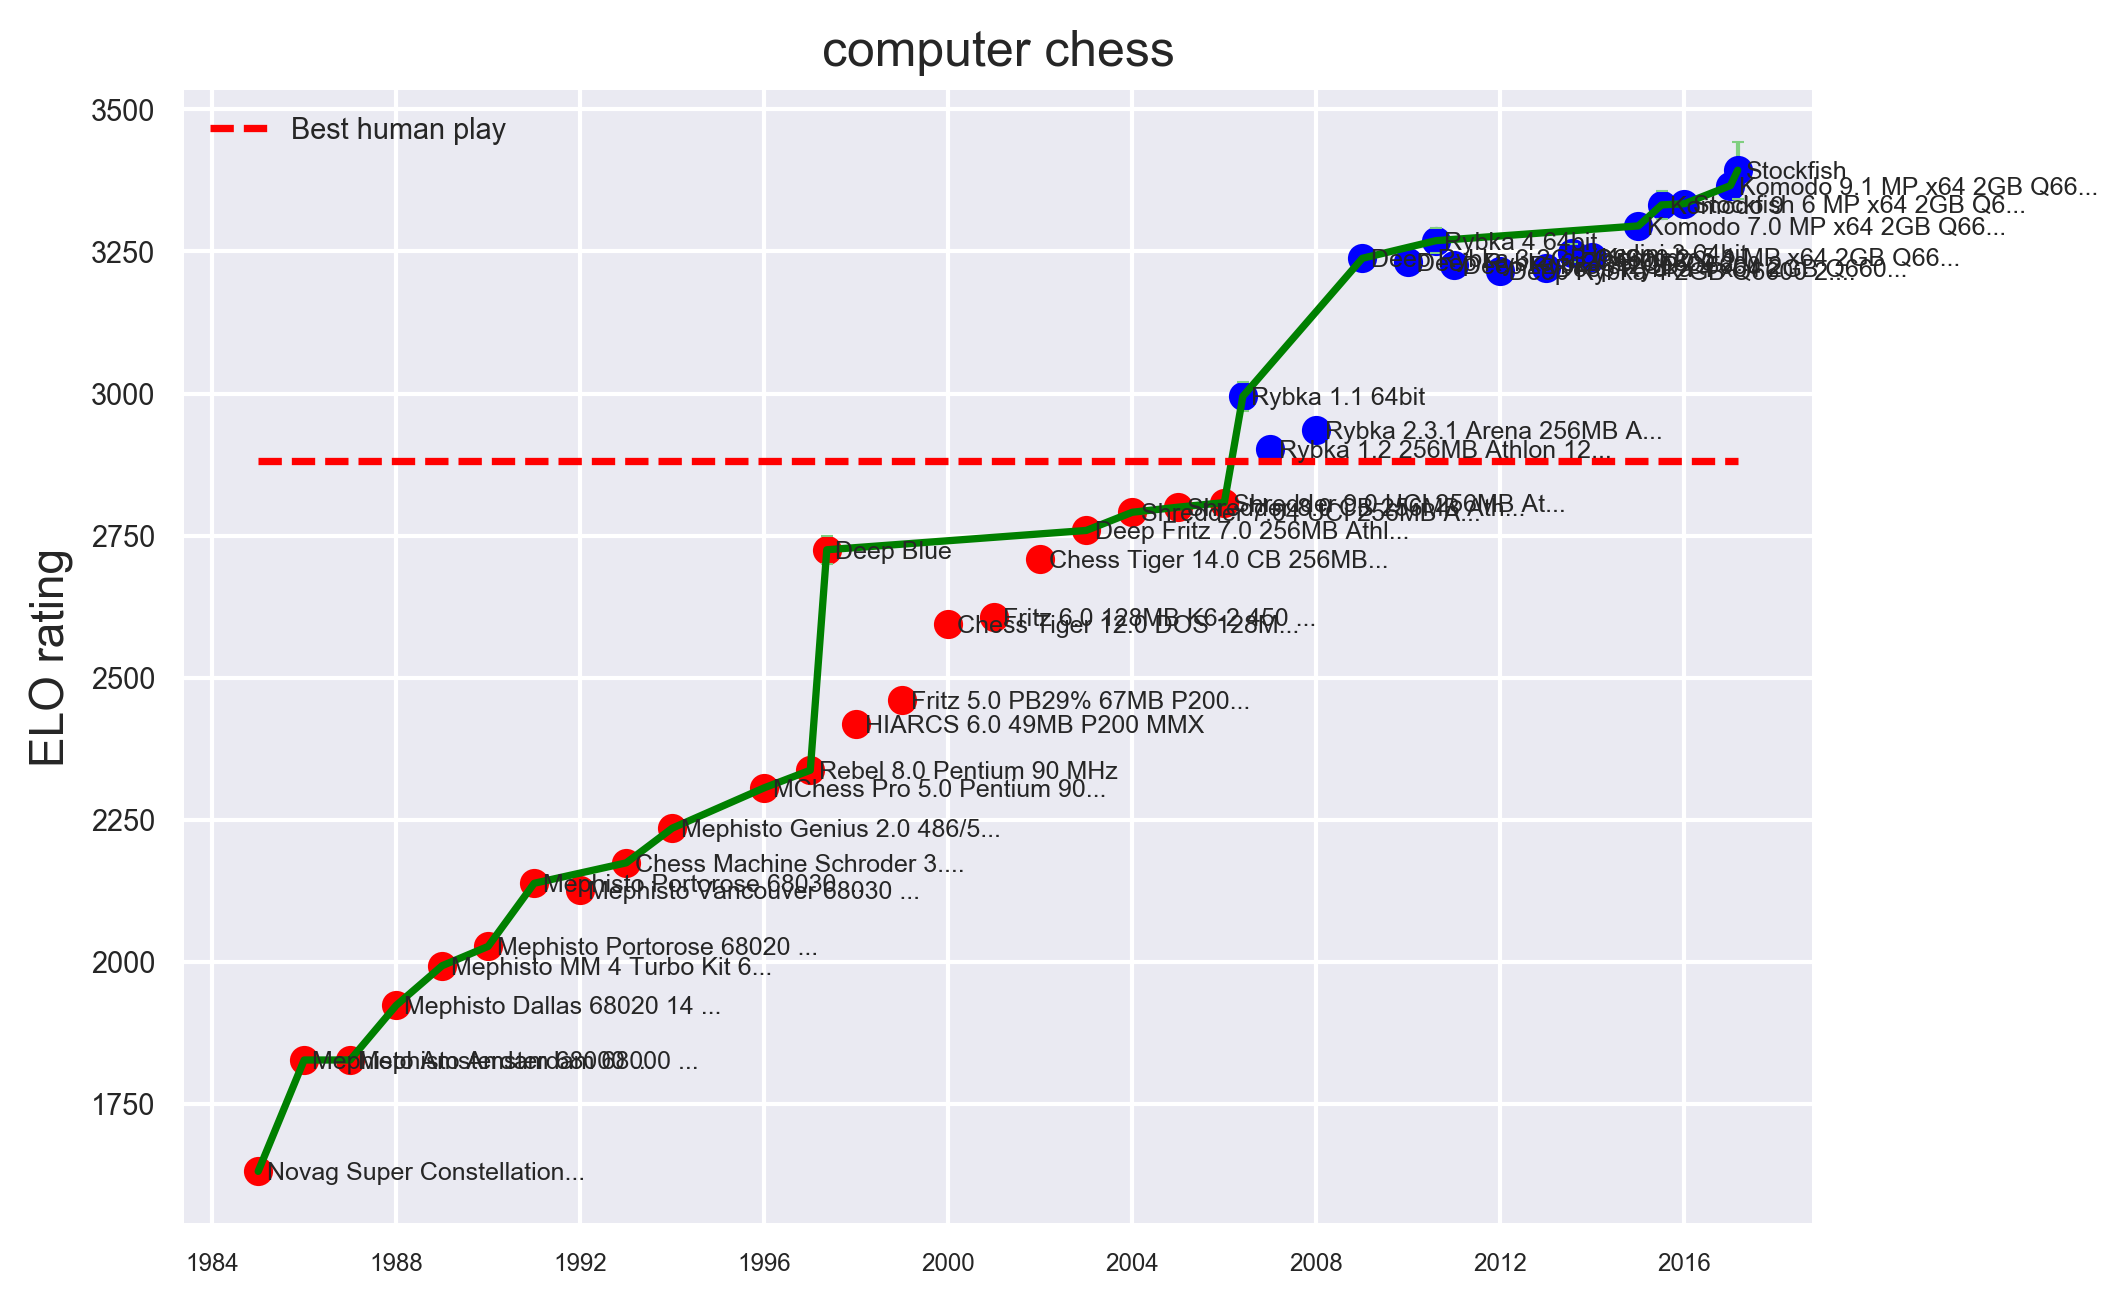

In [101]:
abstract_strategy_games = Problem("Abstract strategy games", ["agi", "abstract-games"])

playing_with_hints = Problem("Playing abstract games with extensive hints", ["abstract-games"], solved=True)
abstract_strategy_games.add_subproblem(playing_with_hints)
playing_with_hints.notes = """
  Complex abstract strategy games have been solved to super-human levels
  by computer systems with extensive rule-hinting and heuristics,
  in some cases combined with machine learning techniques.
"""
computer_chess = playing_with_hints.metric("computer chess", scale=elo, target=2882, target_label="Best human play", target_source="https://en.wikipedia.org/w/index.php?title=Comparison_of_top_chess_players_throughout_history&oldid=777500496#Elo_system")
computer_go = playing_with_hints.metric("computer go", scale=elo, target=3632, target_label="Best human play", target_source="https://www.goratings.org/en/history/")
computer_go.solved = True # until we get proper data

# For some caveats, see https://en.wikipedia.org/w/index.php?title=Chess_engine&oldid=764341963#Ratings
# We could script ingestion of data from CCRL, or get data from Katja
computer_chess.measure(date(1997,05,11), 2725, "Deep Blue", uncertainty=25, url="https://www.quora.com/What-was-Deep-Blues-Elo-rating")
computer_chess.measure(date(2006,05,27), 2995, "Rybka 1.1 64bit", uncertainty=25, url="https://web.archive.org/web/20060531091049/http://www.computerchess.org.uk/ccrl/4040/rating_list_all.html")
computer_chess.measure(date(2010,8,7), 3269, "Rybka 4 64bit", uncertainty=22, url="https://web.archive.org/web/20100923131123/http://www.computerchess.org.uk/ccrl/4040/rating_list_all.html")
computer_chess.measure(date(2013,7,20), 3248, "Houdini 3 64bit", uncertainty=16, url="https://web.archive.org/web/20130415000000*/http://www.computerchess.org.uk/ccrl/4040/rating_list_all.html")
computer_chess.measure(date(2015,7,4), 3332, "Komodo 9", uncertainty=24, url="https://web.archive.org/web/20150708104805/http://www.computerchess.org.uk/ccrl/4040/rating_list_all.html")
computer_chess.measure(date(2017,02,27), 3393, "Stockfish", uncertainty=50, url="https://web.archive.org/web/20170227044521/http://www.computerchess.org.uk/ccrl/4040/")
# Wikipedia has some nice data here:
computer_chess.measure(date(1984,12,31), 1631, "Novag Super Constellation 6502 4 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1985,12,31), 1827, "Mephisto Amsterdam 68000 12 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1986,12,31), 1827, "Mephisto Amsterdam 68000 12 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1987,12,31), 1923, "Mephisto Dallas 68020 14 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1988,12,31), 1993, "Mephisto MM 4 Turbo Kit 6502 16 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1989,12,31), 2027, "Mephisto Portorose 68020 12 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1990,12,31), 2138, "Mephisto Portorose 68030 36 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1991,12,31), 2127, "Mephisto Vancouver 68030 36 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1992,12,31), 2174, "Chess Machine Schroder 3.0 ARM2 30 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1993,12,31), 2235, "Mephisto Genius 2.0 486/50-66 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1995,12,31), 2306, "MChess Pro 5.0 Pentium 90 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1996,12,31), 2337, "Rebel 8.0 Pentium 90 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1997,12,31), 2418, "HIARCS 6.0 49MB P200 MMX", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1998,12,31), 2460, "Fritz 5.0 PB29% 67MB P200 MMX", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(1999,12,31), 2594, "Chess Tiger 12.0 DOS 128MB K6-2 450 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2000,12,31), 2607, "Fritz 6.0 128MB K6-2 450 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2001,12,31), 2709, "Chess Tiger 14.0 CB 256MB Athlon 1200", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2002,12,31), 2759, "Deep Fritz 7.0 256MB Athlon 1200 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2003,12,31), 2791, "Shredder 7.04 UCI 256MB Athlon 1200 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2004,12,31), 2800, "Shredder 8.0 CB 256MB Athlon 1200 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2005,12,31), 2808, "Shredder 9.0 UCI 256MB Athlon 1200 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2006,12,31), 2902, "Rybka 1.2 256MB Athlon 1200 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2007,12,31), 2935, "Rybka 2.3.1 Arena 256MB Athlon 1200 MHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2008,12,31), 3238, "Deep Rybka 3 2GB Q6600 2.4 GHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2009,12,31), 3232, "Deep Rybka 3 2GB Q6600 2.4 GHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2010,12,31), 3227, "Deep Rybka 3 2GB Q6600 2.4 GHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2011,12,31), 3216, "Deep Rybka 4 2GB Q6600 2.4 GHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2012,12,31), 3221, "Deep Rybka 4 x64 2GB Q6600 2.4 GHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2013,12,31), 3241, "Komodo 5.1 MP x64 2GB Q6600 2.4 GHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2014,12,31), 3295, "Komodo 7.0 MP x64 2GB Q6600 2.4 GHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2015,12,31), 3334, "Stockfish 6 MP x64 2GB Q6600 2.4 GHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")
computer_chess.measure(date(2016,12,31), 3366, "Komodo 9.1 MP x64 2GB Q6600 2.4 GHz", url="https://en.wikipedia.org/wiki/Swedish_Chess_Computer_Association#Rating_list_year-end_leaders")

mastering_historical_games = Problem("Superhuman mastery of arbitrary abstract strategy games", ["super", "abstract-games"])
abstract_strategy_games.add_subproblem(mastering_historical_games)
mastering_chess = mastering_historical_games.metric("mastering chess")
mastering_chess.notes = """
  Beating all humans at chess, given a corpus of past play amongst masters,
  but no human-crafted policy constraints and heuristics. This will probably fall out
  immediately once learning_abstract_game_rules is solved, since playing_with_hints
  has been solved.
"""

# Are there any published metrics for these yet?
learning_abstract_game_rules = Problem("Learning the rules of complex strategy games from examples", ["agi", "abstract-games"])
abstract_strategy_games.add_subproblem(learning_abstract_game_rules)
learning_chess = learning_abstract_game_rules.metric("learning chess")
learning_chess.notes = """
  Chess software contains hard-coded policy constraints for valid play; this metric is whether RL
  or other agents can correctly build those policy constraints from examples or oracles"""
learning_go = learning_abstract_game_rules.metric("learning go")
learning_go.notes = """
  Go software contains policy constraints for valid play and evaluating the number of
  liberties for groups. This metric is whether RL or other agents can correctly build those 
  policy constraints from examples or oracles"""

learning_arbitrary_abstract_games = Problem("Play an arbitrary abstract game, first learning the rules", ["agi", "abstract-games"])
abstract_strategy_games.add_subproblem(learning_arbitrary_abstract_games)
computer_chess.graph()

## Real-time video games

Computer and video games are a very open-ended domain. It is possible that some existing or future games could be so elaborate that they are "AI complete". In the mean time, a lot of interesting progress is likely in exploring the "ladder of games" of increasing complexity on various fronts.

In [ ]:
computer_games = Problem("Play real-time computer & video games", ["world-modelling", "realtime-games", "agi", "language"])

games_requiring_novel_language = Problem("Games that require inventing novel language, forms of speech, or communication")
games_requiring_speech = Problem("Games that require both understanding and speaking a language")
games_requiring_speech.metric("Starcraft")

games_requiring_language_comprehension = Problem("Games that require language comprehension", ["agi", "languge"])

computer_games.add_subproblem(games_requiring_novel_language)
games_requiring_novel_language.add_subproblem(games_requiring_speech)
games_requiring_speech.add_subproblem(games_requiring_language_comprehension)

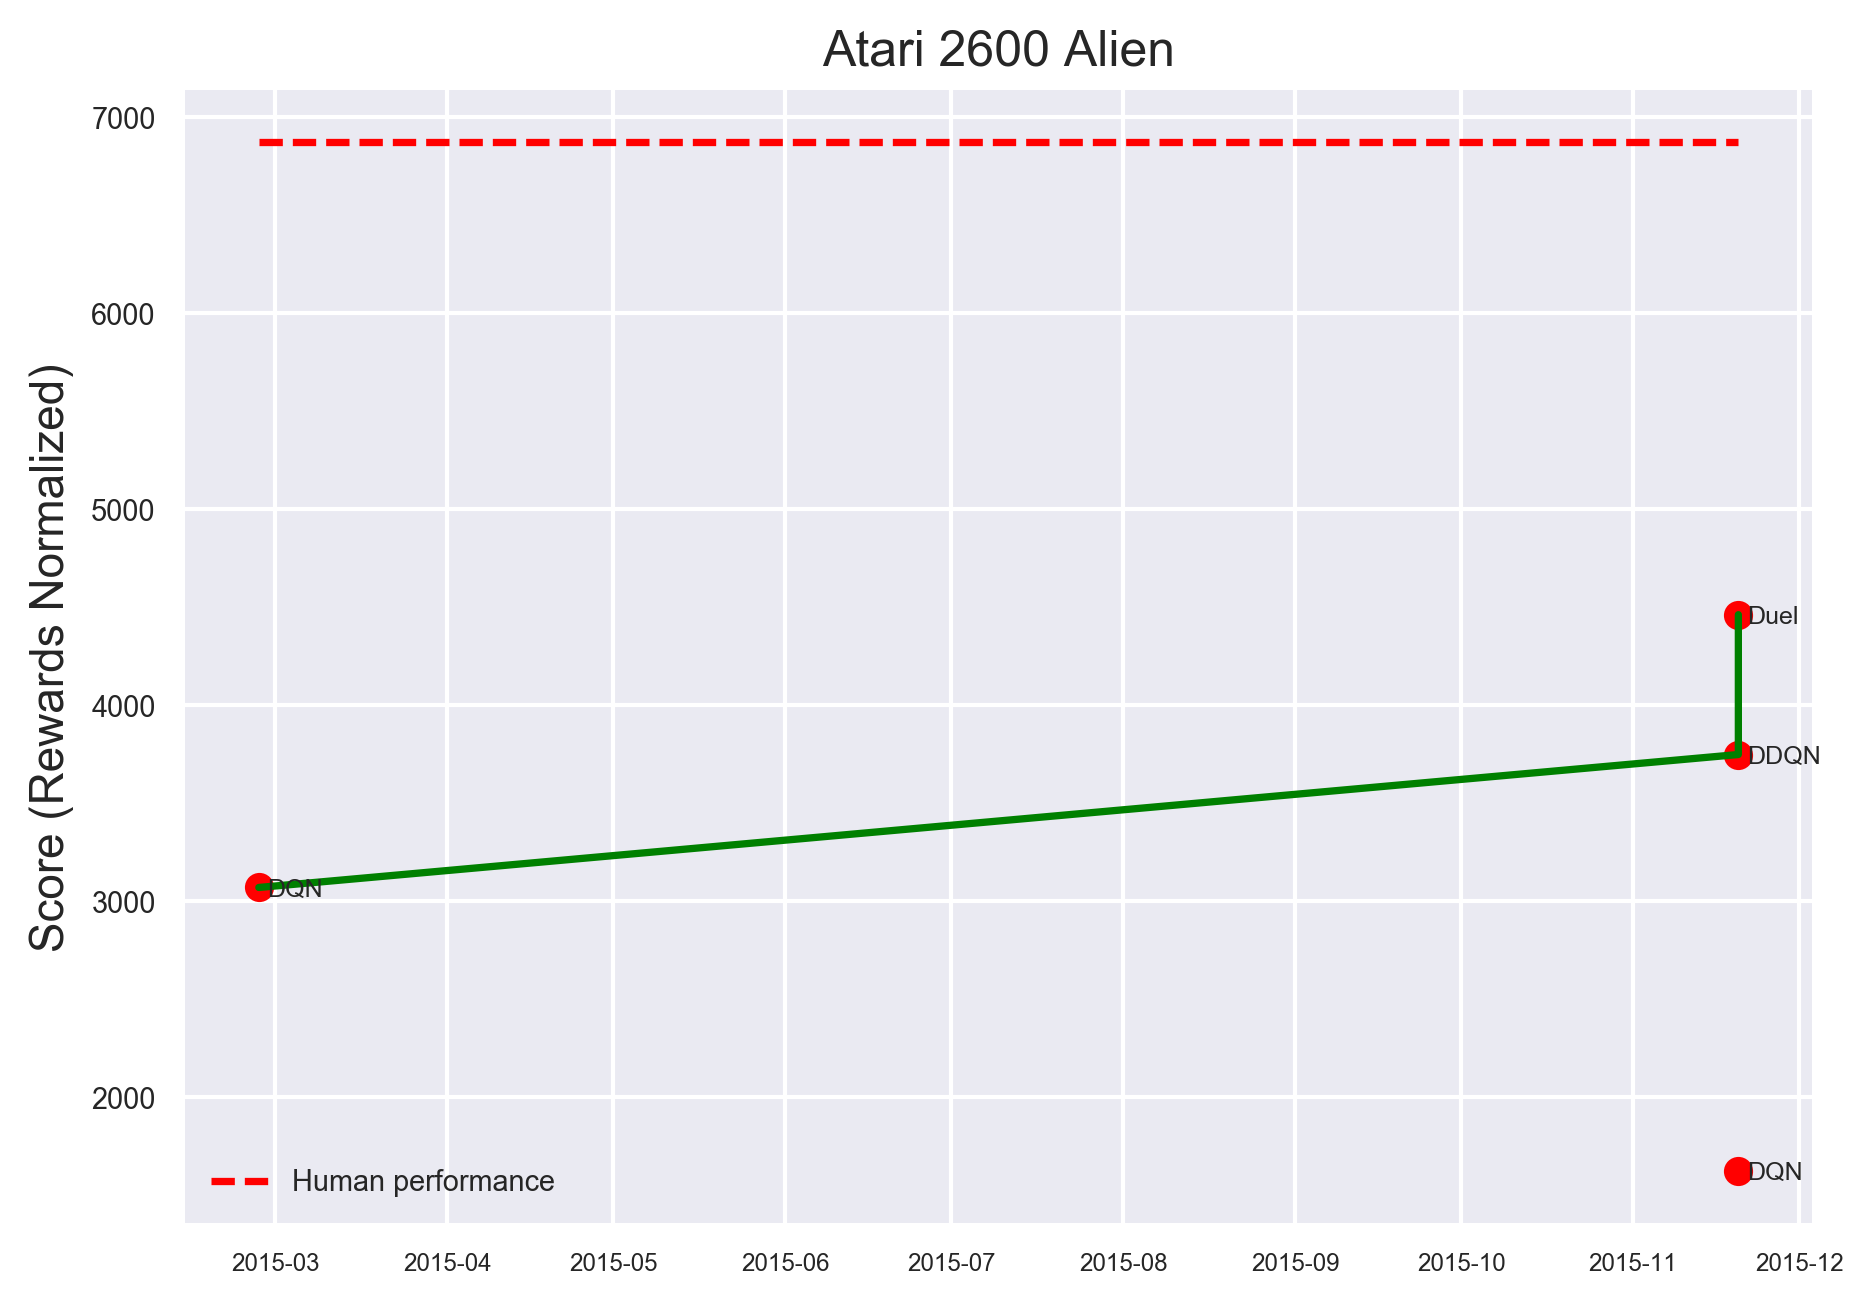

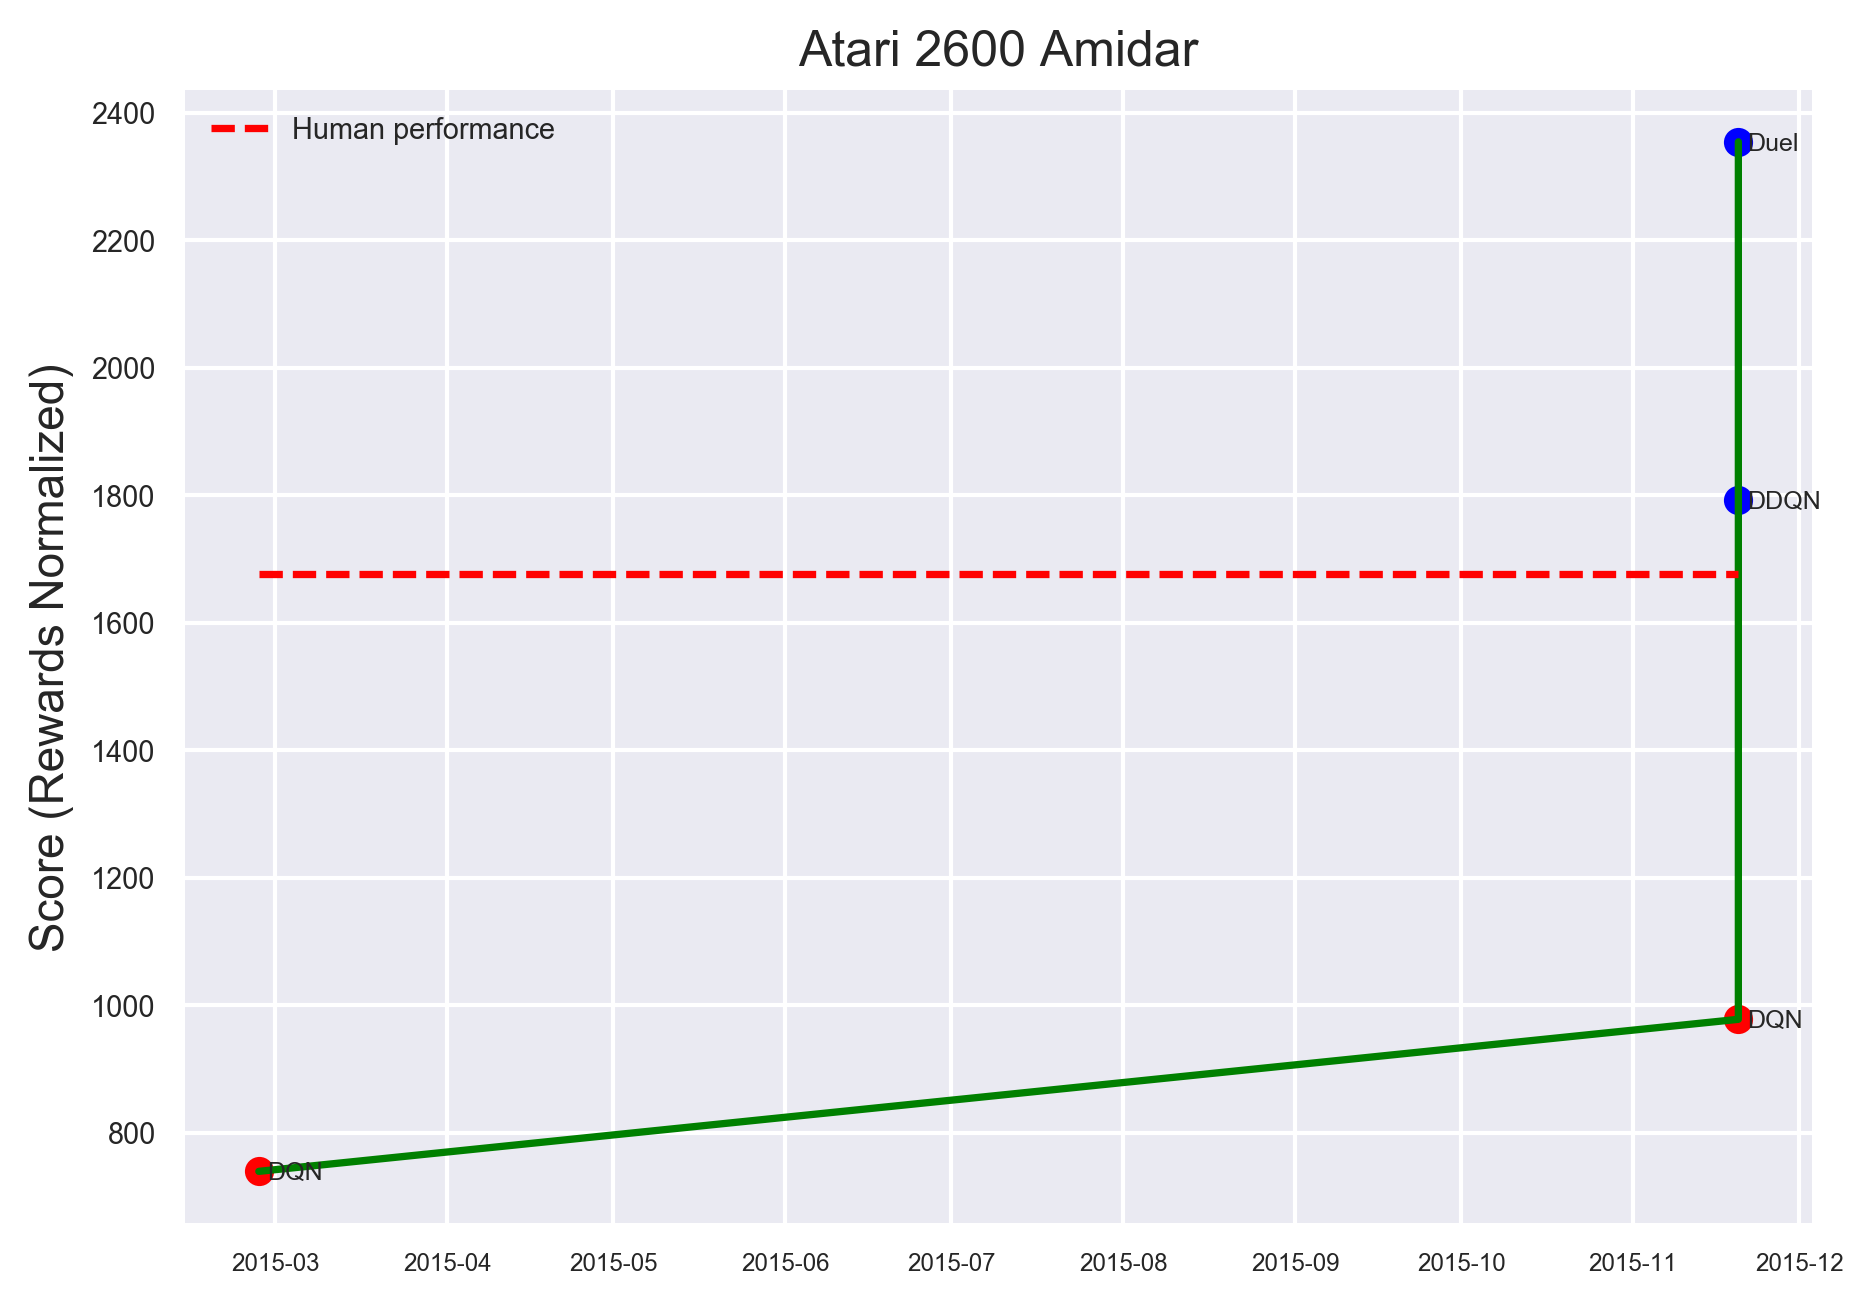

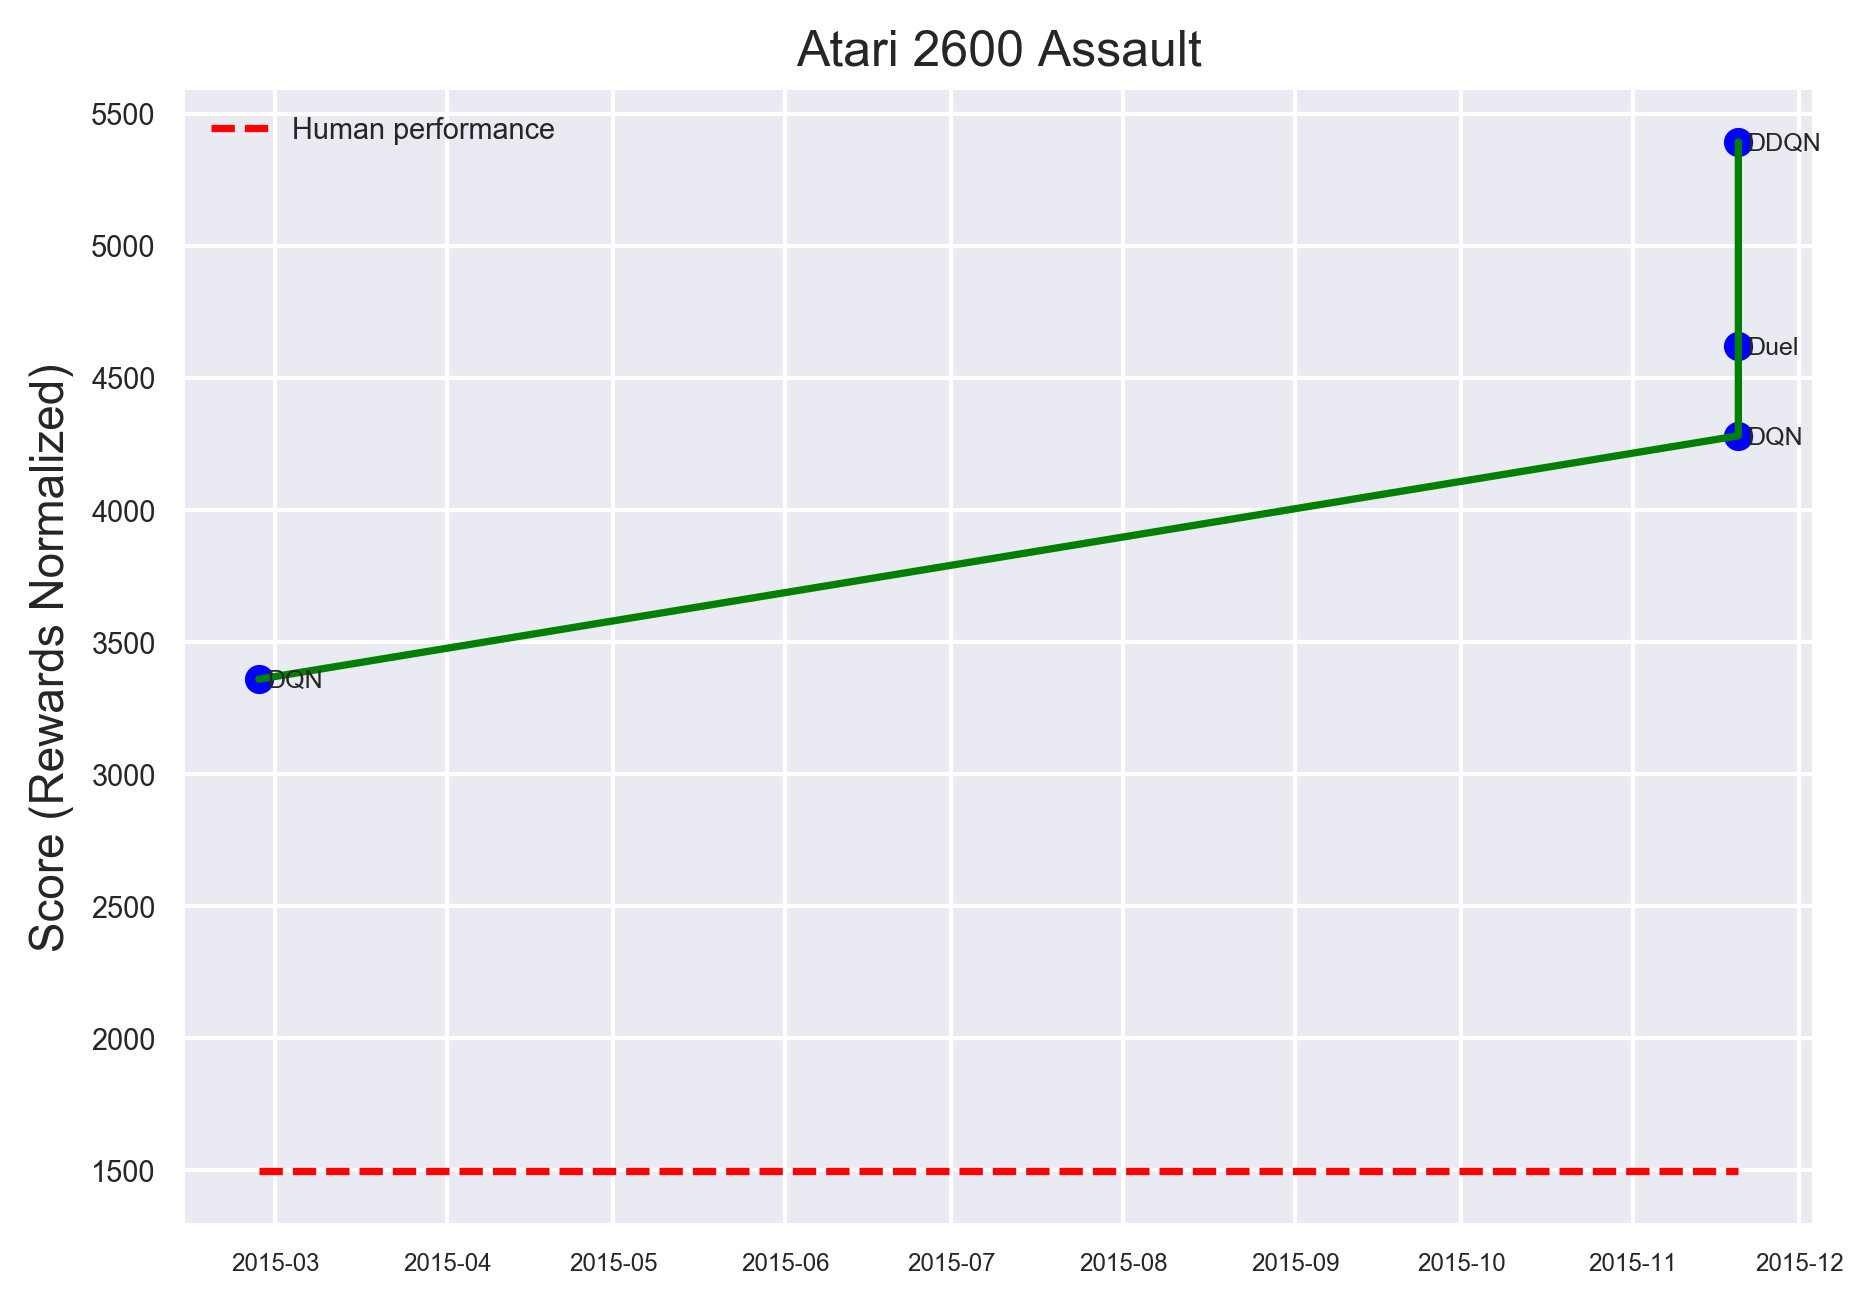

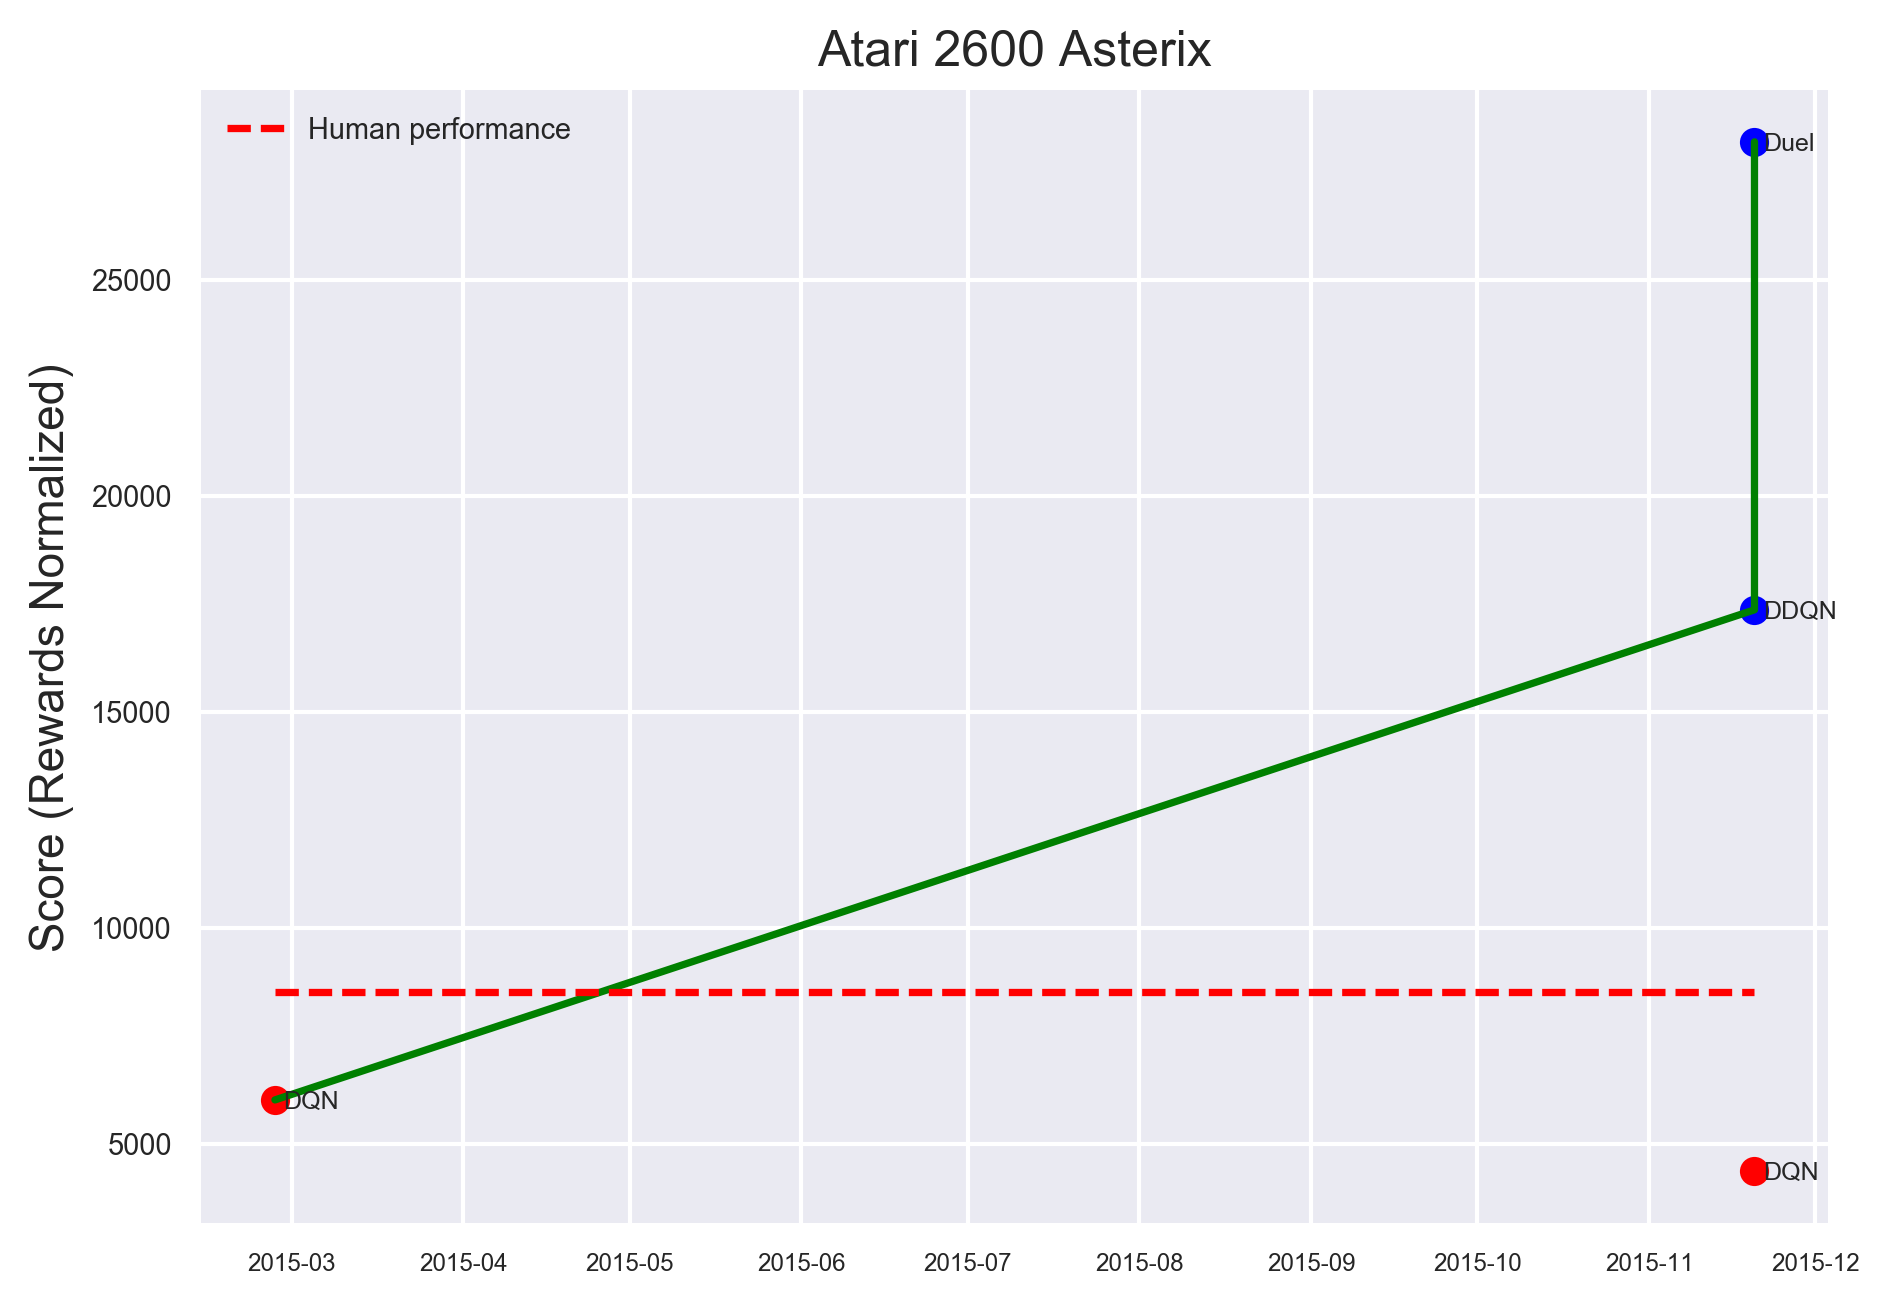

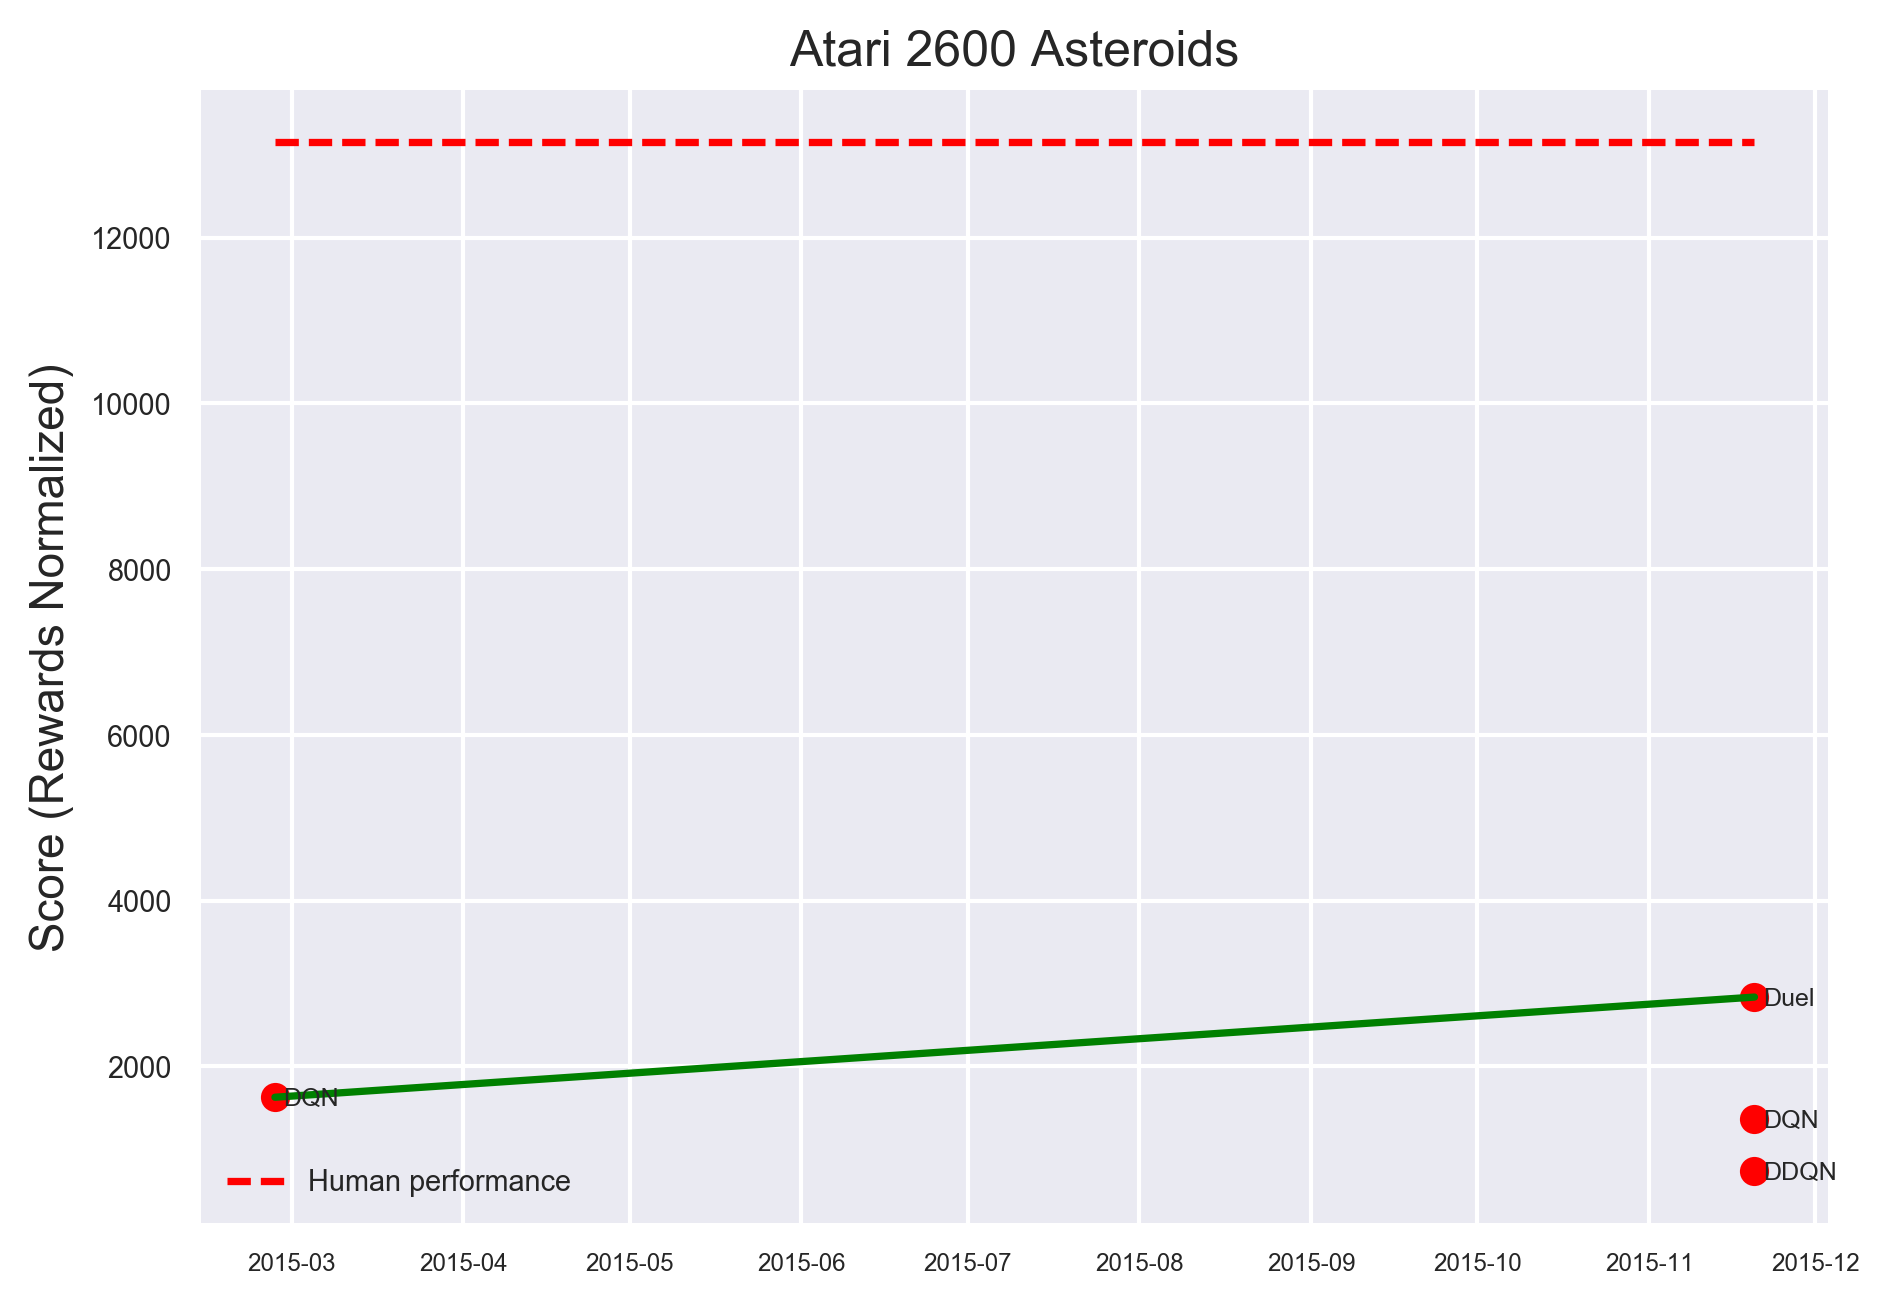

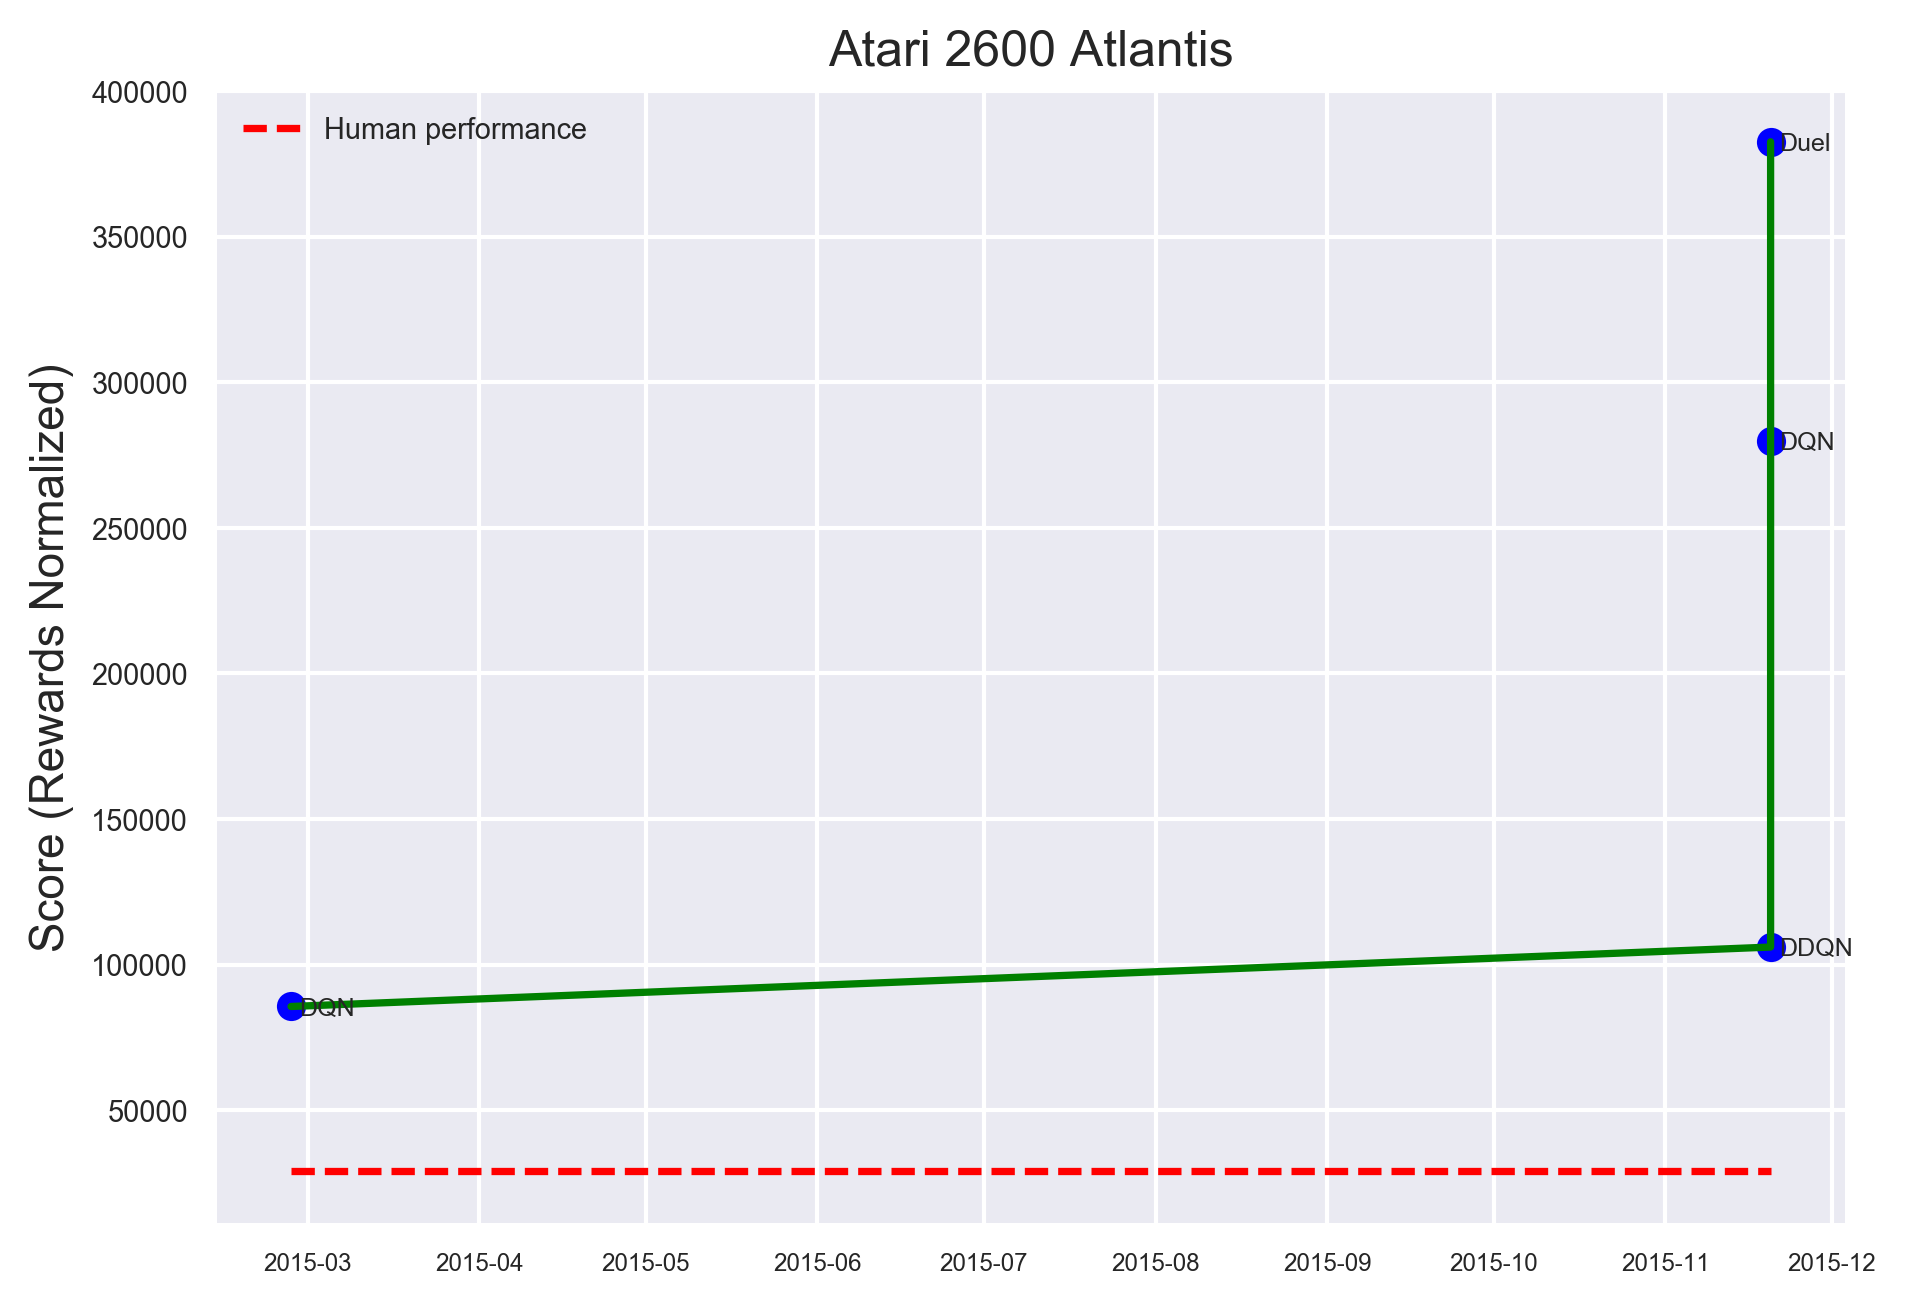

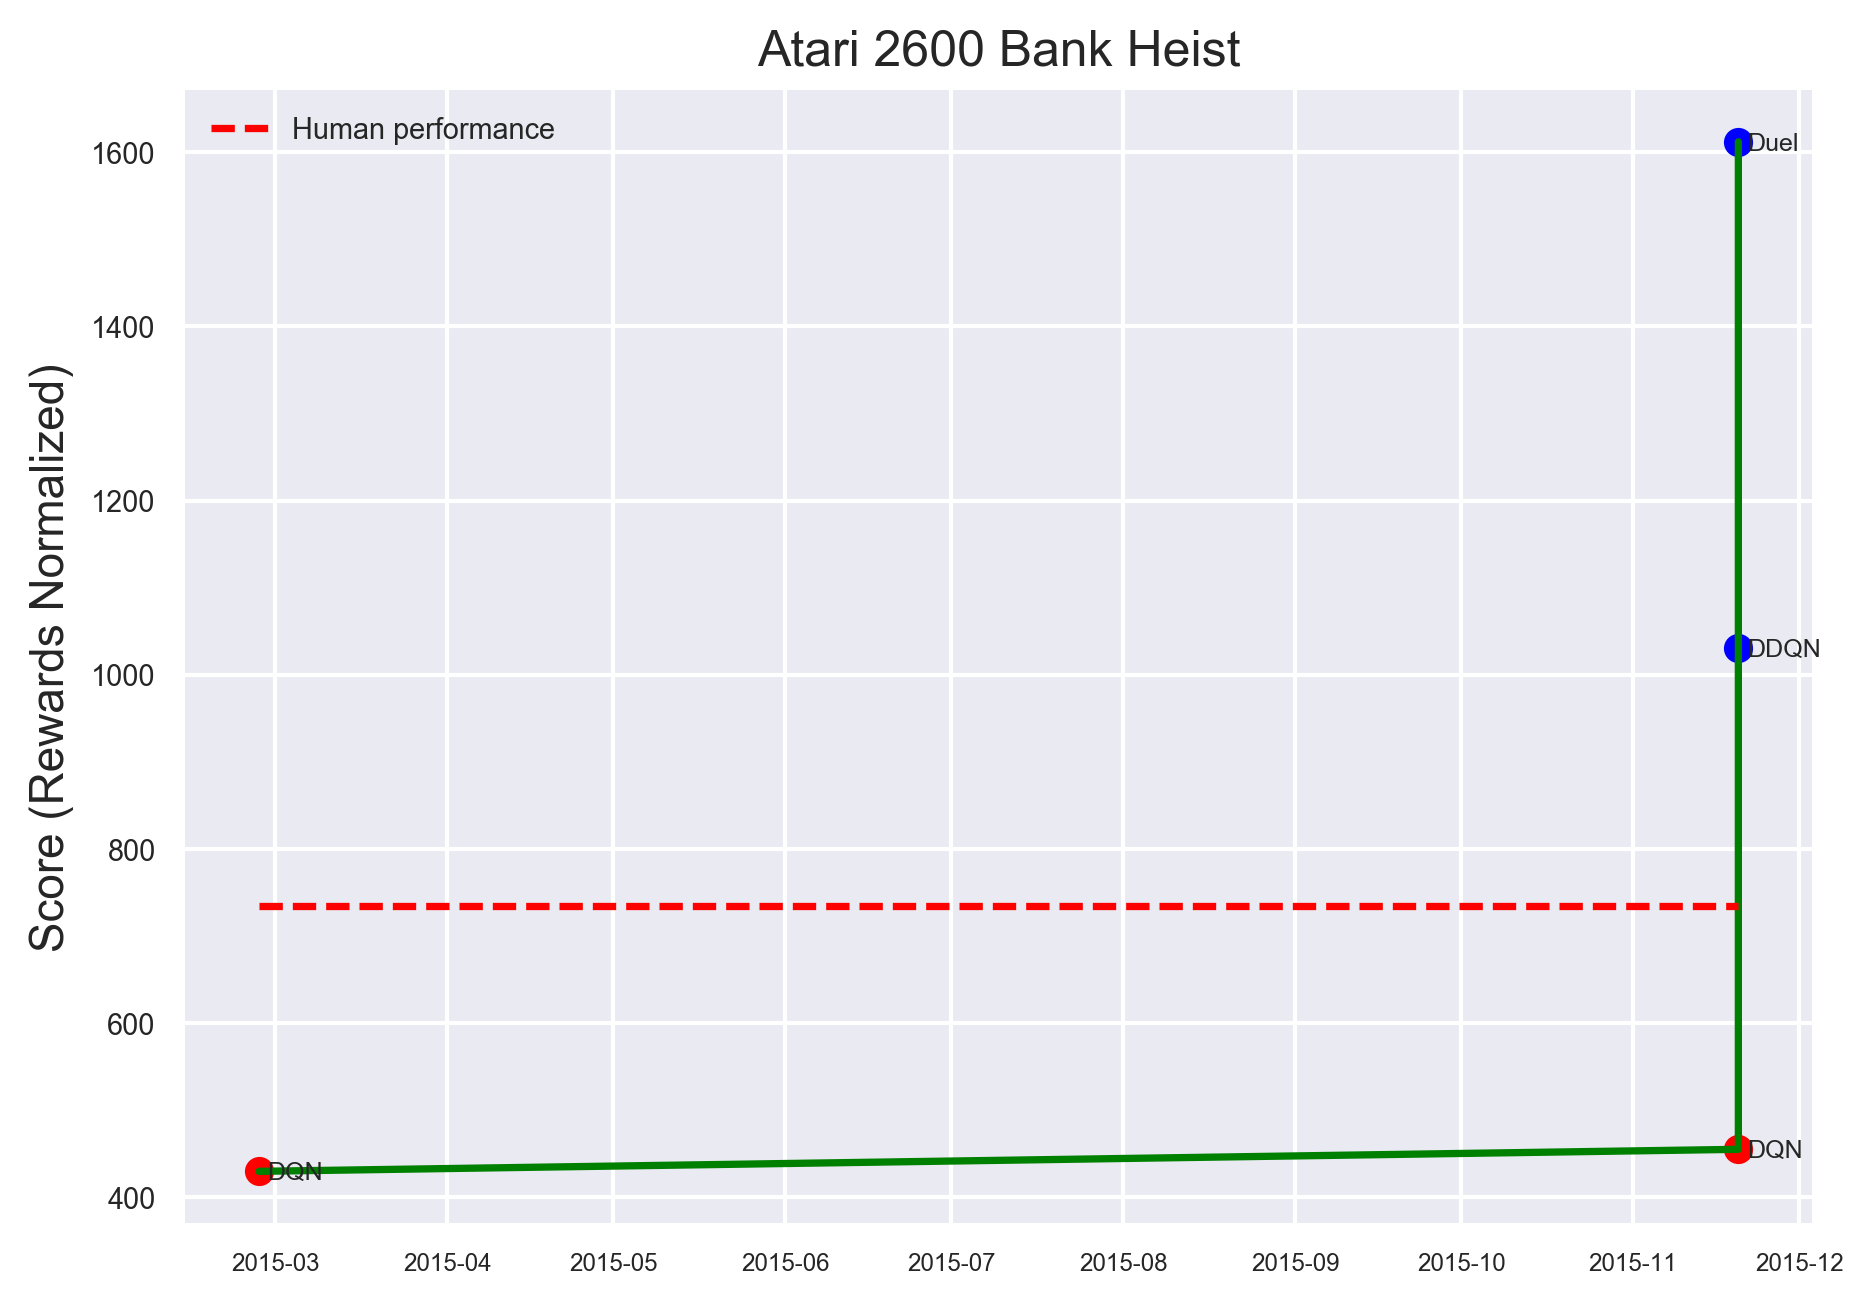

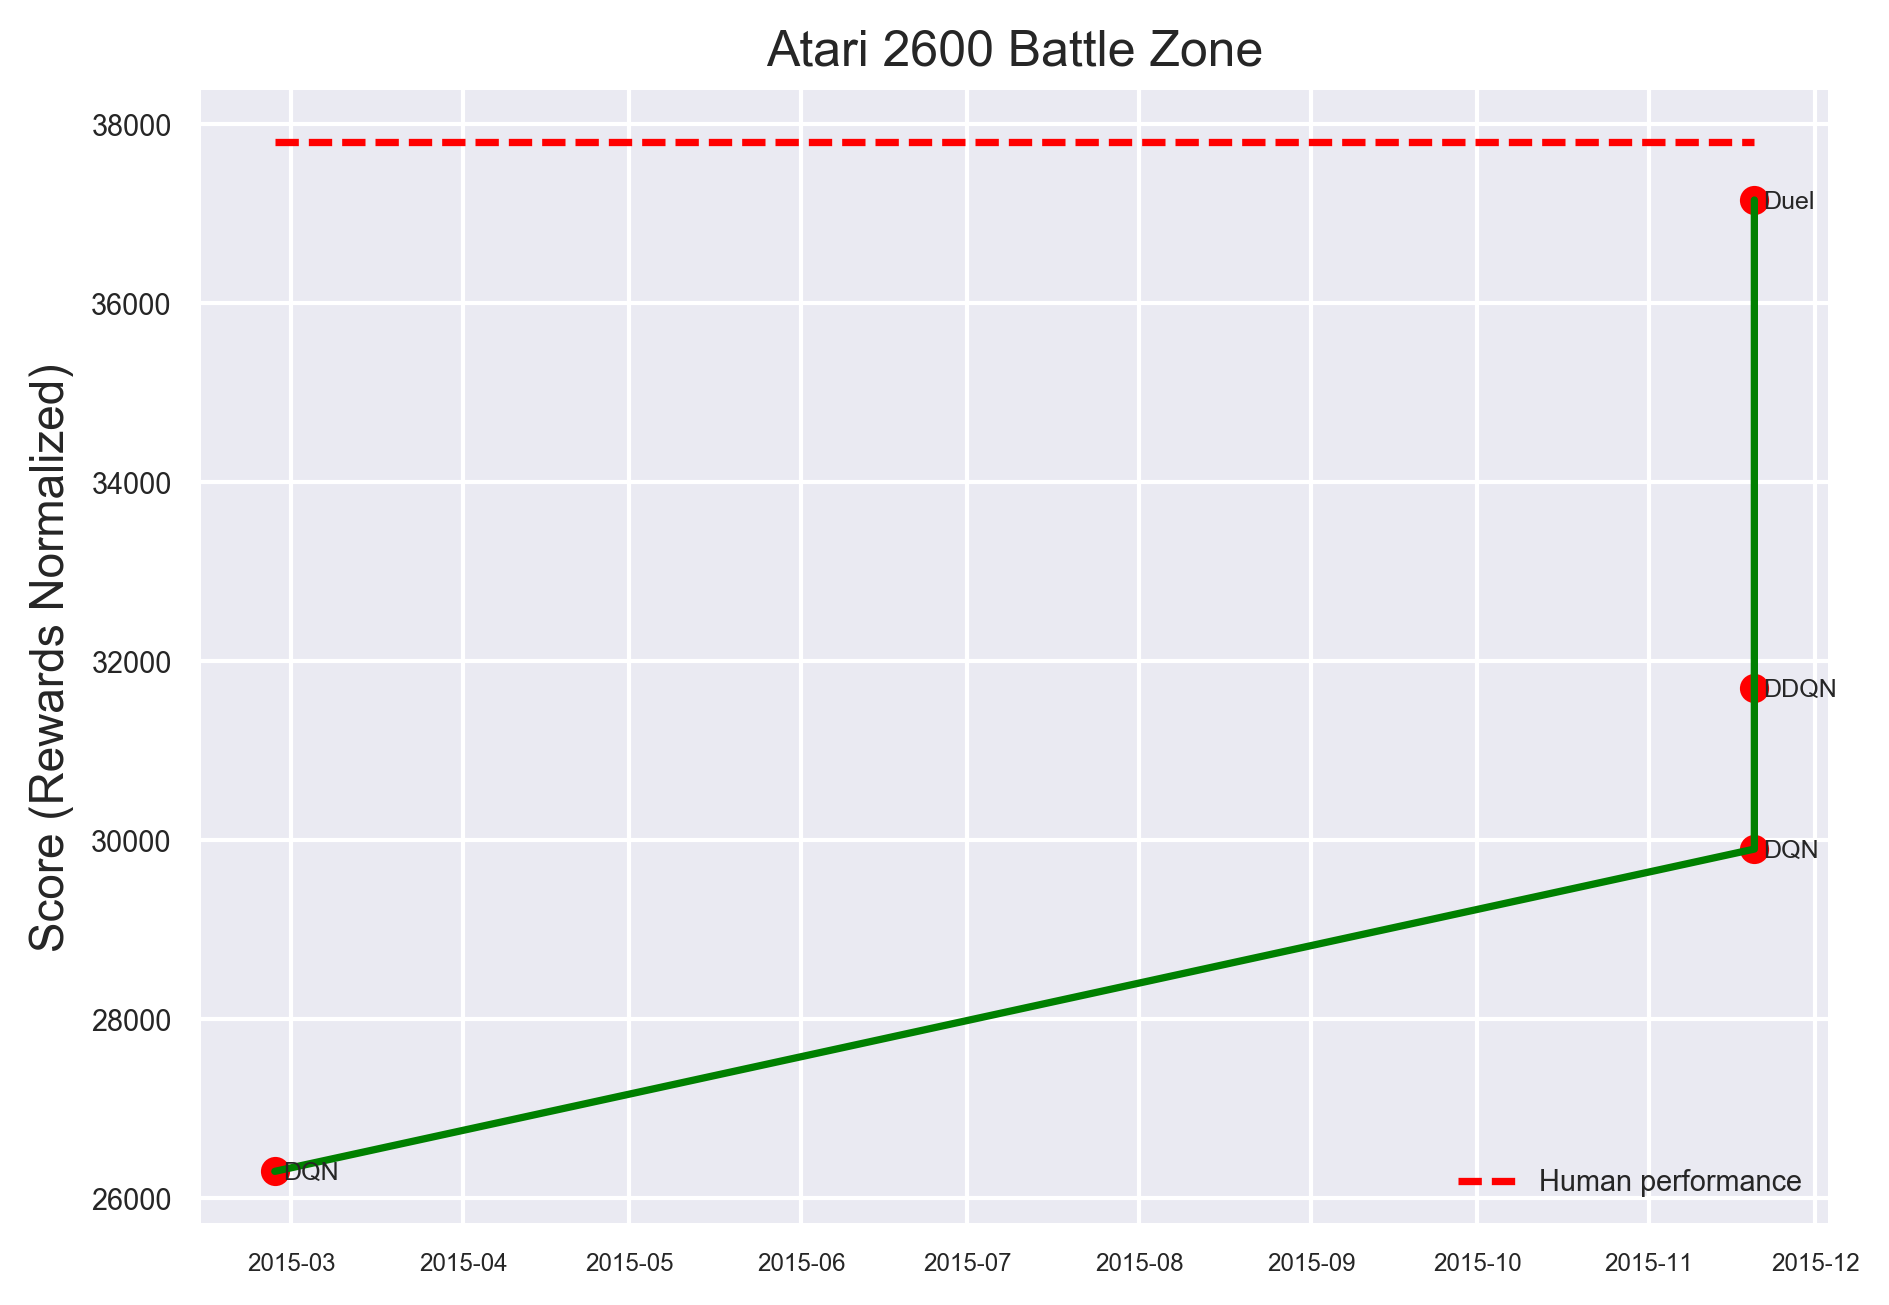

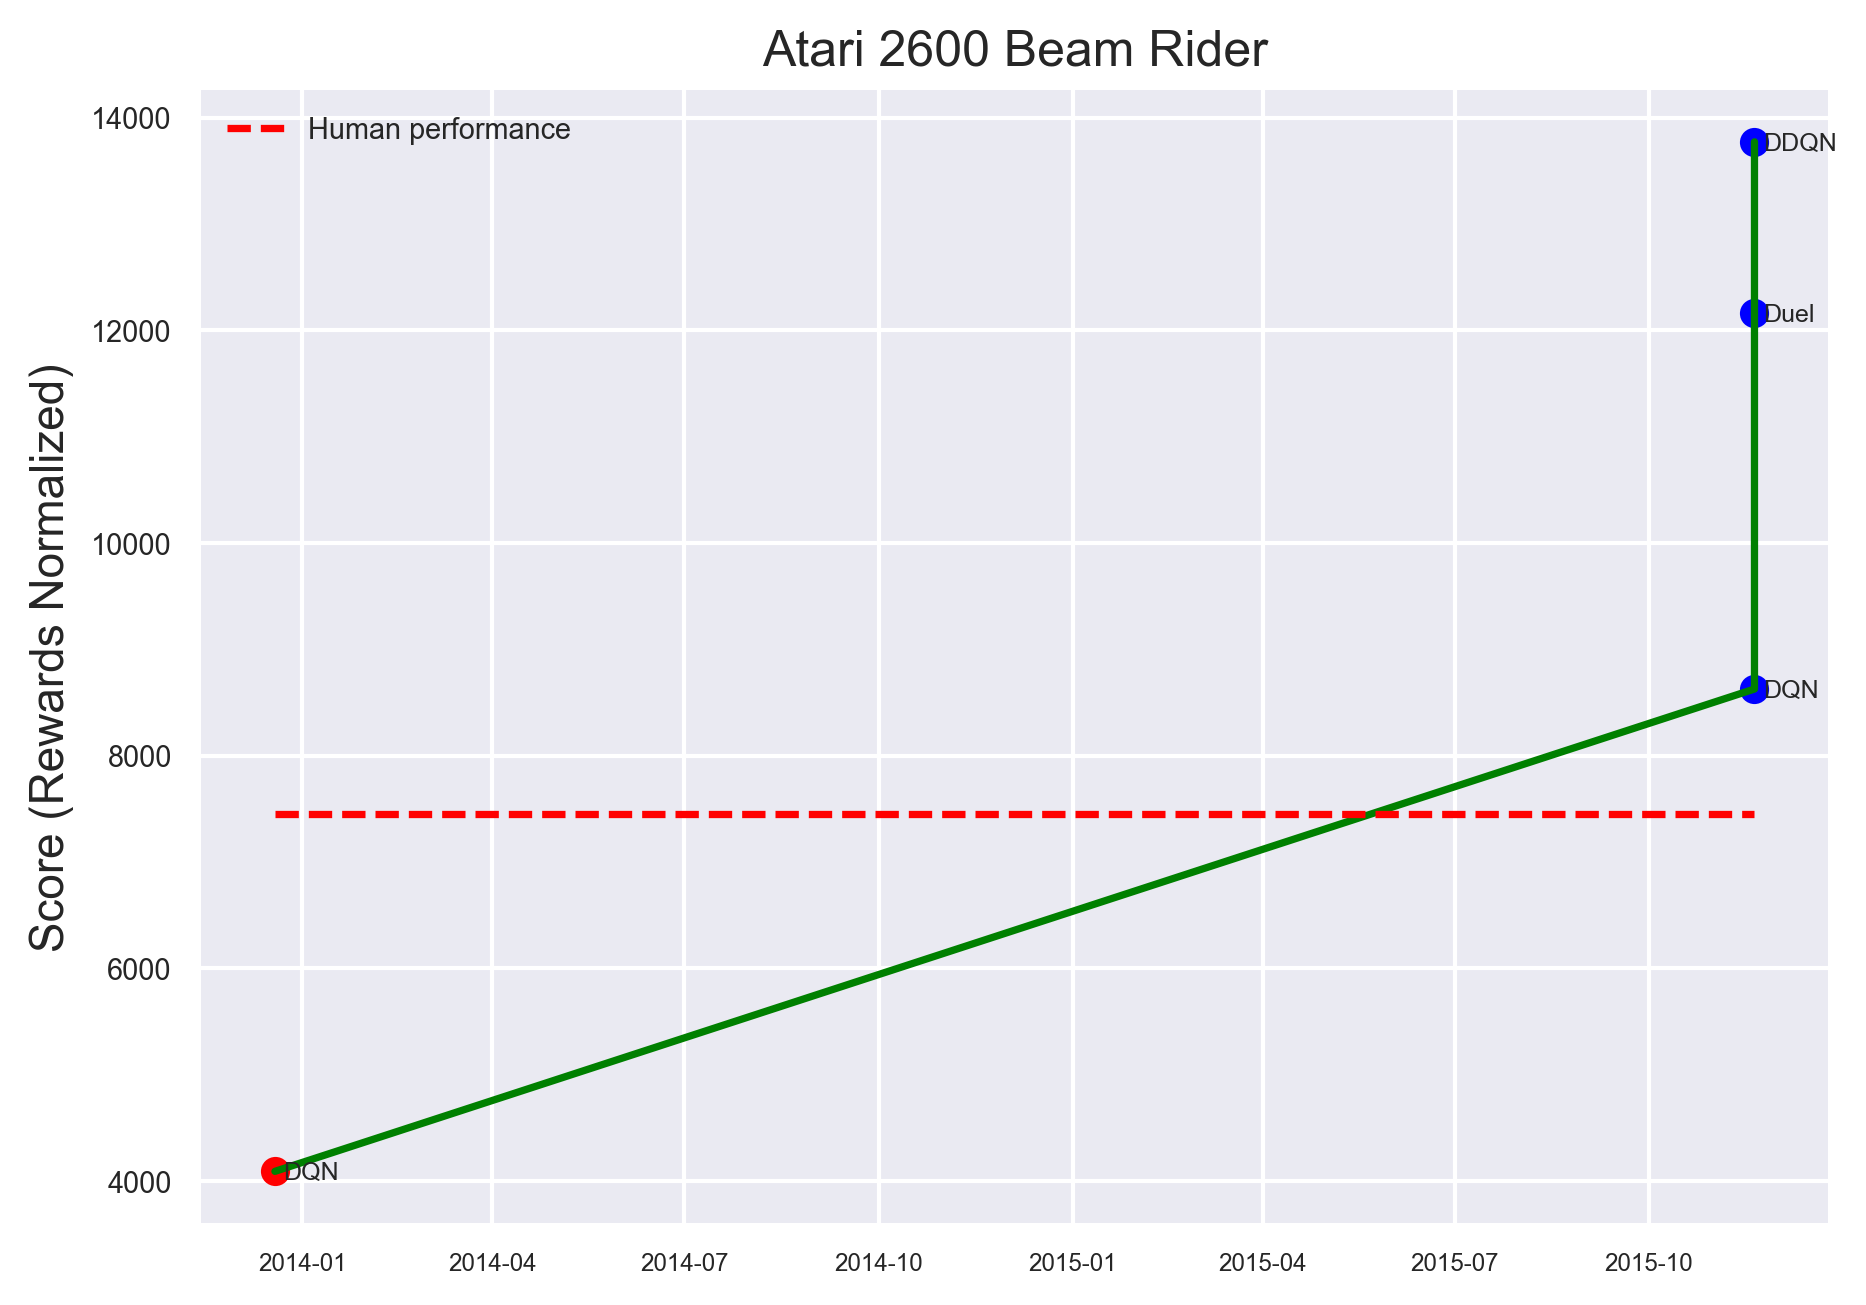

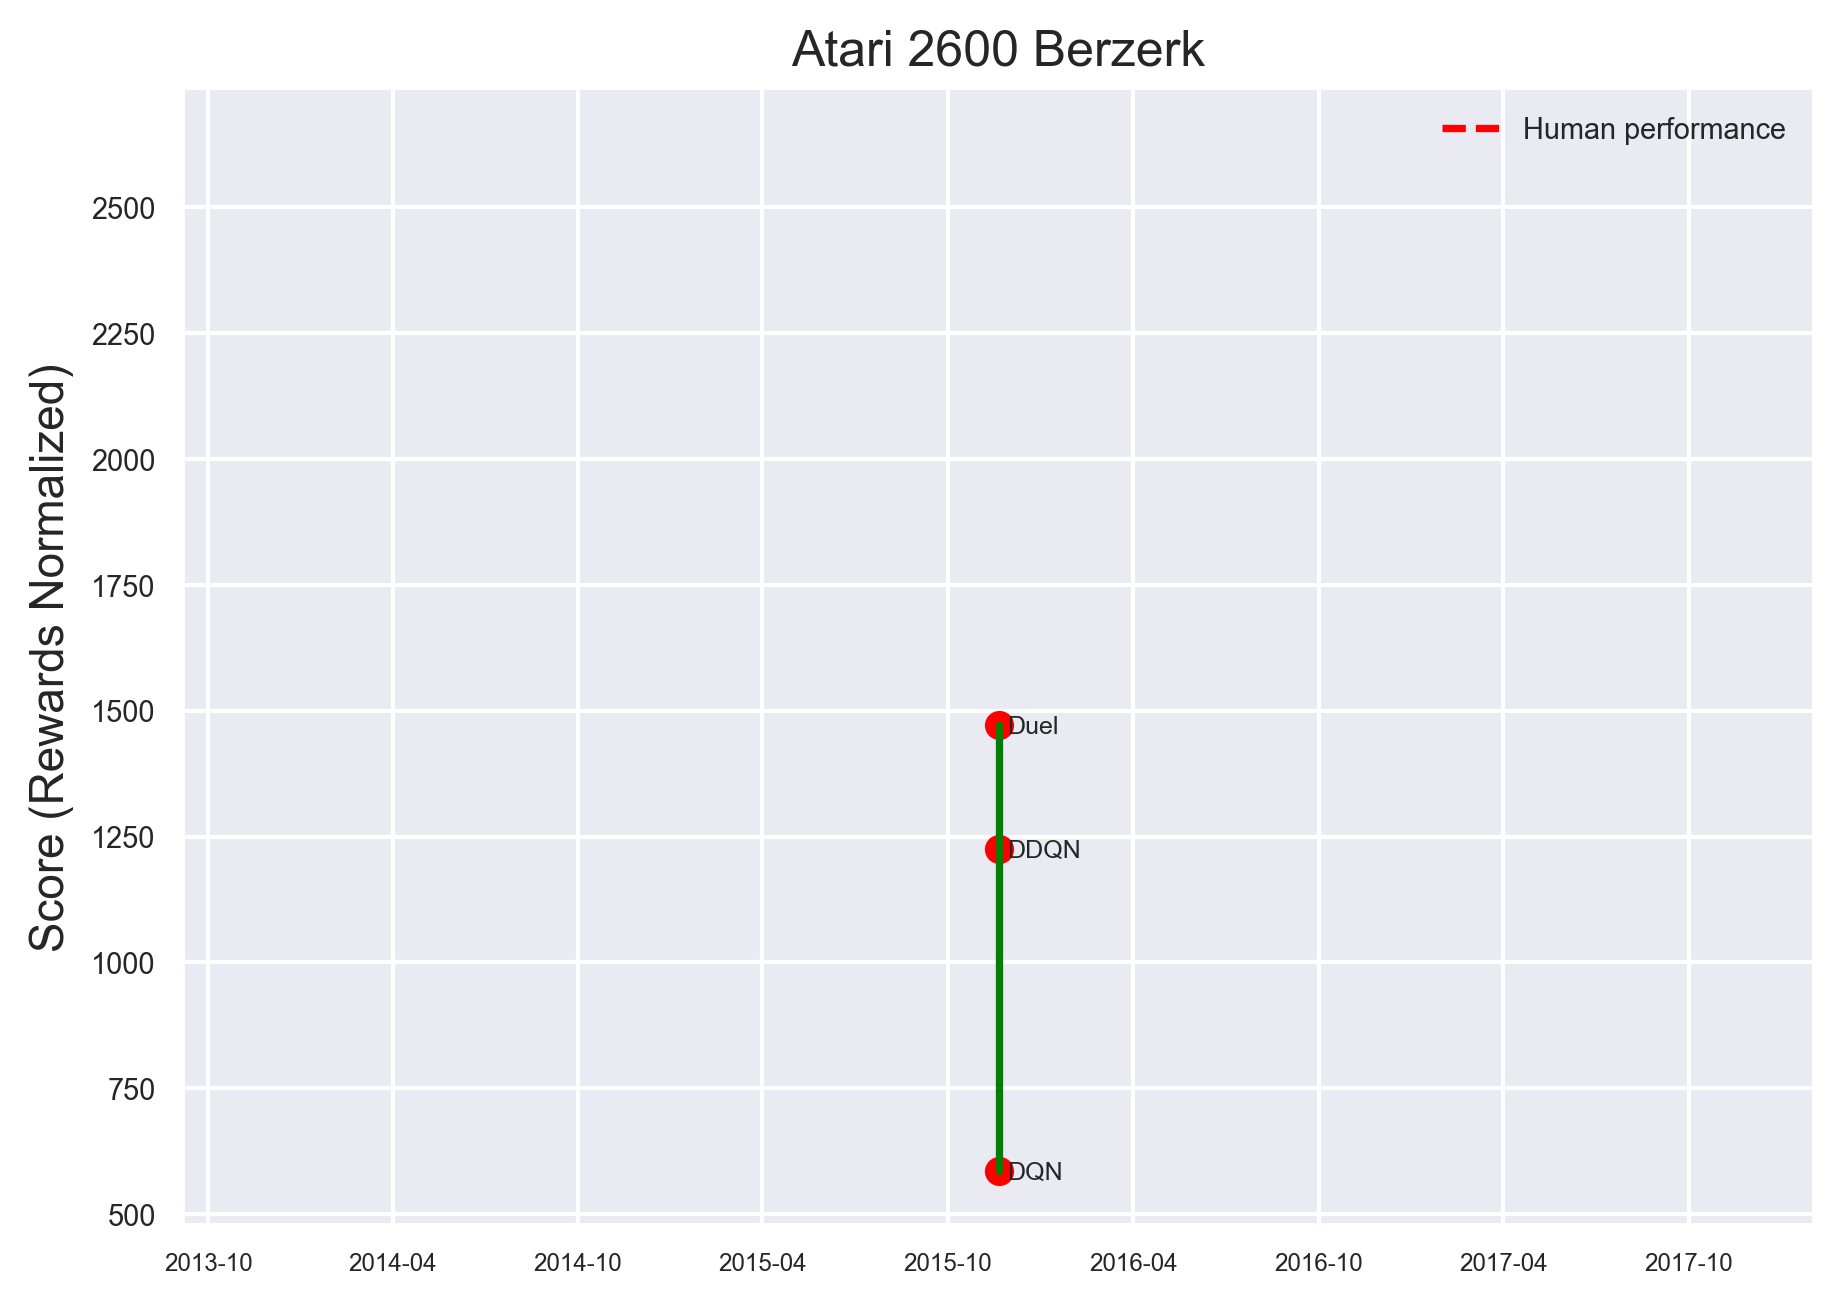

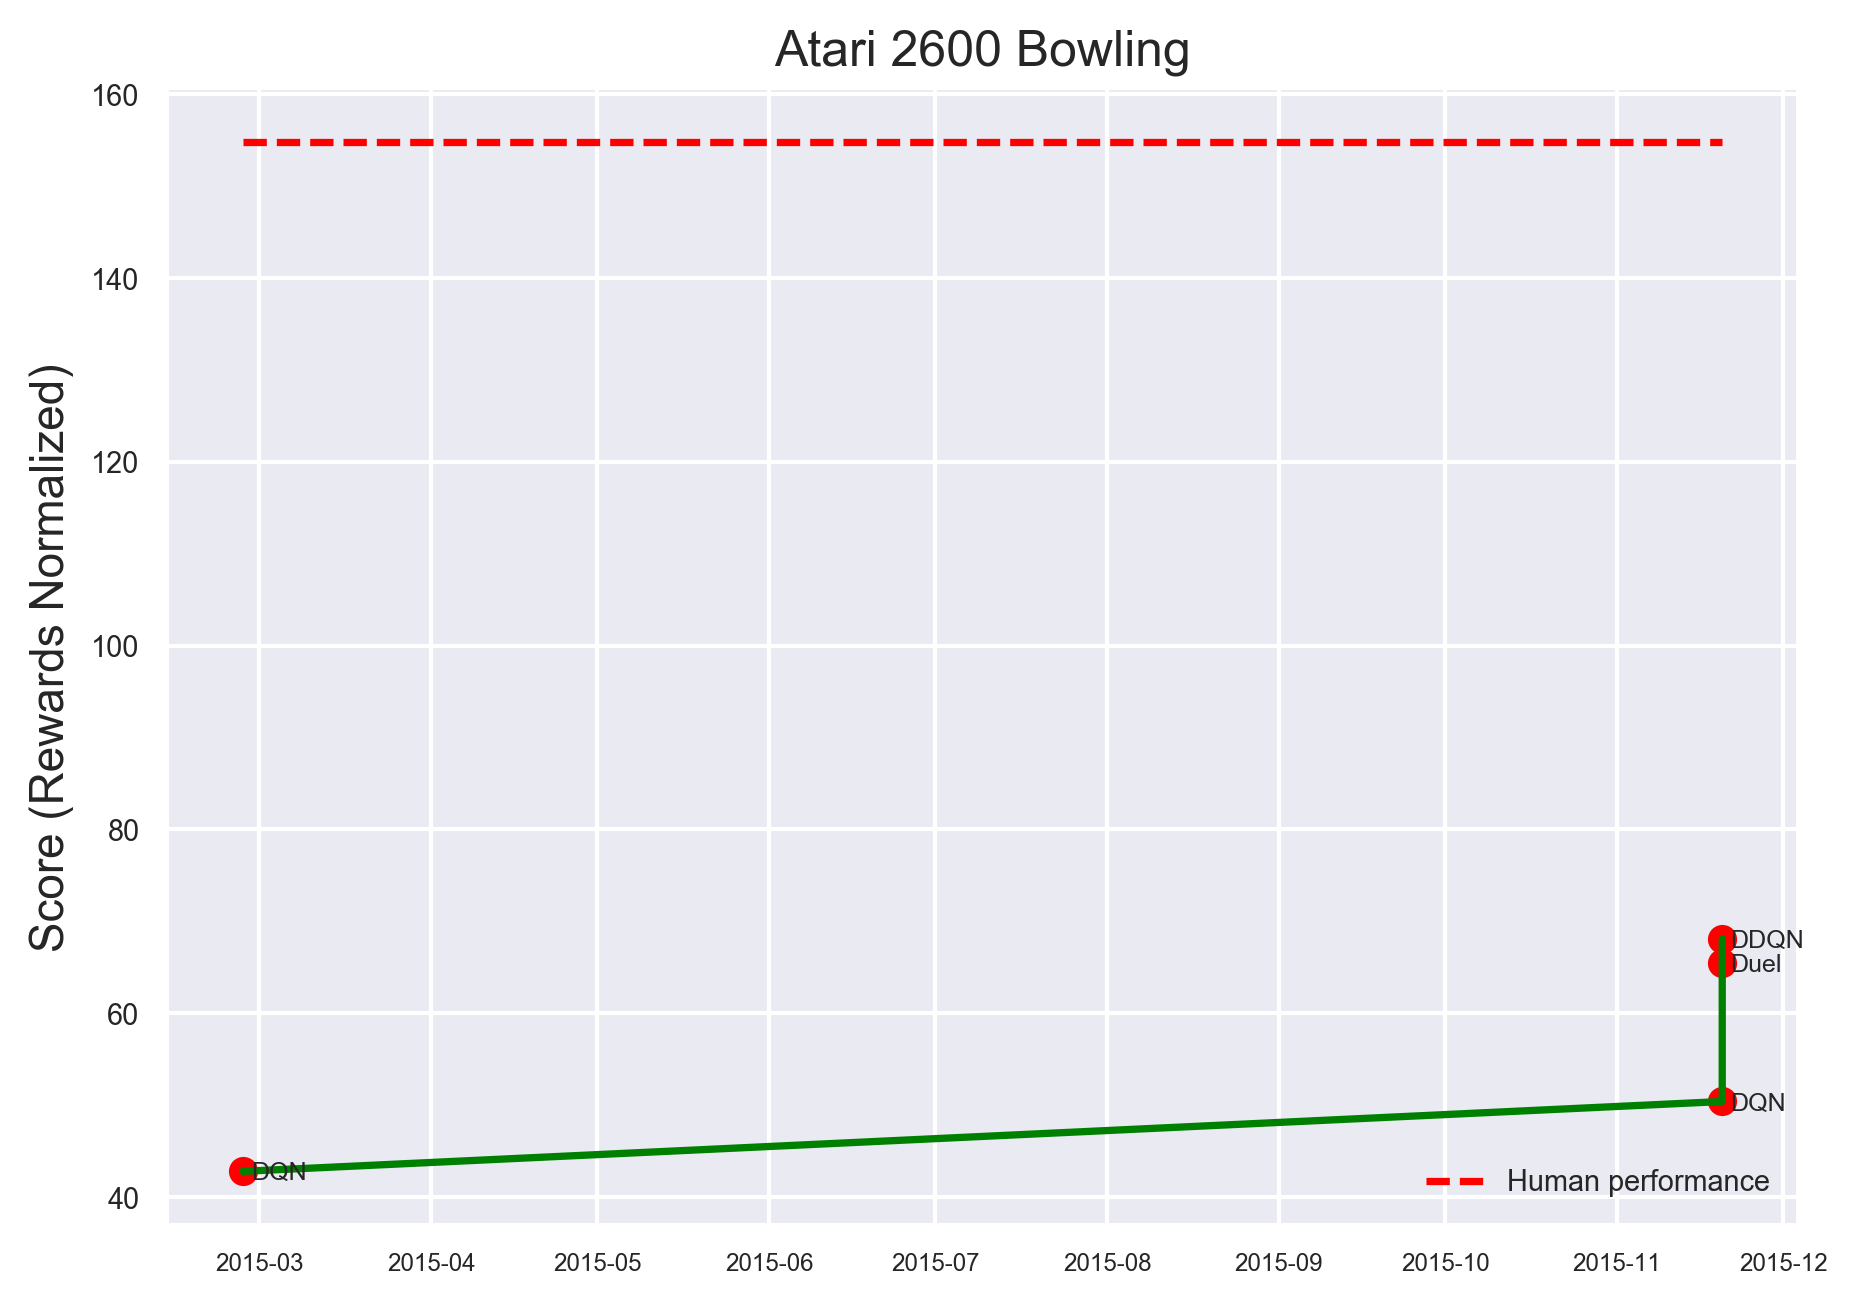

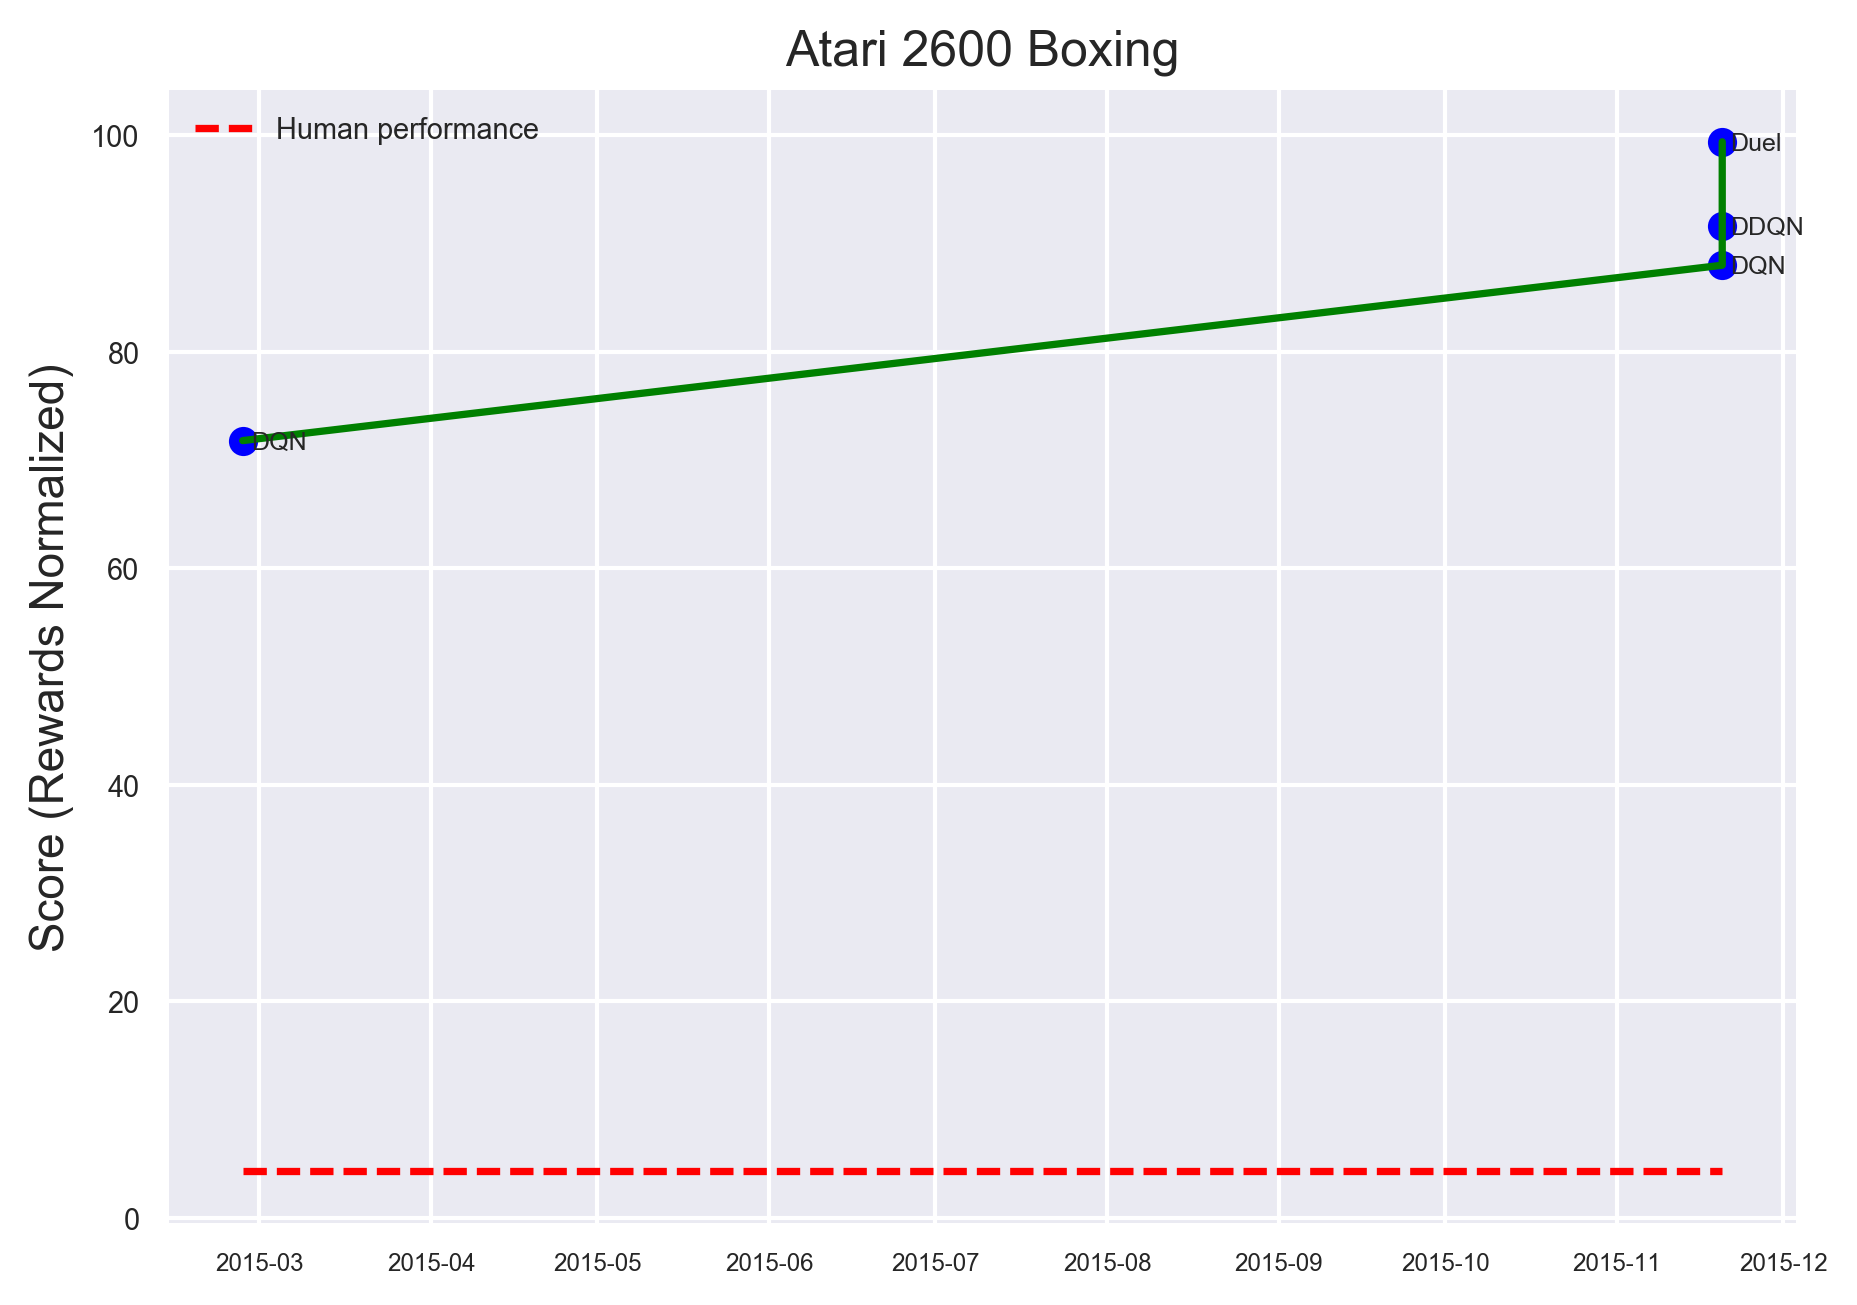

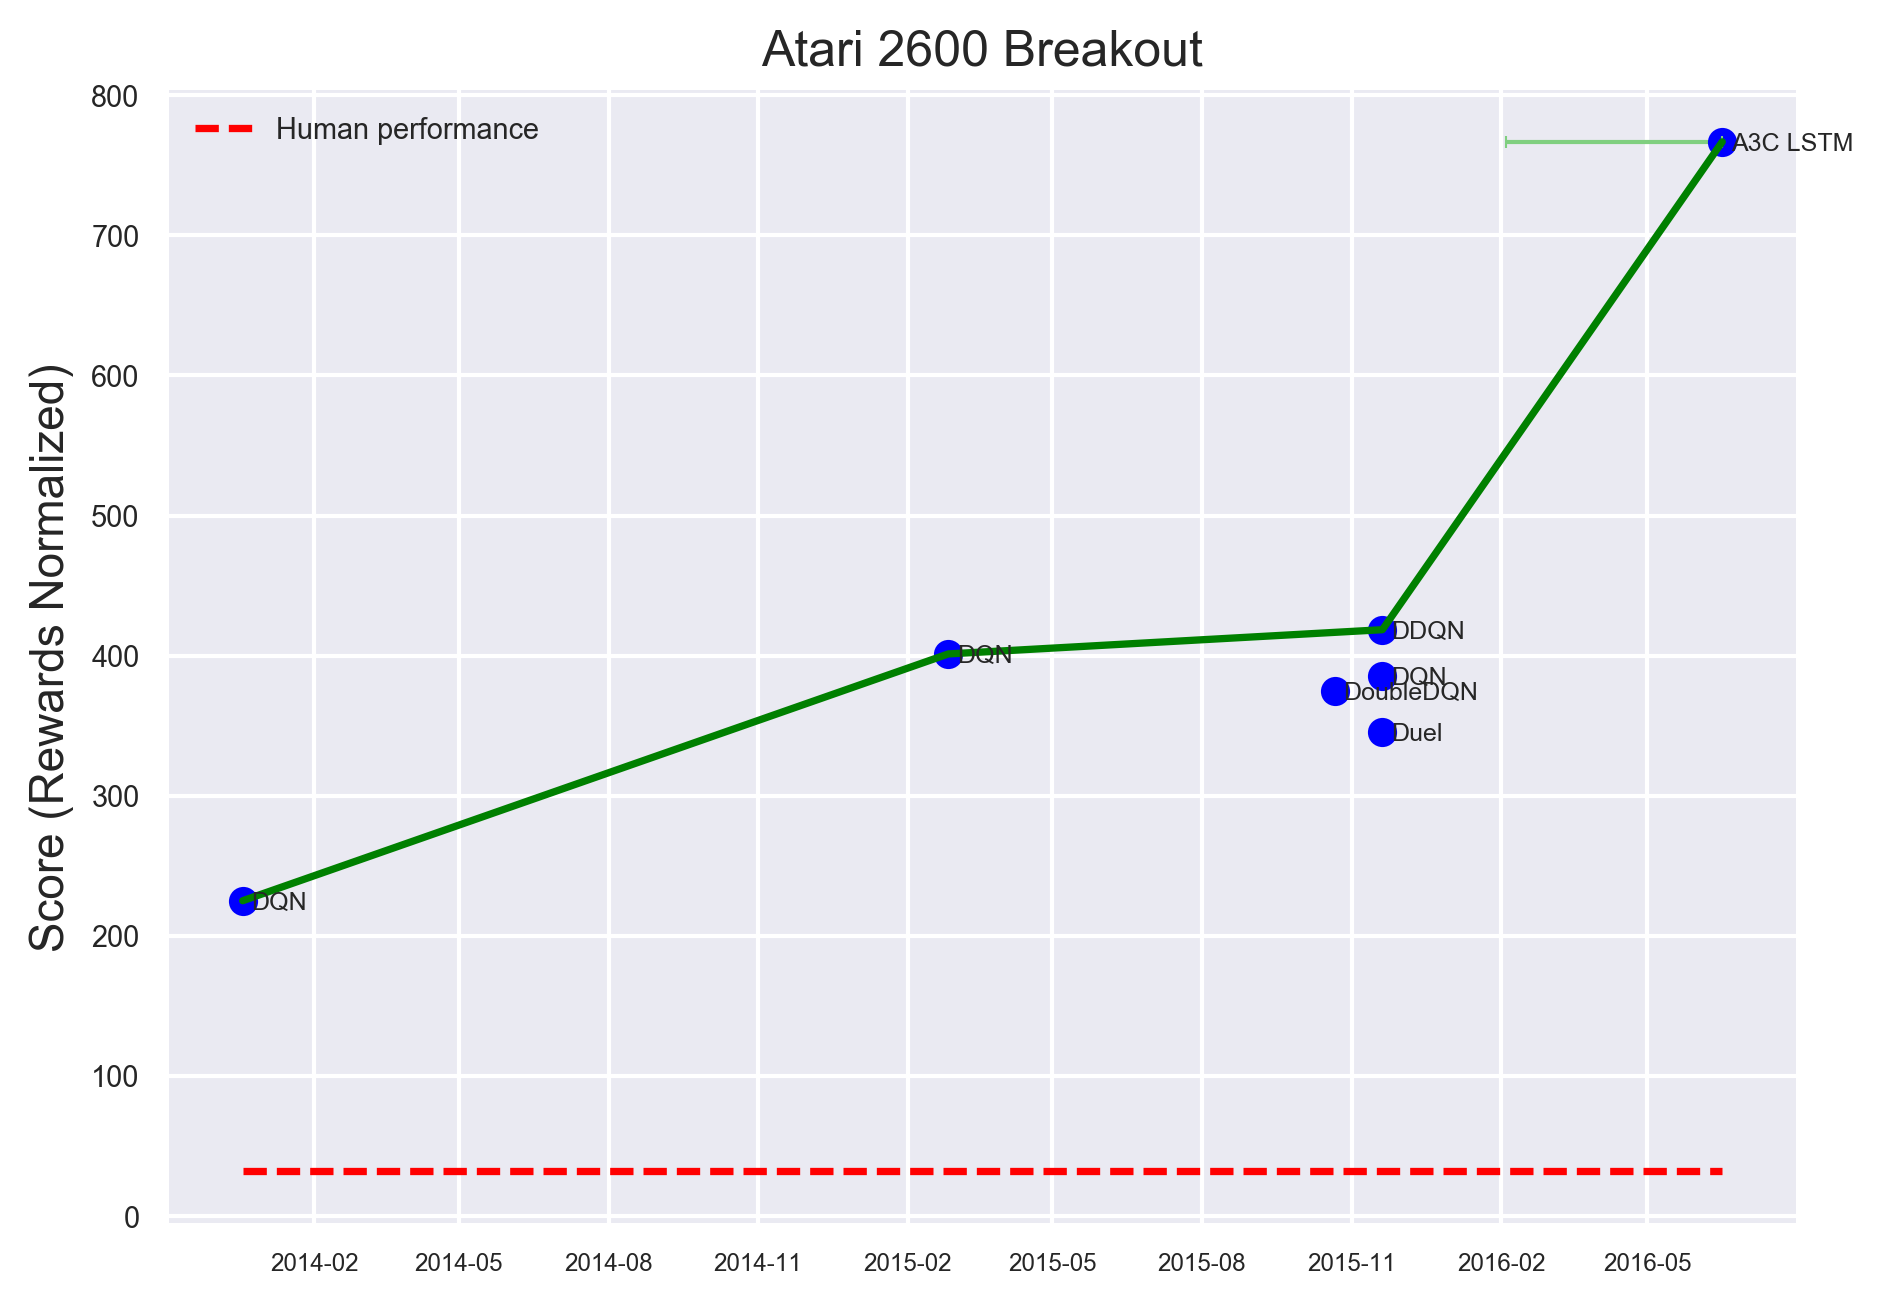

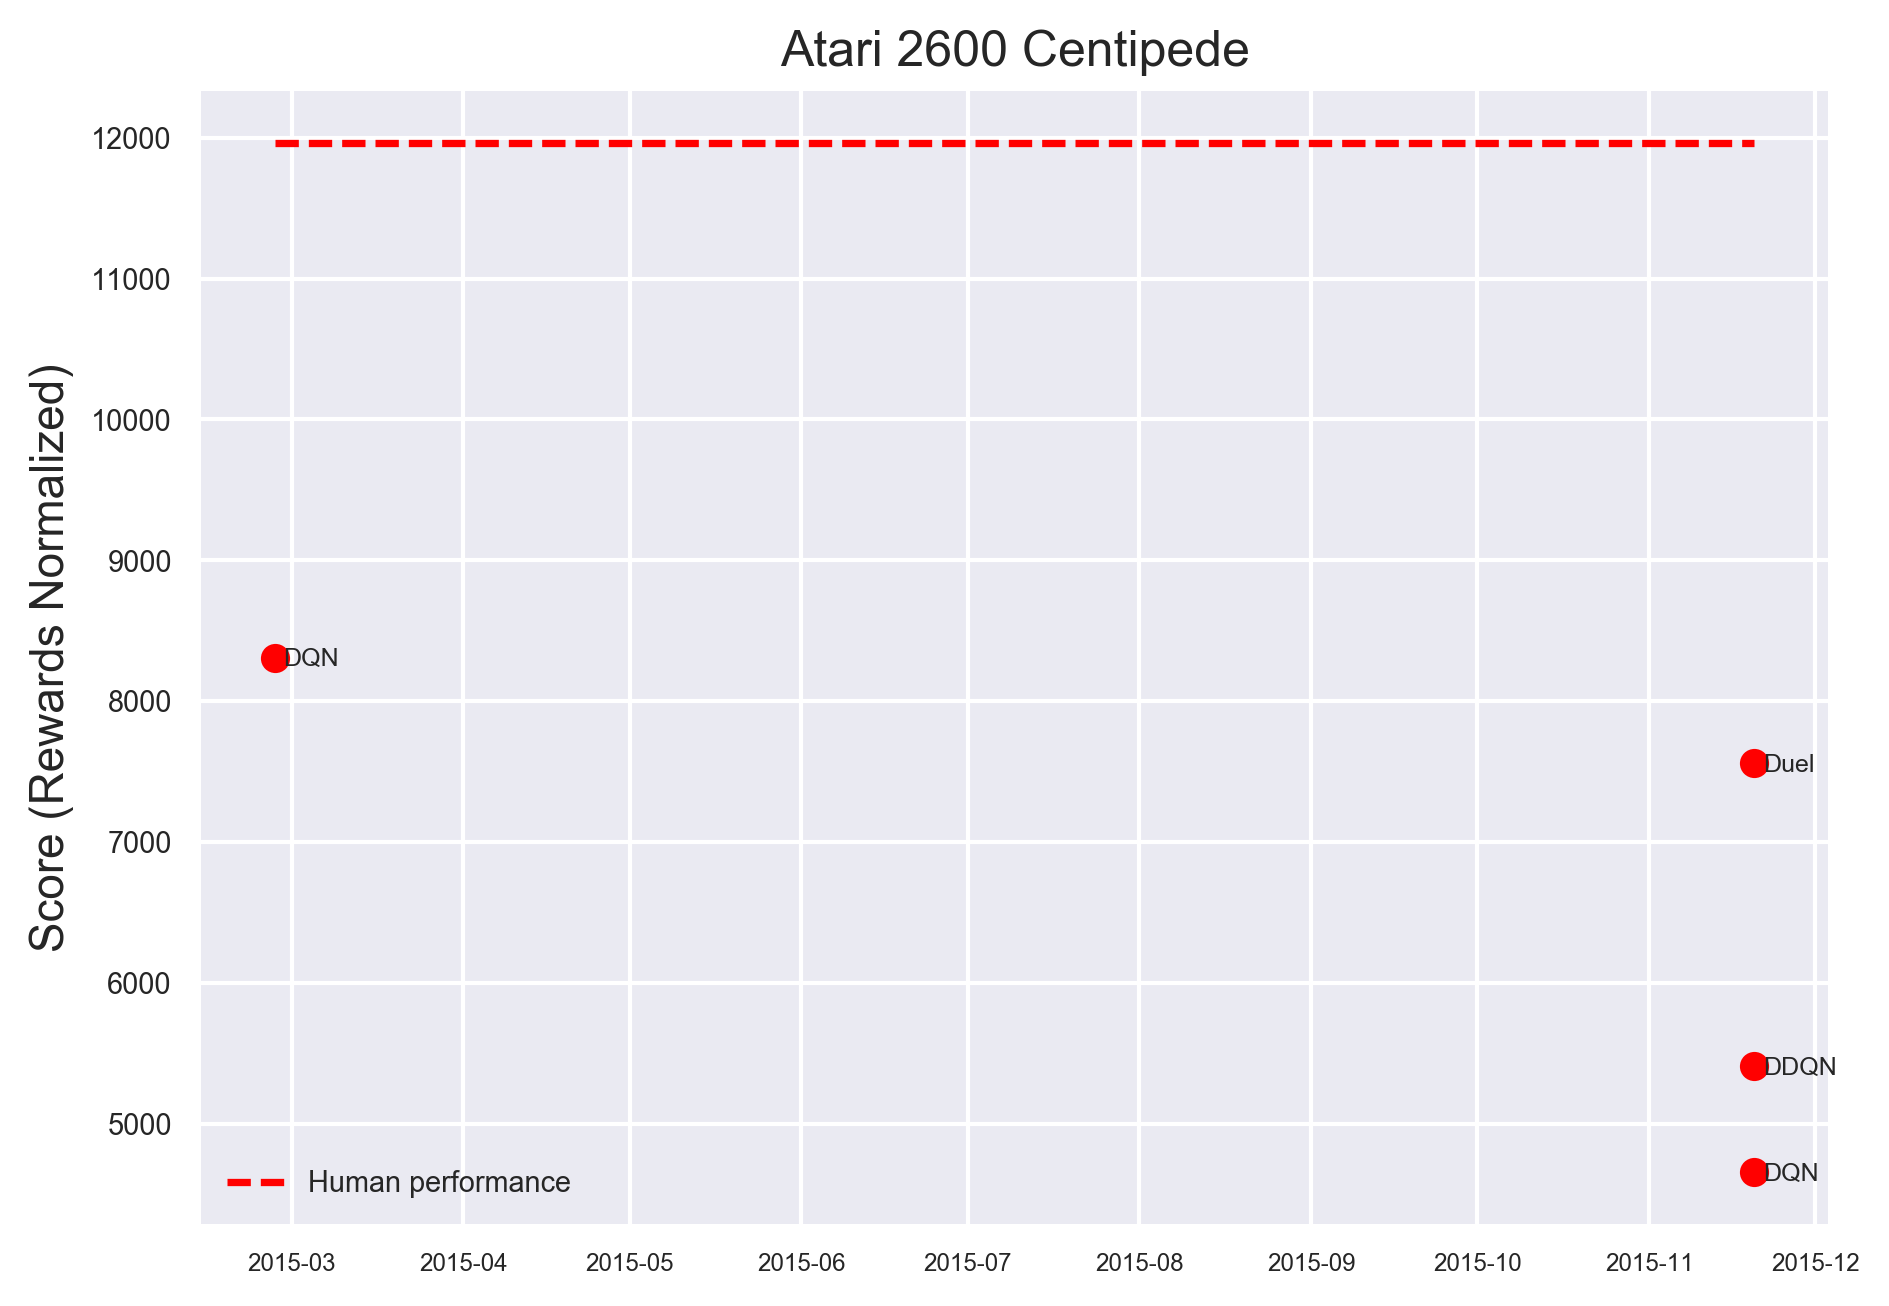

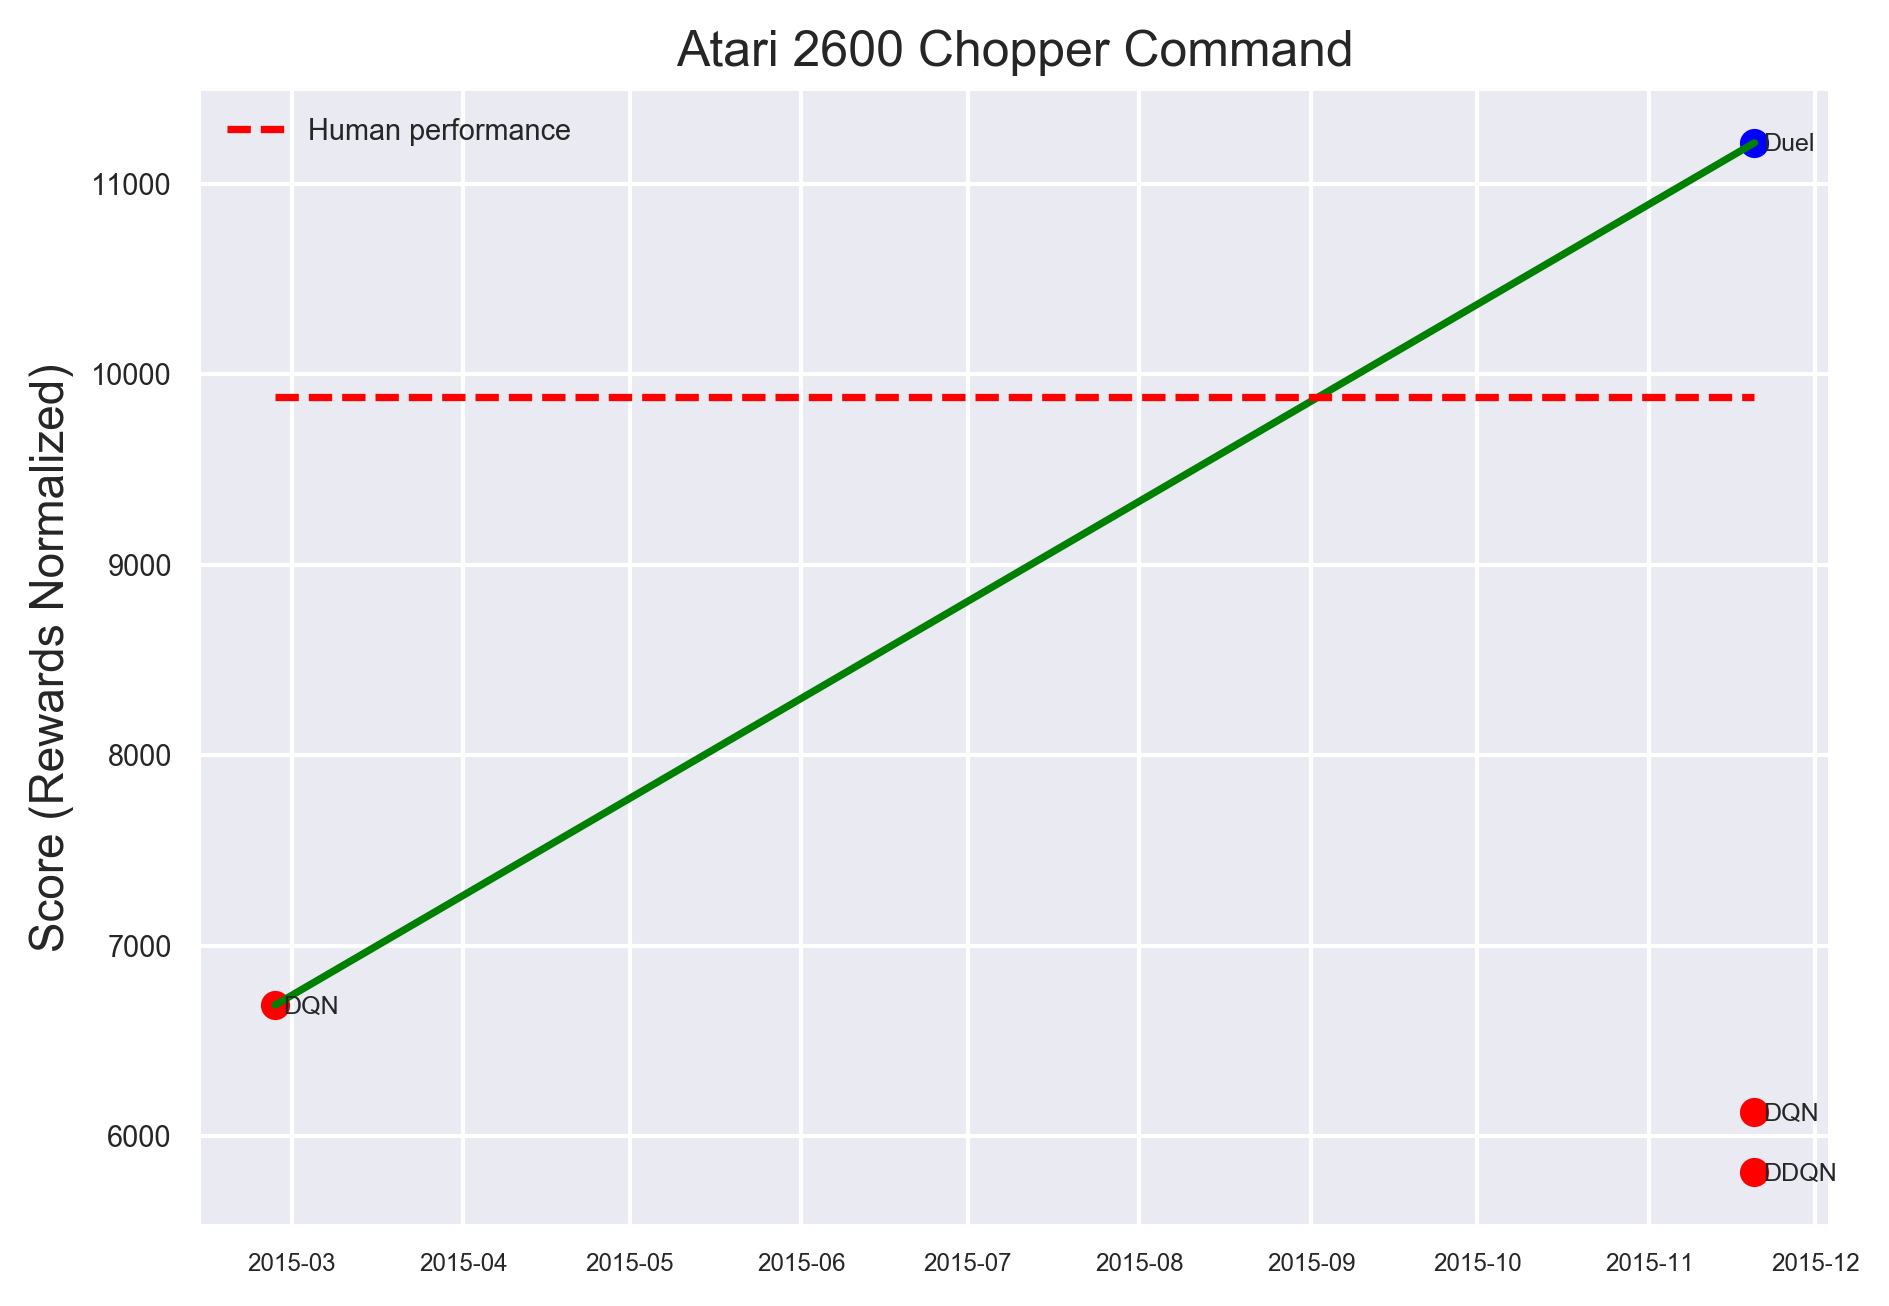

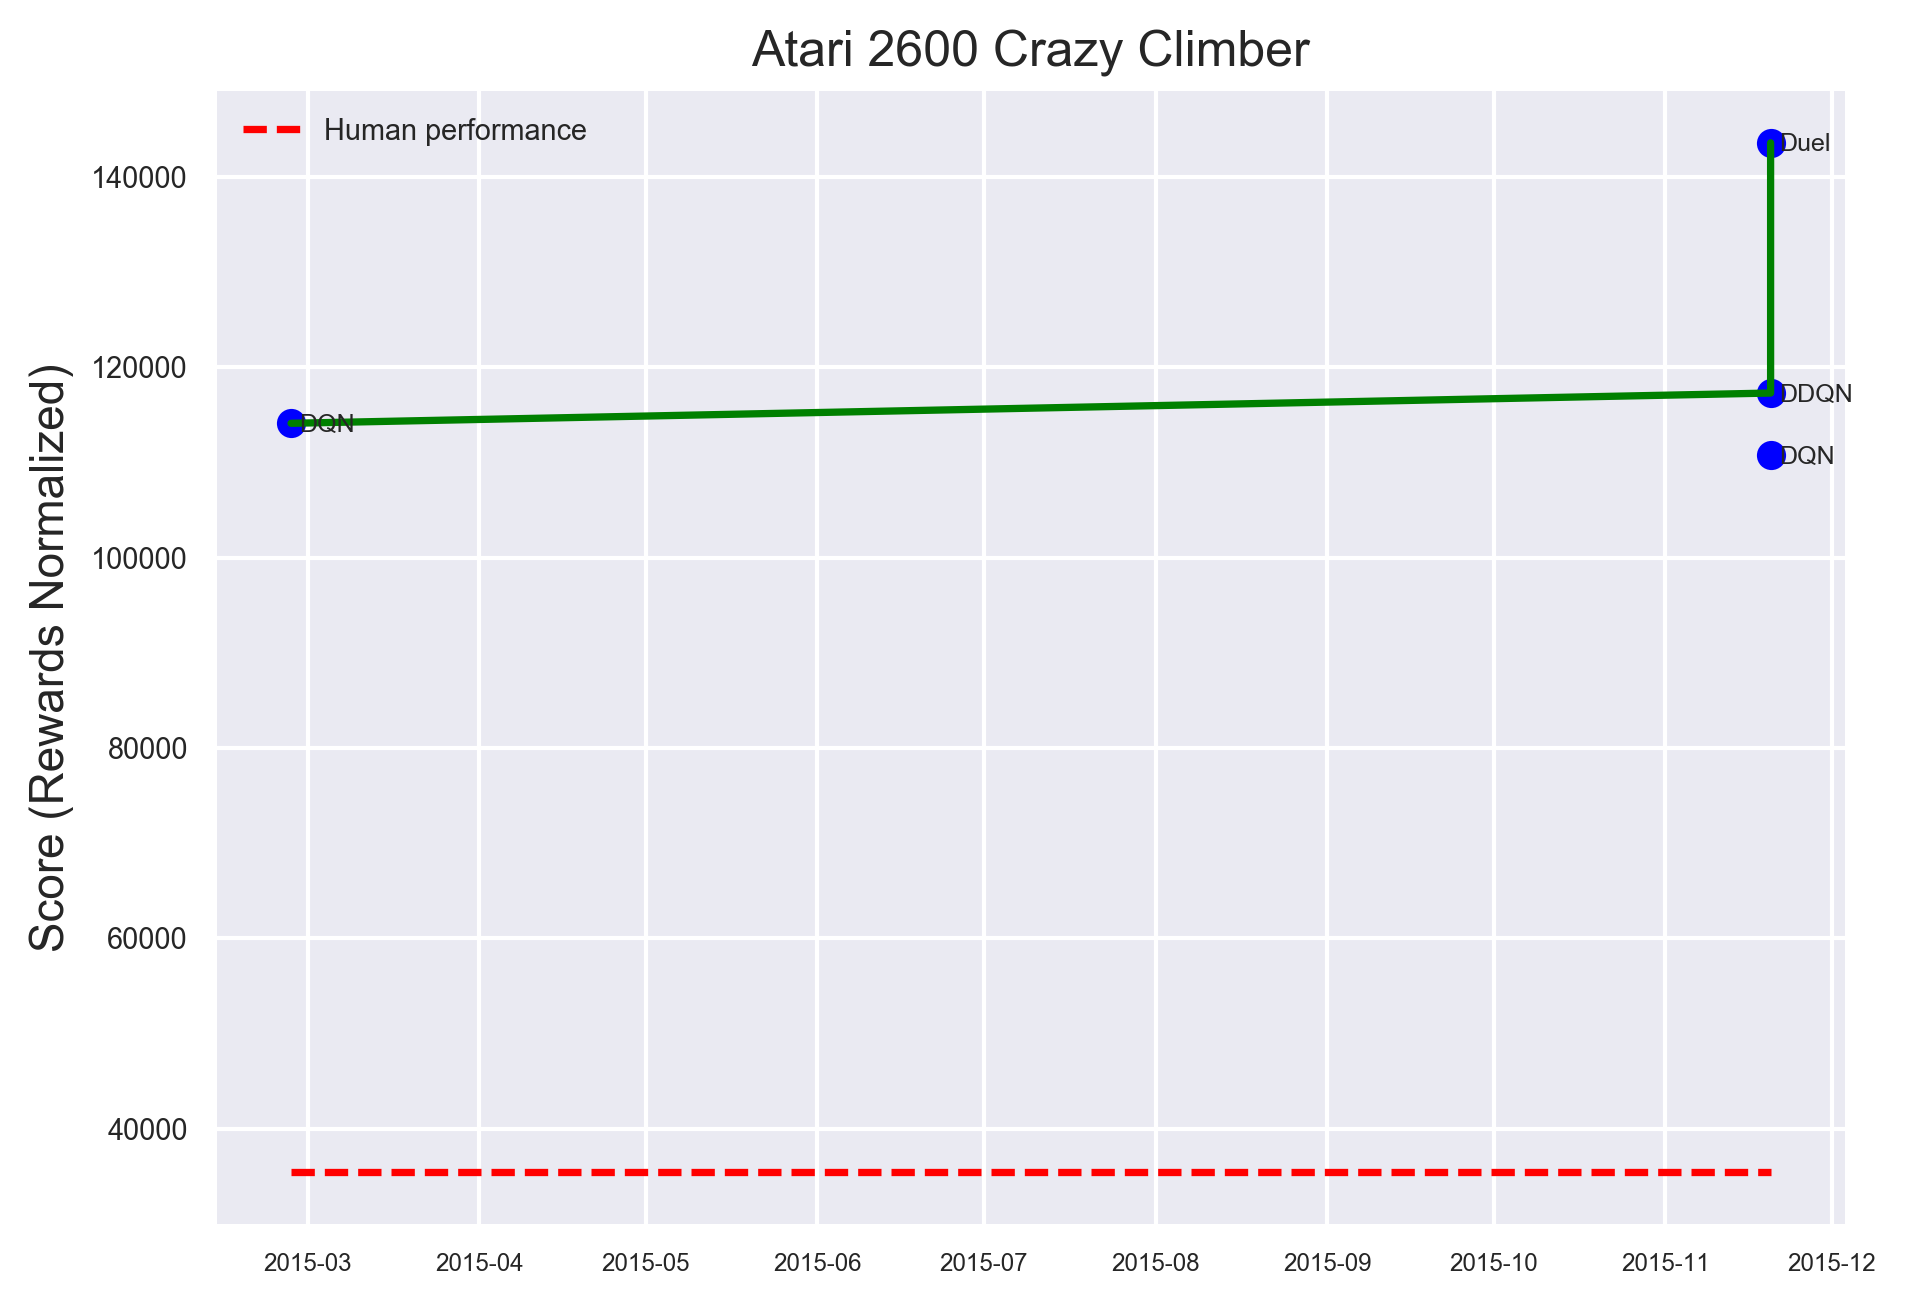

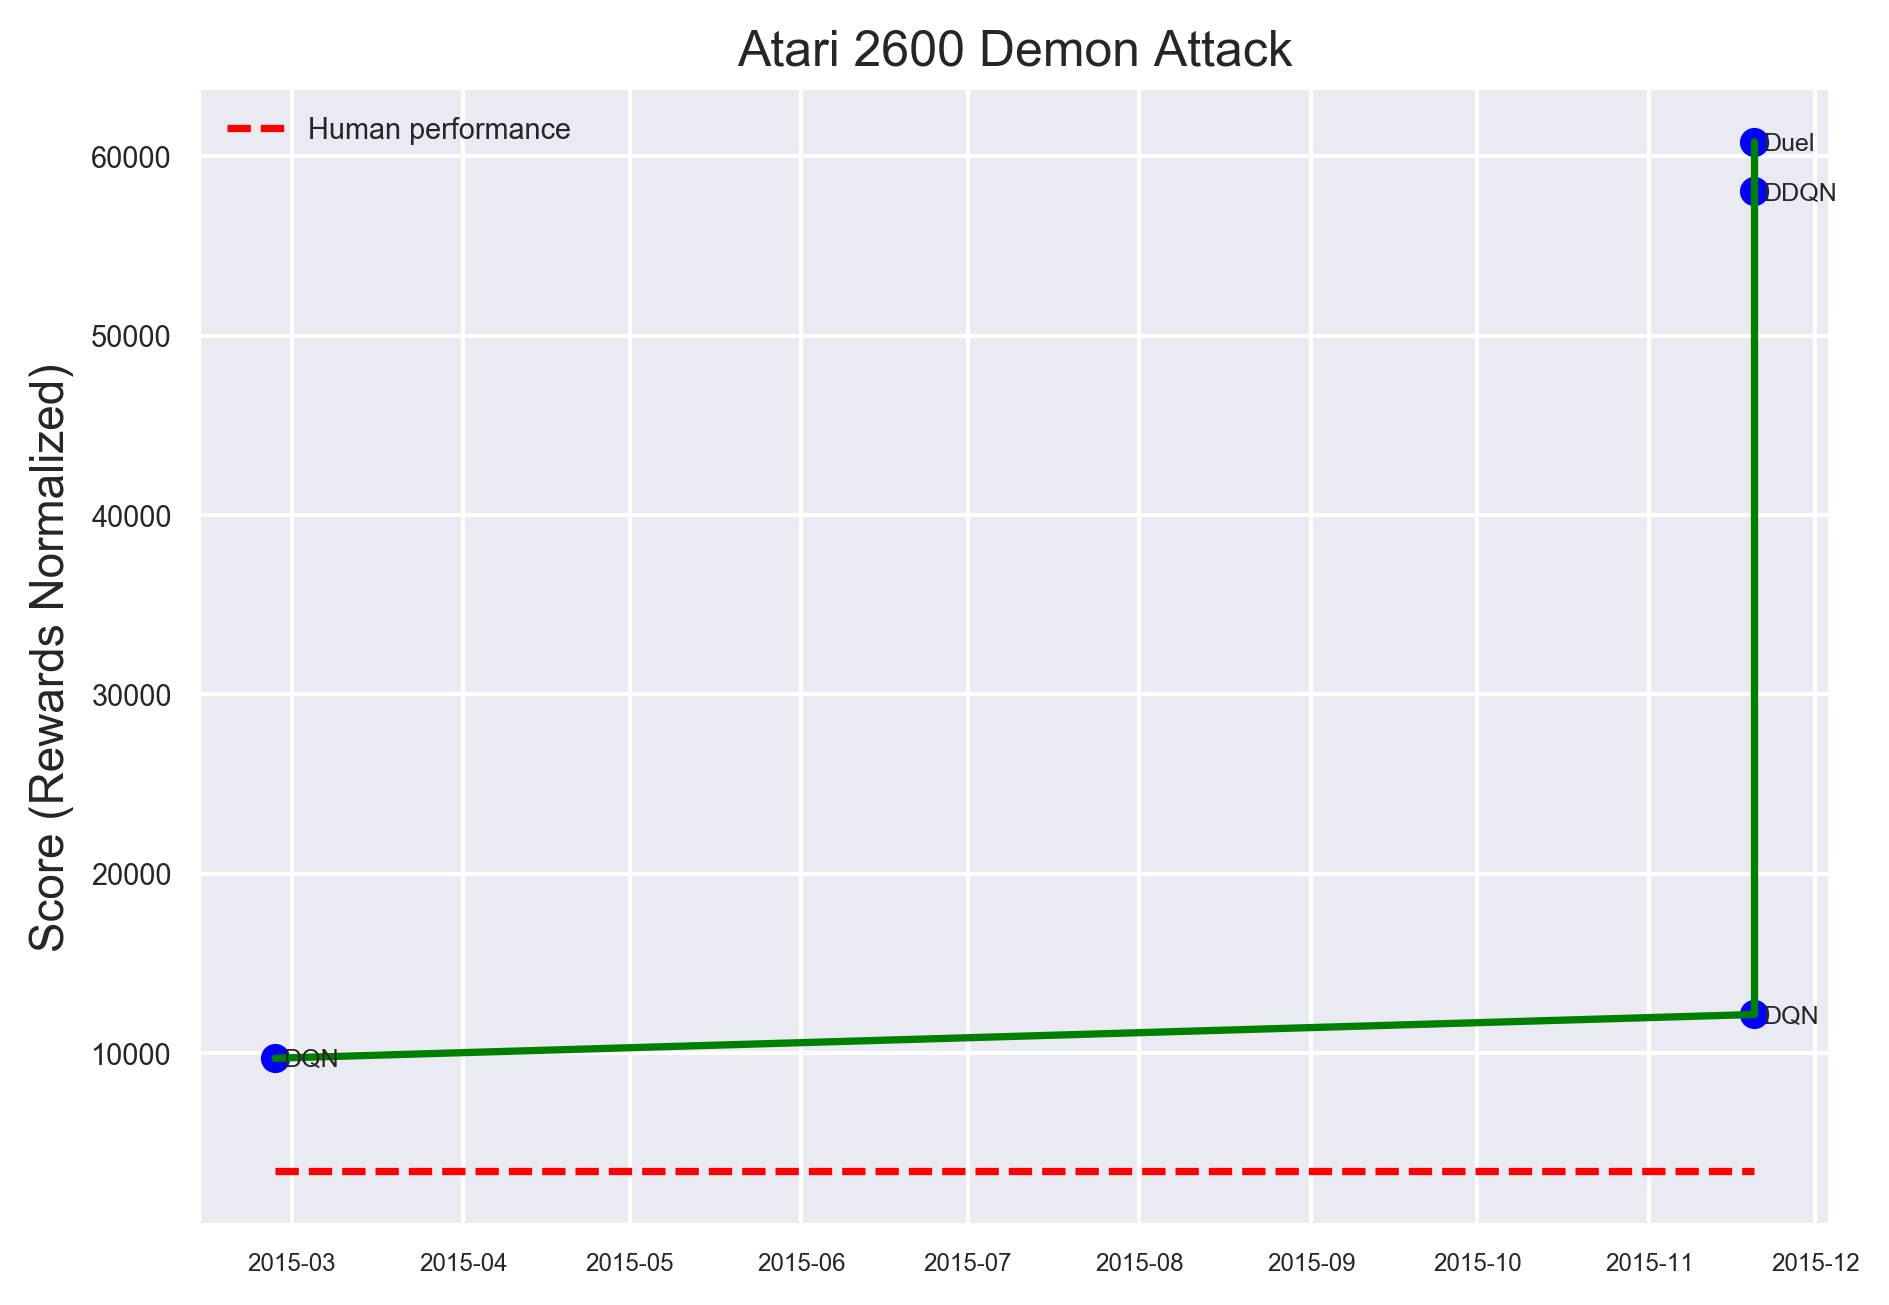

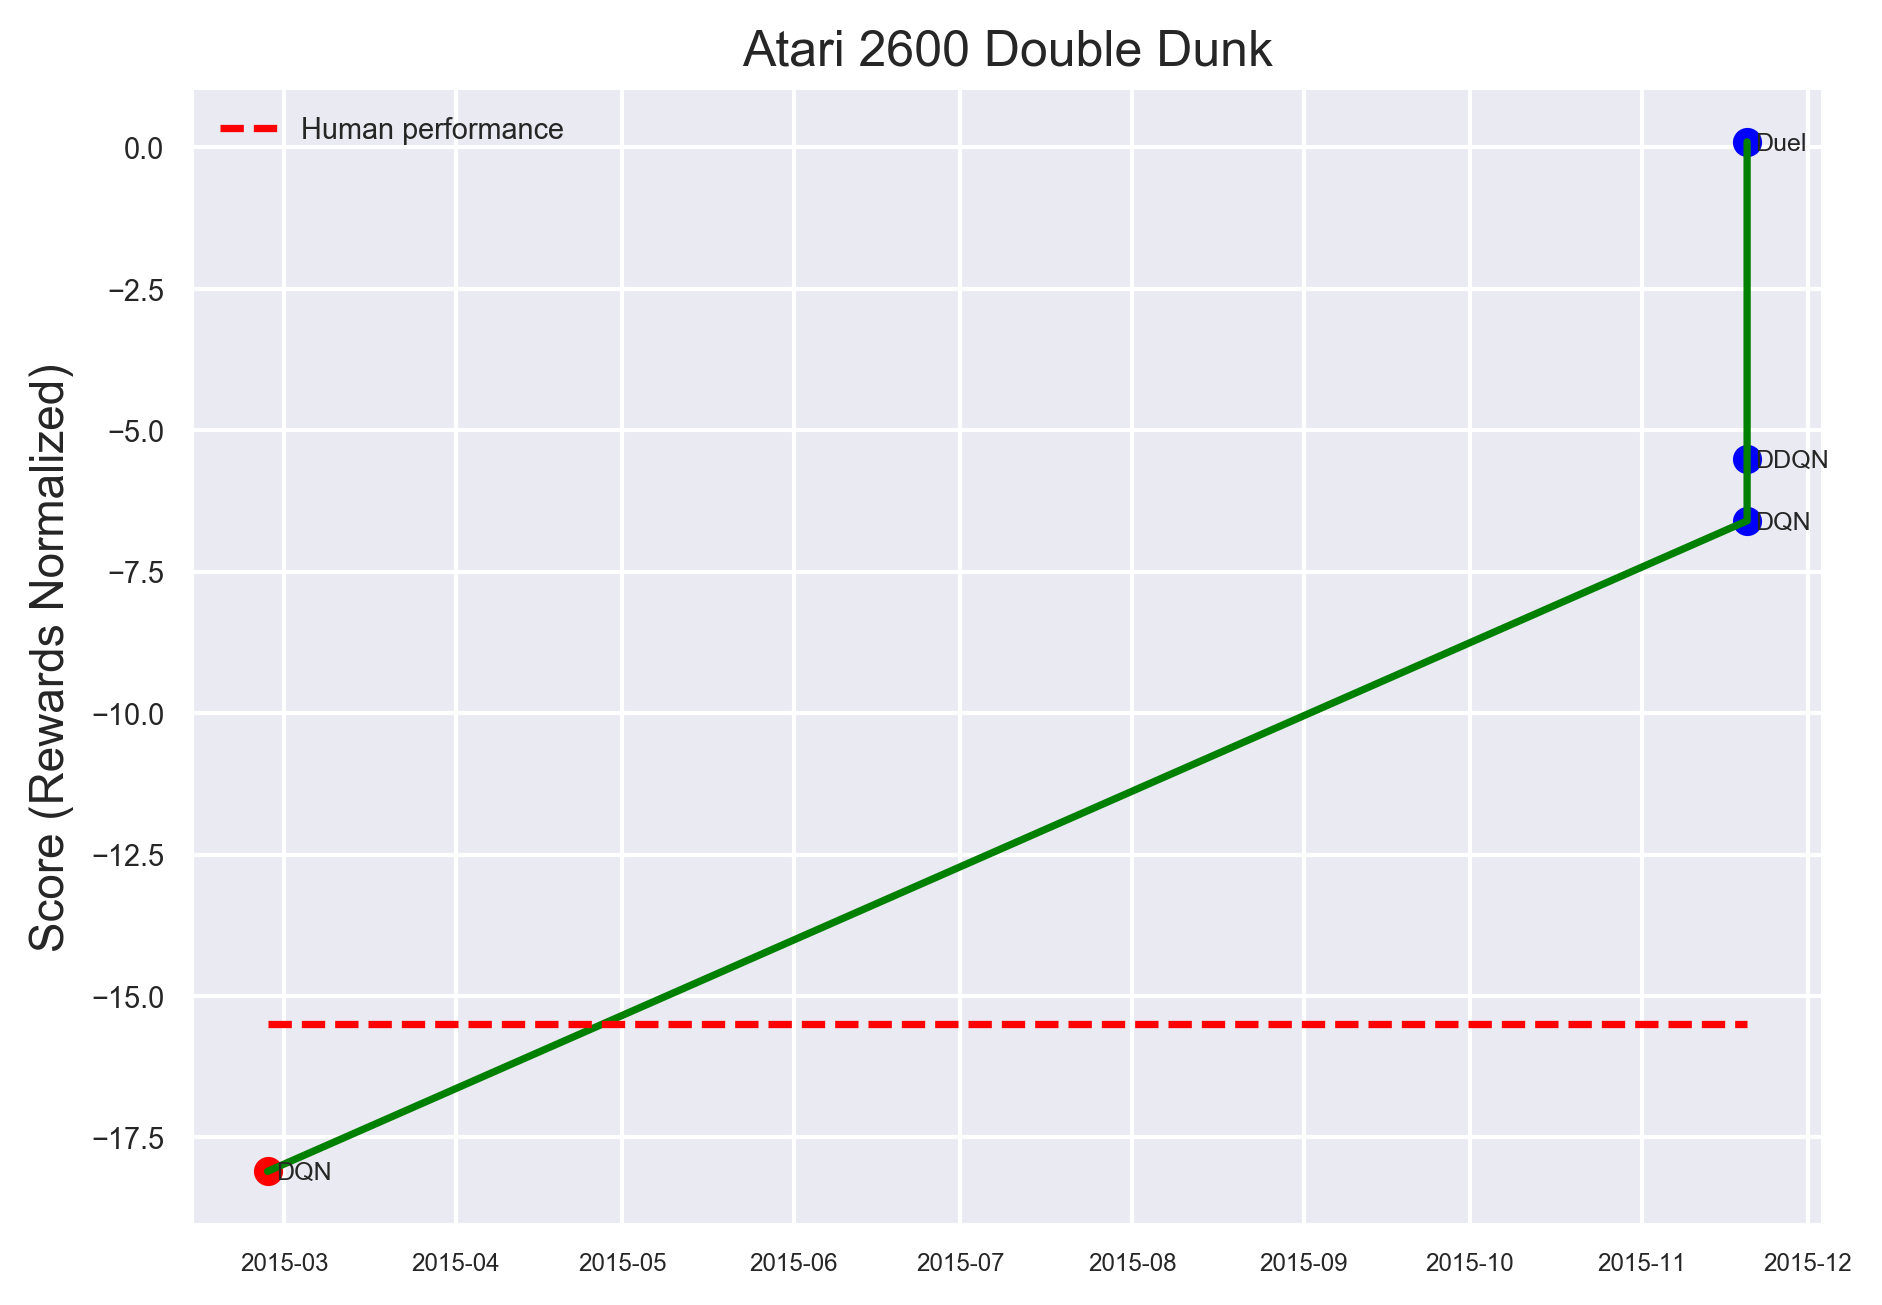

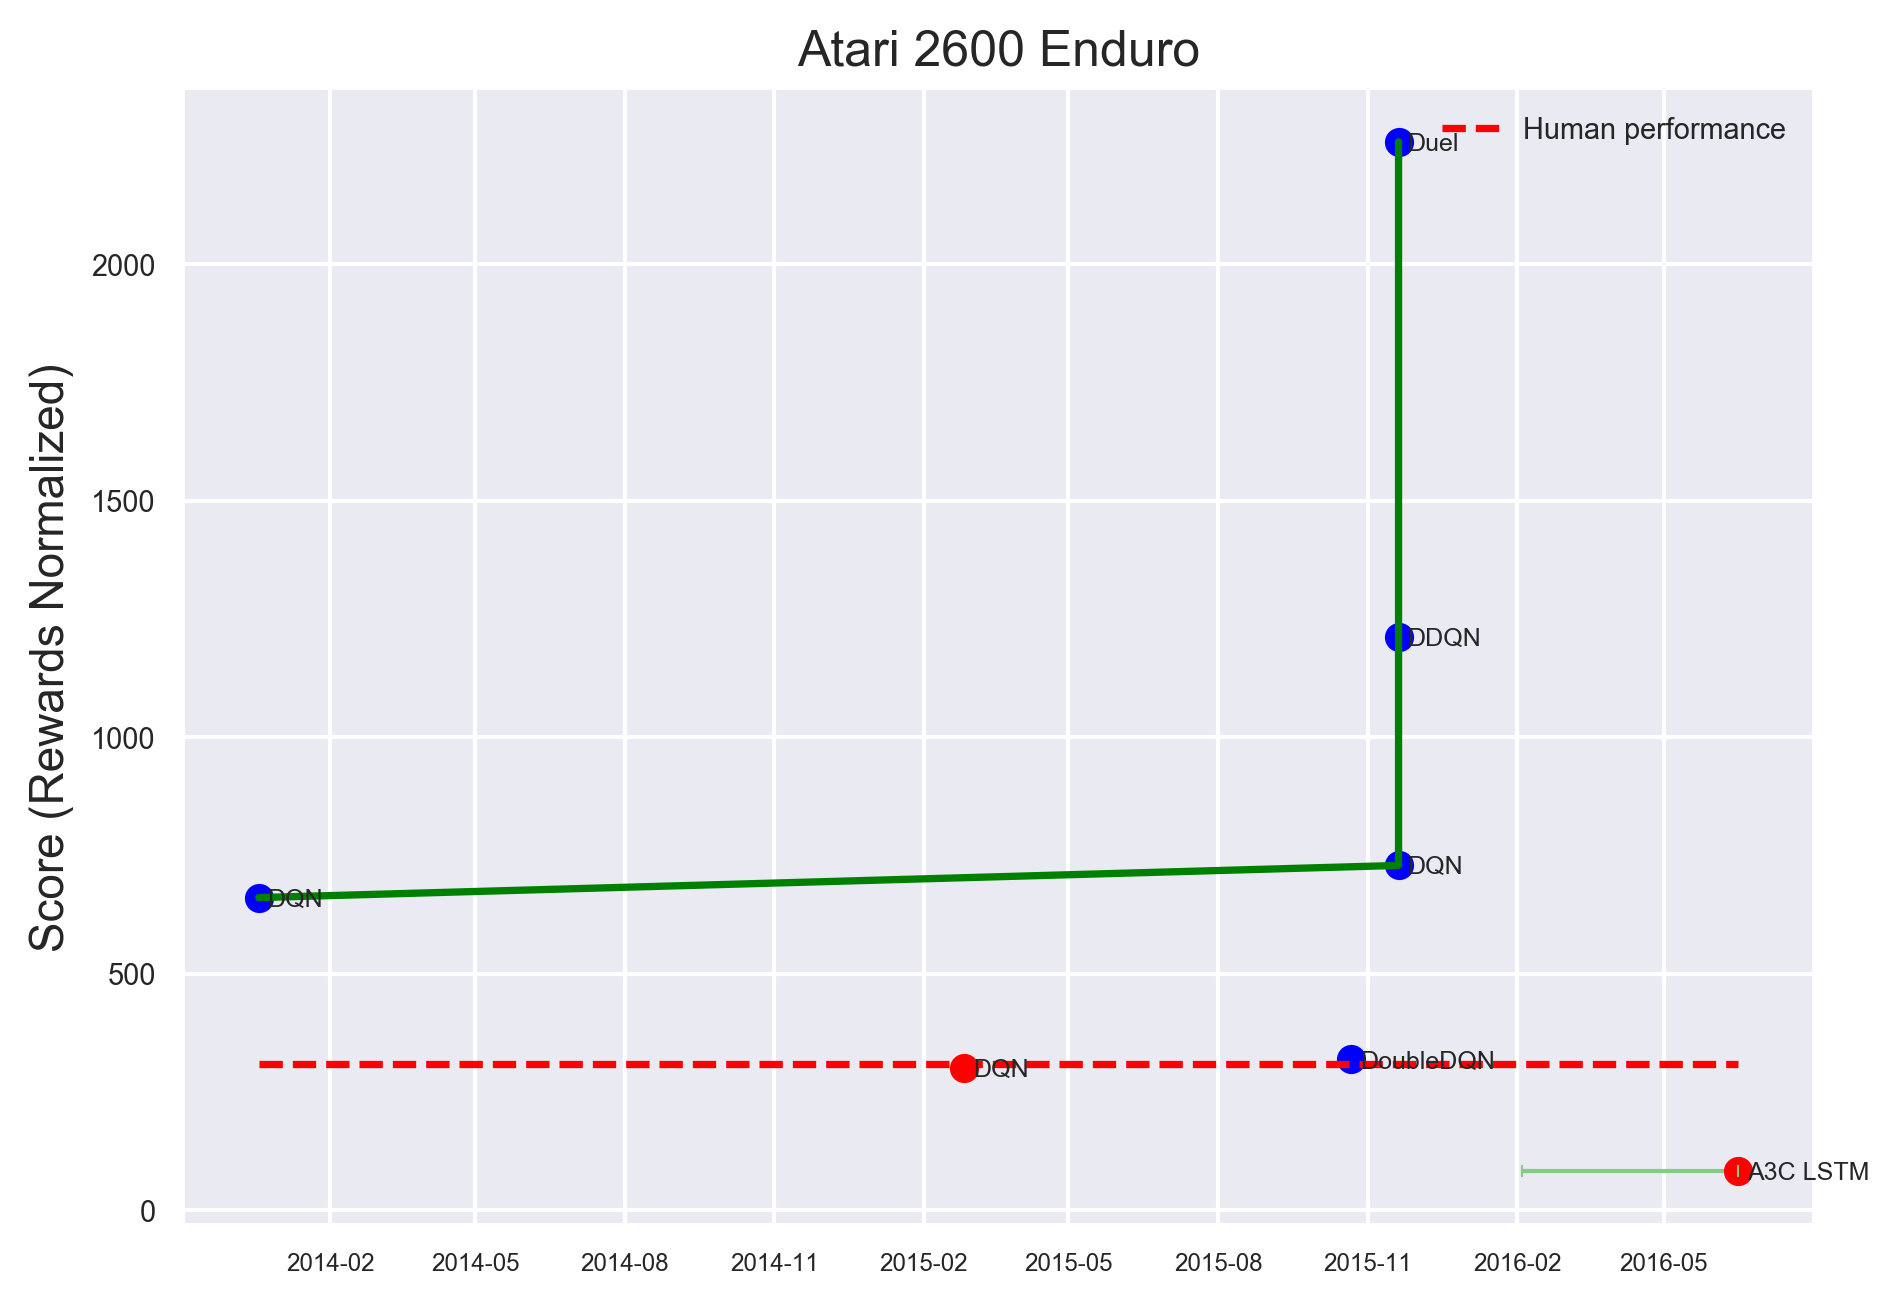

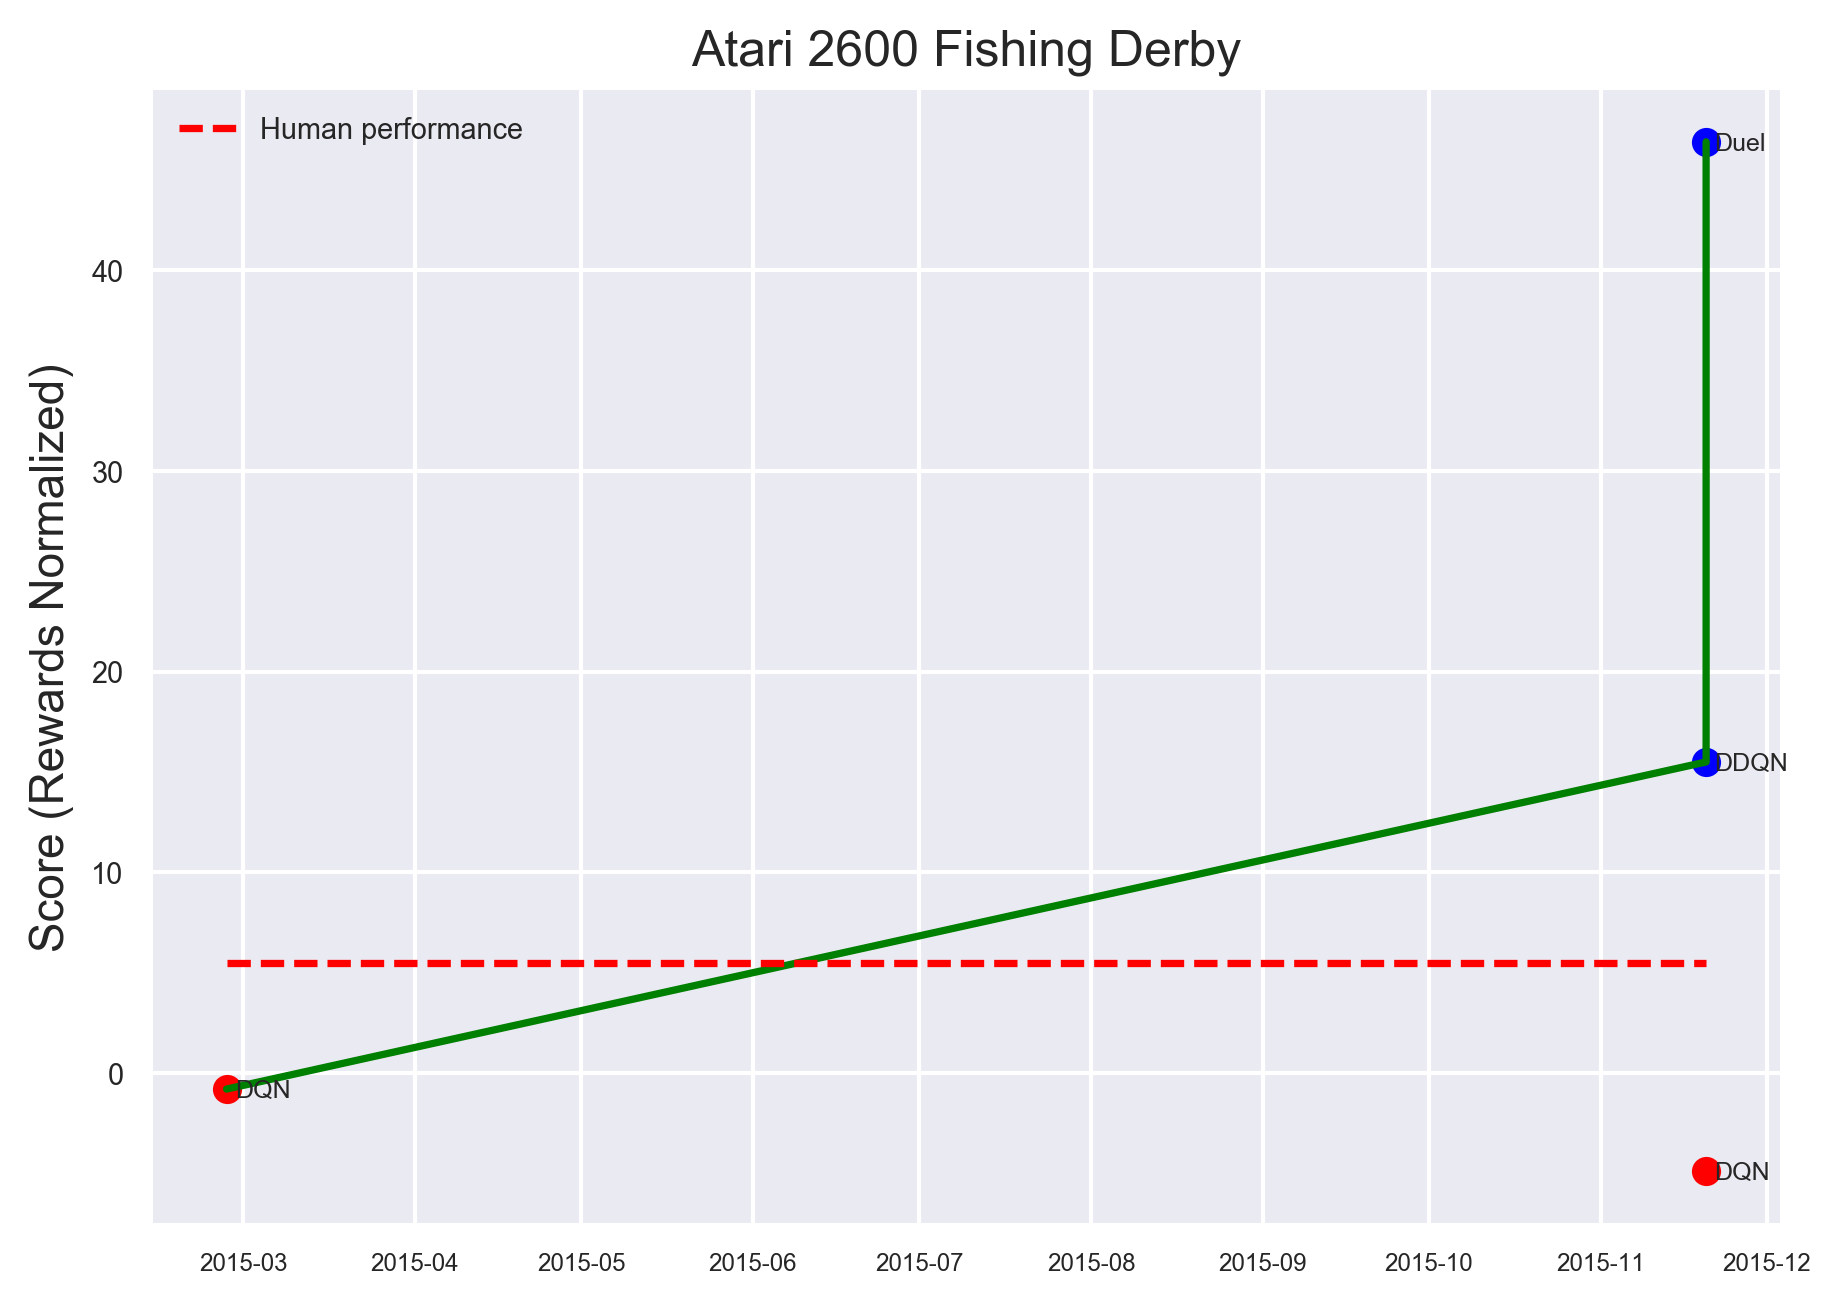

In [ ]:

# Atari 2600 Games: Breakout, Enduro, Pong, Q*Bert, Seaquest, S. Invaders. Each game has its own metric.
# Compiled by Yomna Nasser and Miles Brundage

simple_games = Problem("Simple video games", ["world-modelling", "realtime-games", "agi"]) 
computer_games.add_subproblem(simple_games)

# Alien
alien_metric = simple_games.metric("Atari 2600 Alien", scale=atari_linear, target=6875, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
alien_metric.measure(date(2015, 2, 26), 3069, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
alien_metric.measure(date(2015,11,20), 1620, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
alien_metric.measure(date(2015,11,20), 3747.7, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
alien_metric.measure(date(2015,11,20), 4461.4, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Amidar
amidar_metric = simple_games.metric("Atari 2600 Amidar", scale=atari_linear, target=1676, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
amidar_metric.measure(date(2015, 2, 26), 739.5, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
amidar_metric.measure(date(2015,11,20), 978, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
amidar_metric.measure(date(2015,11,20), 1793.3, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
amidar_metric.measure(date(2015,11,20), 2354.5, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Assault
assault_metric = simple_games.metric("Atari 2600 Assault", scale=atari_linear, target=1496, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
assault_metric.measure(date(2015, 2, 26), 3359, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
assault_metric.measure(date(2015,11,20), 4280.4, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
assault_metric.measure(date(2015,11,20), 5393.2, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
assault_metric.measure(date(2015,11,20), 4621.0, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Asterix
asterix_metric = simple_games.metric("Atari 2600 Asterix", scale=atari_linear, target=8503, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
asterix_metric.measure(date(2015, 2, 26), 6012, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
asterix_metric.measure(date(2015,11,20), 4359, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
asterix_metric.measure(date(2015,11,20), 17356, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
asterix_metric.measure(date(2015,11,20), 28188, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Asteroids
asteroids_metric = simple_games.metric("Atari 2600 Asteroids", scale=atari_linear, target=13157, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
asteroids_metric.measure(date(2015, 2, 26), 1629, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
asteroids_metric.measure(date(2015,11,20), 1364.5, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
asteroids_metric.measure(date(2015,11,20), 734.7, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
asteroids_metric.measure(date(2015,11,20), 2837.7, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Atlantis
atlantis_metric = simple_games.metric("Atari 2600 Atlantis", scale=atari_linear, target=29028, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
atlantis_metric.measure(date(2015, 2, 26), 85641, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
atlantis_metric.measure(date(2015,11,20), 279987, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
atlantis_metric.measure(date(2015,11,20), 106056, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
atlantis_metric.measure(date(2015,11,20), 382572, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Bank Heist
bank_heist_metric = simple_games.metric("Atari 2600 Bank Heist", scale=atari_linear, target=734.4, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
bank_heist_metric.measure(date(2015, 2, 26), 429.7, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
bank_heist_metric.measure(date(2015,11,20), 455, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
bank_heist_metric.measure(date(2015,11,20), 1030.6, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
bank_heist_metric.measure(date(2015,11,20), 1611.9, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Battle Zone
battle_zone_metric = simple_games.metric("Atari 2600 Battle Zone", scale=atari_linear, target=37800, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
battle_zone_metric.measure(date(2015, 2, 26), 26300, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
battle_zone_metric.measure(date(2015,11,20), 29900, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
battle_zone_metric.measure(date(2015,11,20), 31700, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
battle_zone_metric.measure(date(2015,11,20), 37150, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Beam Rider
beam_rider_metric = simple_games.metric("Atari 2600 Beam Rider", scale=atari_linear, target=7456, target_source="https://arxiv.org/pdf/1312.5602.pdf")
beam_rider_metric.measure(date(2013,12,19), 4092, "DQN", "https://arxiv.org/pdf/1312.5602.pdf")
beam_rider_metric.measure(date(2015,11,20), 8627, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
beam_rider_metric.measure(date(2015,11,20), 13772, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
beam_rider_metric.measure(date(2015,11,20), 12164, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Berzerk 
berzerk_metric = simple_games.metric("Atari 2600 Berzerk", scale=atari_linear, target=2630.4, target_source="https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
berzerk_metric.measure(date(2015,11,20), 585, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
berzerk_metric.measure(date(2015,11,20), 1225, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
berzerk_metric.measure(date(2015,11,20), 1472, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Bowling
bowling_metric = simple_games.metric("Atari 2600 Bowling", scale=atari_linear, target=154.8, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
bowling_metric.measure(date(2015, 2, 26), 42.8, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
bowling_metric.measure(date(2015,11,20), 50.4, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
bowling_metric.measure(date(2015,11,20), 68.1, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
bowling_metric.measure(date(2015,11,20), 65.5, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Boxing
boxing_metric = simple_games.metric("Atari 2600 Boxing", scale=atari_linear, target=4.3, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
boxing_metric.measure(date(2015, 2, 26), 71.8, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
boxing_metric.measure(date(2015,11,20), 88, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
boxing_metric.measure(date(2015,11,20), 91.6, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
boxing_metric.measure(date(2015,11,20), 99.4, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Breakout
breakout_metric = simple_games.metric("Atari 2600 Breakout", scale=atari_linear, target=31.8, target_source="https://pdfs.semanticscholar.org/340f/48901f72278f6bf78a04ee5b01df208cc508.pdf")
breakout_metric.measure(date(2013,12,19), 225, "DQN", "https://arxiv.org/pdf/1312.5602.pdf")
breakout_metric.measure(date(2015,2,26), 401.2, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
breakout_metric.measure(date(2015,10,22), 375, "DoubleDQN", "https://pdfs.semanticscholar.org/3b97/32bb07dc99bde5e1f9f75251c6ea5039373e.pdf")

breakout_metric.measure(date(2015,11,20), 385.5, "DQN", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
breakout_metric.measure(date(2015,11,20), 418.5, "DDQN", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
breakout_metric.measure(date(2015,11,20), 345.3, "Duel", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

breakout_metric.measure(date(2016,6,16), 766.8, "A3C LSTM", "https://arxiv.org/pdf/1602.01783.pdf")

# Centipede
centipede_metric = simple_games.metric("Atari 2600 Centipede", scale=atari_linear, target=11963, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
centipede_metric.measure(date(2015, 2, 26), 8309, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
centipede_metric.measure(date(2015,11,20), 4657, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
centipede_metric.measure(date(2015,11,20), 5409, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
centipede_metric.measure(date(2015,11,20), 7561, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Chopper Command
chopper_command_metric = simple_games.metric("Atari 2600 Chopper Command", scale=atari_linear, target=9882, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
chopper_command_metric.measure(date(2015, 2, 26), 6687, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
chopper_command_metric.measure(date(2015,11,20), 6126, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
chopper_command_metric.measure(date(2015,11,20), 5809, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
chopper_command_metric.measure(date(2015,11,20), 11215, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Crazy Climber
crazy_climber_metric = simple_games.metric("Atari 2600 Crazy Climber", scale=atari_linear, target=35411, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
crazy_climber_metric.measure(date(2015, 2, 26), 114103, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
crazy_climber_metric.measure(date(2015,11,20), 110763, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
crazy_climber_metric.measure(date(2015,11,20), 117282, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
crazy_climber_metric.measure(date(2015,11,20), 143570, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Demon Attack
demon_attack_metric = simple_games.metric("Atari 2600 Demon Attack", scale=atari_linear, target=3401, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
demon_attack_metric.measure(date(2015, 2, 26), 9711, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
demon_attack_metric.measure(date(2015,11,20), 12149, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
demon_attack_metric.measure(date(2015,11,20), 58044, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
demon_attack_metric.measure(date(2015,11,20), 60813, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Double Dunk
# TODO: investigate alternate scale
double_dunk_metric = simple_games.metric("Atari 2600 Double Dunk", scale=atari_linear, target=-15.5, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
double_dunk_metric.measure(date(2015, 2, 26), -18.1, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
double_dunk_metric.measure(date(2015,11,20), -6.6, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
double_dunk_metric.measure(date(2015,11,20), -5.5, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
double_dunk_metric.measure(date(2015,11,20), 0.1, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Enduro
enduro_metric = simple_games.metric("Atari 2600 Enduro", scale=atari_linear, target=309.6, target_source="https://pdfs.semanticscholar.org/340f/48901f72278f6bf78a04ee5b01df208cc508.pdf")
enduro_metric.measure(date(2013,12,19), 661, "DQN", "https://arxiv.org/pdf/1312.5602.pdf")
enduro_metric.measure(date(2015,2,26), 301, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
enduro_metric.measure(date(2015,10,22), 319, "DoubleDQN", "https://pdfs.semanticscholar.org/3b97/32bb07dc99bde5e1f9f75251c6ea5039373e.pdf")

enduro_metric.measure(date(2015,11,20), 729.0, "DQN", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
enduro_metric.measure(date(2015,11,20), 1211.8, "DDQN", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
enduro_metric.measure(date(2015,11,20), 2258.2, "Duel", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

enduro_metric.measure(date(2016,6,16), 82.5, "A3C LSTM", "https://arxiv.org/pdf/1602.01783.pdf")

# Fishing Derby
fishing_derby_metric = simple_games.metric("Atari 2600 Fishing Derby", scale=atari_linear, target=5.5, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
fishing_derby_metric.measure(date(2015, 2, 26), -0.8, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
fishing_derby_metric.measure(date(2015,11,20), -4.9, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
fishing_derby_metric.measure(date(2015,11,20), 15.5, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
fishing_derby_metric.measure(date(2015,11,20), 46.4, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Freeway
freeway_metric = simple_games.metric("Atari 2600 Freeway", scale=atari_linear, target=29.6, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
freeway_metric.measure(date(2015, 2, 26), 30.3, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
freeway_metric.measure(date(2015,11,20), 30.8, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
freeway_metric.measure(date(2015,11,20), 33.3, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
freeway_metric.measure(date(2015,11,20), 0, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Frostbite
frostbite_metric = simple_games.metric("Atari 2600 Frostbite", scale=atari_linear, target=4355, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
frostbite_metric.measure(date(2015, 2, 26), 328.3, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
frostbite_metric.measure(date(2015,11,20), 797.7, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
frostbite_metric.measure(date(2015,11,20), 1683.3, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
frostbite_metric.measure(date(2015,11,20), 4672, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Gopher
gopher_metric = simple_games.metric("Atari 2600 Gopher", scale=atari_linear, target=2321, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
gopher_metric.measure(date(2015, 2, 26), 8520, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
gopher_metric.measure(date(2015,11,20), 8777, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
gopher_metric.measure(date(2015,11,20), 14840, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
gopher_metric.measure(date(2015,11,20), 15718, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Gravitar
gravitar_metric = simple_games.metric("Atari 2600 Gravitar", scale=atari_linear, target=2672, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
gravitar_metric.measure(date(2015, 2, 26), 306.7, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
gravitar_metric.measure(date(2015,11,20), 473, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
gravitar_metric.measure(date(2015,11,20), 412, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
gravitar_metric.measure(date(2015,11,20), 588, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# H.E.R.O.
hero_metric = simple_games.metric("Atari 2600 HERO", scale=atari_linear, target=25763, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
hero_metric.measure(date(2015, 2, 26), 19950, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
hero_metric.measure(date(2015,11,20), 20437, "DQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
hero_metric.measure(date(2015,11,20), 20130, "DDQN","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
hero_metric.measure(date(2015,11,20), 20818, "Duel","https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

# Ice Hockey
ice_hockey_metric = simple_games.metric("Atari 2600 Ice Hockey", scale=atari_linear, target=0.9, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
ice_hockey_metric.measure(date(2015, 2, 26), -1.6, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# James Bond
james_bond_metric = simple_games.metric("Atari 2600 James Bond", scale=atari_linear, target=406.7, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
james_bond_metric.measure(date(2015, 2, 26), 576.7, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Kangaroo
kangaroo_metric = simple_games.metric("Atari 2600 Kangaroo", scale=atari_linear, target=3035, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
kangaroo_metric.measure(date(2015, 2, 26), 6740, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Krull
krull_metric = simple_games.metric("Atari 2600 Krull", scale=atari_linear, target=2395, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
krull_metric.measure(date(2015, 2, 26), 3805, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Kung-Fu Master
kung_fu_master_metric = simple_games.metric("Atari 2600 Kung-Fu Master", scale=atari_linear, target=22736, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
kung_fu_master_metric.measure(date(2015, 2, 26), 23270, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Montezuma's Revenge
montezumas_revenge_metric = simple_games.metric("Atari 2600 Montezuma's Revenge", scale=atari_linear, target=4367, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
montezumas_revenge_metric.measure(date(2015, 2, 26), 0, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Ms. Pacman
ms_pacman_metric = simple_games.metric("Atari 2600 Ms. Pacman", scale=atari_linear, target=15693, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
ms_pacman_metric.measure(date(2015, 2, 26), 2311, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Name This Game
name_this_game_metric = simple_games.metric("Atari 2600 Name This Game", scale=atari_linear, target=4076, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
name_this_game_metric.measure(date(2015, 2, 26), 7257, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Pong
pong_metric = simple_games.metric("Atari 2600 Pong", scale=atari_linear, target=9.3, target_source="https://pdfs.semanticscholar.org/340f/48901f72278f6bf78a04ee5b01df208cc508.pdf")
pong_metric.measure(date(2013,12,19), 21, "DQN", "https://arxiv.org/pdf/1312.5602.pdf")
pong_metric.measure(date(2015,2,26), 18.9, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
pong_metric.measure(date(2015,10,22), 21, "DoubleDQN", "https://pdfs.semanticscholar.org/3b97/32bb07dc99bde5e1f9f75251c6ea5039373e.pdf")

pong_metric.measure(date(2015,11,20), 21, "DQN", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf?_ga=1.123524811.1334652001.1475539859")
pong_metric.measure(date(2015,11,20), 20.9, "DDQN", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf?_ga=1.123524811.1334652001.1475539859")
pong_metric.measure(date(2015,11,20), 19.5, "Duel", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf?_ga=1.123524811.1334652001.1475539859")

pong_metric.measure(date(2016,6,16), 10.7, "A3C LSTM", "https://arxiv.org/pdf/1602.01783.pdf")

# Private Eye
private_eye_metric = simple_games.metric("Atari 2600 Private Eye", scale=atari_linear, target=69571, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
private_eye_metric.measure(date(2015, 2, 26), 1788, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Q*Bert
q_bert_metric = simple_games.metric("Atari 2600 Q*Bert", scale=atari_linear, target=13455, target_source="https://pdfs.semanticscholar.org/340f/48901f72278f6bf78a04ee5b01df208cc508.pdf")
q_bert_metric.measure(date(2013,12,19), 4500, "DQN", "https://arxiv.org/pdf/1312.5602.pdf")
q_bert_metric.measure(date(2015,2,26), 10596, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
q_bert_metric.measure(date(2015,10,22), 14875, "DoubleDQN", "https://pdfs.semanticscholar.org/3b97/32bb07dc99bde5e1f9f75251c6ea5039373e.pdf")

q_bert_metric.measure(date(2015,11,20), 13117.3, "DQN", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
q_bert_metric.measure(date(2015,11,20), 15088.5, "DDQN", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")
q_bert_metric.measure(date(2015,11,20), 19220, "Duel", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf")

q_bert_metric.measure(date(2016,6,16), 21307, "A3C LSTM", "https://arxiv.org/pdf/1602.01783.pdf")

# River Raid
river_raid_metric = simple_games.metric("Atari 2600 River Raid", scale=atari_linear, target=13513, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
river_raid_metric.measure(date(2015, 2, 26), 8316, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Road Runner
road_runner_metric = simple_games.metric("Atari 2600 Road Runner", scale=atari_linear, target=7845, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
road_runner_metric.measure(date(2015, 2, 26), 18257, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Robotank
robotank_metric = simple_games.metric("Atari 2600 Robotank", scale=atari_linear, target=11.9, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
robotank_metric.measure(date(2015, 2, 26), 51.6, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Seaquest
seaquest_metric = simple_games.metric("Atari 2600 Seaquest", scale=atari_linear, target=20182, target_source="https://pdfs.semanticscholar.org/340f/48901f72278f6bf78a04ee5b01df208cc508.pdf")
seaquest_metric.measure(date(2013,12,19), 1740, "DQN", "https://arxiv.org/pdf/1312.5602.pdf")
seaquest_metric.measure(date(2015,2,26), 5286, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
seaquest_metric.measure(date(2015,10,22), 7995, "DoubleDQN", "https://pdfs.semanticscholar.org/3b97/32bb07dc99bde5e1f9f75251c6ea5039373e.pdf?_ga=1.165640319.1334652001.1475539859")

seaquest_metric.measure(date(2015,11,20), 5860.6, "DQN", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf?_ga=1.123524811.1334652001.1475539859")
seaquest_metric.measure(date(2015,11,20), 16452.7, "DDQN", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf?_ga=1.123524811.1334652001.1475539859")
seaquest_metric.measure(date(2015,11,20), 50254.2, "Duel", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf?_ga=1.123524811.1334652001.1475539859")

seaquest_metric.measure(date(2016,6,16), 1326.1, "A3C LSTM", "https://arxiv.org/pdf/1602.01783.pdf")

# Space Invaders
space_invaders_metric = simple_games.metric("Atari 2600 Space Invaders", scale=atari_linear, target=1652, target_source="https://pdfs.semanticscholar.org/340f/48901f72278f6bf78a04ee5b01df208cc508.pdf")
space_invaders_metric.measure(date(2013,12,19), 1075, "DQN", "https://arxiv.org/pdf/1312.5602.pdf")
space_invaders_metric.measure(date(2015,2,26), 1976, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
space_invaders_metric.measure(date(2015,10,22), 3154, "DoubleDQN", "https://pdfs.semanticscholar.org/3b97/32bb07dc99bde5e1f9f75251c6ea5039373e.pdf?_ga=1.165640319.1334652001.1475539859")

space_invaders_metric.measure(date(2015,11,20), 1692.3, "DQN", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf?_ga=1.123524811.1334652001.1475539859")
space_invaders_metric.measure(date(2015,11,20), 2525.5, "DDQN", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf?_ga=1.123524811.1334652001.1475539859")
space_invaders_metric.measure(date(2015,11,20), 6427.3, "Duel", "https://pdfs.semanticscholar.org/13b5/8f3108709dbbed5588759bc0496f82a261c4.pdf?_ga=1.123524811.1334652001.1475539859")

space_invaders_metric.measure(date(2016,6,16), 23846, "A3C LSTM", "https://arxiv.org/pdf/1602.01783.pdf")

# Star Gunner
star_gunner_metric = simple_games.metric("Atari 2600 Star Gunner", scale=atari_linear, target=10250, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
star_gunner_metric.measure(date(2015, 2, 26), 57997, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Tennis
# TODO: negative linear scale?
tennis_metric = simple_games.metric("Atari 2600 Tennis", scale=atari_linear, target=-8.9, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
tennis_metric.measure(date(2015, 2, 26), -2.5, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Time Pilot
time_pilot_metric = simple_games.metric("Atari 2600 Time Pilot", scale=atari_linear, target=5925, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
time_pilot_metric.measure(date(2015, 2, 26), 5947, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Tutankham
tutankham_metric = simple_games.metric("Atari 2600 Tutankham", scale=atari_linear, target=167.6, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
tutankham_metric.measure(date(2015, 2, 26), 186.7, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Up and Down
up_and_down_metric = simple_games.metric("Atari 2600 Up and Down", scale=atari_linear, target=9082, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
up_and_down_metric.measure(date(2015, 2, 26), 8456, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Venture
venture_metric = simple_games.metric("Atari 2600 Venture", scale=atari_linear, target=1188, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
venture_metric.measure(date(2015, 2, 26), 3800, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Video Pinball
video_pinball_metric = simple_games.metric("Atari 2600 Video Pinball", scale=atari_linear, target=17298, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
video_pinball_metric.measure(date(2015, 2, 26), 42684, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Wizard of Wor
wizard_of_wor_metric = simple_games.metric("Atari 2600 Wizard of Wor", scale=atari_linear, target=4757, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
wizard_of_wor_metric.measure(date(2015, 2, 26), 3393, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

# Zaxxon
zaxxon_metric = simple_games.metric("Atari 2600 Zaxxon", scale=atari_linear, target=9173, target_source="https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")
zaxxon_metric.measure(date(2015, 2, 26), 4977, "DQN", "https://www.semanticscholar.org/paper/Human-level-control-through-deep-reinforcement-Mnih-Kavukcuoglu/340f48901f72278f6bf78a04ee5b01df208cc508")

for m in simple_games.metrics: m.graph()

## Speech recognition


In [ ]:
"""
        http://melodi.ee.washington.edu/s3tp/

* * *
**_Word error rate on Switchboard (specify details): [Month, Year: Score [SWB]: Team].  Compiled by Jack Clark._**

A note about measurement: We're measuring Switchboard (SWB) and Call Home (CH) performance (mostly) from the Hub5'00 dataset, with main scores assesses in terms of word error rate on SWB. We also create 

Why do we care: Reflects the improvement of audio processing systems on speech over time.

"""
speech_recognition = Problem(name="Speech Recognition", attributes=["language", "agi"])
swb_hub_500 = speech_recognition.metric(name="Word error rate on Switchboard trained against the Hub5'00 dataset",
                                               scale=error_percent, target=5.9)
swb_hub_500.measure(date(2011,8,31), 16.1, "CD-DNN", "https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/CD-DNN-HMM-SWB-Interspeech2011-Pub.pdf")
swb_hub_500.measure(date(2012,4,27), 18.5, "DNN-HMM", "https://pdfs.semanticscholar.org/ce25/00257fda92338ec0a117bea1dbc0381d7c73.pdf?_ga=1.195375081.452266805.1483390947")

swb_hub_500.measure(date(2013,8,25), 12.9, "DNN MMI", "http://www.danielpovey.com/files/2013_interspeech_dnn.pdf")
swb_hub_500.measure(date(2013,8,25), 12.6, "DNN sMBR", "http://www.danielpovey.com/files/2013_interspeech_dnn.pdf")
swb_hub_500.measure(date(2013,8,25), 12.9, "DNN MPE", "http://www.danielpovey.com/files/2013_interspeech_dnn.pdf")
swb_hub_500.measure(date(2013,8,25), 12.9, "DNN BMMI", "http://www.danielpovey.com/files/2013_interspeech_dnn.pdf")

swb_hub_500.measure(date(2014,6,30), 16, "DNN", "https://arxiv.org/abs/1406.7806v1")

swb_hub_500.measure(date(2014,12,7), 20, "Deep Speech", "https://arxiv.org/abs/1412.5567")
swb_hub_500.measure(date(2014,12,7), 12.6, "Deep Speech + FSH", url="https://arxiv.org/abs/1412.5567") # TODO: why is this also included?

swb_hub_500.measure(date(2015,5,21), 8.0, "IBM 2015", "https://arxiv.org/abs/1505.05899") # TODO: (name check)
swb_hub_500.measure(date(2016,4,27), 6.9, "IBM 2016", "https://arxiv.org/abs/1604.08242v1") # TODO: (name check)

swb_hub_500.measure(date(2017,2,17), 6.9, "RNNLM", "https://arxiv.org/abs/1609.03528") # TODO: (name check)
swb_hub_500.measure(date(2017,2,17), 6.2, "Microsoft 2016", "https://arxiv.org/abs/1609.03528") # TODO: (name check)

swb_hub_500.measure(date(2016,10,17), 6.6, "CNN-LSTM", "https://arxiv.org/abs/1610.05256") # TODO: (name check)
swb_hub_500.measure(date(2016,10,17), 5.9, "CNN-LSTM","https://arxiv.org/abs/1610.05256") # TODO: (name check)

swb_hub_500.graph()

# Image Generation

In [ ]:

""" 
* * *
**_Generative models of CIFAR-10 Natural Images _****[Year: bits-per-subpixel, method]. Compiled by Durk Kingma.**

**Why we care:**
(1) The compression=prediction=understanding=intelligence view (see Hutter prize, etc.). (Note that perplexity, log-likelihood, and #bits are all equivalent measurements.)
(2) Learning a generative model is a prominent auxiliary task towards semi-supervised learning. Current SOTA semi-supervised classification results utilize generative models.
3) You're finding patterns in the data that let you compress it more efficiently. Ultimate pattern recognition benchmark because you're trying to find the patterns in all the data. 

"""

image_generation = Problem("Drawing pictures", ["vision", "agi"])
# note: this section is not on scene generation, but making the distinction seemed like a good idea.
scene_generation = Problem("Be able to generate complex scene e.g. a baboon receiving their degree at convocatoin.", ["vision", "world-modelling", "agi"])
scene_generation.add_subproblem(image_generation)

# NOTE: scale, and target need to be checked
image_generation_metric = image_generation.metric("Generative models of CIFAR-10 images", scale=bits_per_x, axis_label="Model entropy (bits per pixel)")

image_generation_metric.measure(date(2014,10,30), 4.48, "NICE", "https://arxiv.org/abs/1410.8516")
image_generation_metric.measure(date(2015,2,16), 4.13, "DRAW", "https://arxiv.org/abs/1502.04623")
image_generation_metric.measure(date(2016,5,27), 3.49, "Real NVP", "https://arxiv.org/abs/1605.08803")
image_generation_metric.measure(date(2016,6,15), 3.11, "VAE with IAF", "https://papers.nips.cc/paper/6581-improved-variational-inference-with-inverse-autoregressive-flow")
image_generation_metric.measure(date(2016,5,27), 3.0, "PixelRNN", "https://arxiv.org/abs/1605.08803")
image_generation_metric.measure(date(2016,11,4), 2.92, "PixelCNN++", "https://openreview.net/forum?id=BJrFC6ceg")

image_generation_metric.graph()

# Language Modelling and Comprehension

Text compression is one way to see how well machine learning systems are able to model human language. Shannon's [classic 1951 paper]() obtained an expiermental measure of human text compression performance at 0.6 - 1.3 bits per character: humans know, better than classic algorithms, what word is likely to come next in a piece of writing. More recent work ([Moradi 1998](https://pdfs.semanticscholar.org/48bc/ce35ceb72068723d5f360f388a073aadadca.pdf), Cover 1978) provides estimates that are text-relative and in the 1.3 bits per character (and for some texts, much higher) range.

In [ ]:

modelling_english = Problem("Accurate modelling of human language.", ["language", "agi"])
ptperplexity = modelling_english.metric(name="Penn Treebank (Perplexity when parsing English sentences)", scale=perplexity)
ptperplexity.measure(date(2016,10,27), 66, "Recurrent Highway Networks", "https://arxiv.org/pdf/1607.03474v3")
ptperplexity.measure(date(2016,9,26), 70.9, "Pointer Sentinel-LSTM", "https://arxiv.org/pdf/1609.07843v1.pdf")
ptperplexity.measure(date(2016,10,5), 73.4, "Variational LSTM", "https://arxiv.org/pdf/1512.05287v5.pdf")
ptperplexity.measure(date(2014,10,8), 82.2, "RNN Dropout Regularization", "https://arxiv.org/abs/1409.2329")
ptperplexity.measure(date(2013,12,20), 107.5, "Deep RNN", "https://arxiv.org/abs/1312.6026")
ptperplexity.measure(date(2012,12,2), 124.7, "RNNLM", "https://pdfs.semanticscholar.org/04e0/fefb859f4b02b017818915a2645427bfbdb2.pdf")
ptperplexity.graph()

In [ ]:
hp_compression = modelling_english.metric(name="Hutter Prize (bits per character to encode English text)", scale=bits_per_x, target=1.3)
hp_compression.measure(date(2016,10,31), 1.313, "Surprisal-Driven Zoneout",
                   "https://pdfs.semanticscholar.org/e9bc/83f9ff502bec9cffb750468f76fdfcf5dd05.pdf")
hp_compression.measure(date(2016,10,19), 1.37, "Surprisal-Driven Feedback RNN",
                   "https://arxiv.org/pdf/1608.06027.pdf")
hp_compression.measure(date(2016,9,27), 1.39, "Hypernetworks", "https://arxiv.org/abs/1609.09106")
hp_compression.measure(date(2016,9,6), 1.32, " Hierarchical Multiscale RNN", "https://arxiv.org/abs/1609.01704")
hp_compression.measure(date(2016,7,12), 1.32, "Recurrent Highway Networks", "https://arxiv.org/abs/1607.03474")
hp_compression.measure(date(2015,7,6), 1.47, "Grid LSTM", "https://arxiv.org/abs/1507.01526")
hp_compression.measure(date(2015,2,15), 1.58, "Gated Feedback RNN", "https://arxiv.org/abs/1502.02367")
# we need to match/double check the release date of the specific version of cmix that got this performance?
# hp_compression.measure(date(2014,4,13), 1.245, "cmix", "http://www.byronknoll.com/cmix.html")
hp_compression.measure(date(2013,8,4), 1.67, "RNN, LSTM", "https://arxiv.org/abs/1308.0850")
hp_compression.measure(date(2011,6,28), 1.60, "RNN", "http://www.cs.utoronto.ca/~ilya/pubs/2011/LANG-RNN.pdf")
hp_compression.graph()

In [ ]:
lambada = modelling_english.metric("LAMBADA prediction of words in discourse", url="https://arxiv.org/abs/1606.06031",
                                   scale=correct_percent, target=86, target_source="https://arxiv.org/abs/1610.08431v3")
lambada.measure(None, 21.7, "Stanford Reader", url="https://arxiv.org/abs/1610.08431v3", algorithm_src_url="https://arxiv.org/abs/1606.02858")
lambada.measure(None, 32.1, "Modified Stanford", url="https://arxiv.org/abs/1610.08431v3", algorithm_src_url="https://arxiv.org/abs/1606.02858")
lambada.measure(None, 49.0, "GA + feat.", url="https://arxiv.org/abs/1610.08431v3", algorithm_src_url="https://arxiv.org/abs/1606.01549v2")
lambada.measure(None, 44.5, "AS + feat.", url="https://arxiv.org/abs/1610.08431v3", algorithm_src_url="https://arxiv.org/abs/1603.01547")
lambada.measure(None, 51.6, "MAGE (48)", url="https://arxiv.org/abs/1703.02620v1")
lambada.graph()

In [ ]:
# Also consider adding the Microsoft Sentence Completion Challenge; see eg http://www.fit.vutbr.cz/~imikolov/rnnlm/thesis.pdf table 7.4

## Translation



In [ ]:
translation = Problem("Translation between human langauges", ["agi", "language"])
en_fr_bleu = translation.metric("news-test-2014 En-Fr BLEU", url="http://aclweb.org/anthology/P/P02/P02-1040.pdf", scale=bleu_score, target_label="Identical to professional human translations", target=50)
en_de_bleu = translation.metric("news-test-2014 En-De BLEU", url="http://aclweb.org/anthology/P/P02/P02-1040.pdf", scale=bleu_score, target_label="Identical to professional human translations", target=50)

en_fr_bleu.measure(None, 37, "PBMT", url="http://www.anthology.aclweb.org/W/W14/W14-33.pdf", papername="Edinburgh’s phrase-based machine translation systems for WMT-14", venue="WMT 2014")
en_de_bleu.measure(None, 20.7, "PBMT", url="http://www.anthology.aclweb.org/W/W14/W14-33.pdf", papername="Edinburgh’s phrase-based machine translation systems for WMT-14", venue="WMT 2014")

en_fr_bleu.measure(date(2014, 9, 1), 36.15, "RNN-search50*", url="https://arxiv.org/abs/1409.0473")
en_fr_bleu.measure(date(2014, 10, 30), 37.5, "LSTM6 + PosUnk", url="https://arxiv.org/abs/1410.8206")
en_fr_bleu.measure(date(2016, 9, 26), 39.92, "GNMT+RL", url="https://arxiv.org/abs/1609.08144")
en_de_bleu.measure(date(2016, 9, 26), 26.30, "GNMT+RL", url="https://arxiv.org/abs/1609.08144")

# Lots of this data is coming via https://arxiv.org/abs/1609.08144
en_fr_bleu.measure(date(2016, 7, 23), 39.2, "Deep-Att + PosUnk", url="https://arxiv.org/abs/1606.04199")
en_de_bleu.measure(date(2016, 7, 23), 20.7, "Deep-Att", url="https://arxiv.org/abs/1606.04199")

en_fr_bleu.measure(date(2017, 1, 23), 40.56, "MoE 2048", url="https://arxiv.org/pdf/1701.06538")
en_de_bleu.measure(date(2017, 1, 23), 26.03, "MoE 2048", url="https://arxiv.org/pdf/1701.06538")

en_de_bleu.measure(date(2016, 7, 14), 17.93, "NSE-NSE", url="https://arxiv.org/abs/1607.04315v1")

# XXX add more languages
en_fr_bleu.graph()
en_de_bleu.graph()

# Conversation: Chatbots & Conversational Agents

Conversation is the classic AI progress measure! There is the Turing test, which involve a human judge trying to tell the difference between a humand and computer that they are chatting to online, and also easier variants of the Turing test in which the judge limits themselves to more casual, less probing conversation in various ways.

The Loebner Prize is an annual event that runs a somewhat easier version of the test. Since 2014, the event has also been giving standard-form tests to their entrants, and scoring the results (each question gets a plausible/semi-plausible/implausible rating). This metric is not stable, because the test questions have to change every year, they are somewhat indicative of progress. Ideally the event might apply each year's test questions to the most successful entrants from prior years. Here is an example from 2016:

<img src="images/loebner.png">

In [ ]:
turing_test = Problem("Conduct arbitrary sustained, probing conversation", ["agi", "language", "world-modelling", "communication"])
easy_turing_test = Problem("Turing test for casual conversation", ["agi", "language", "world-modelling", "communication"])
turing_test.add_subproblem(easy_turing_test)

loebner = easy_turing_test.metric("The Loebner Prize scored selection answers", url="http://www.aisb.org.uk/events/loebner-prize", 
                                  scale=correct_percent, changeable=True, target=100)
# XXX humans probably don't get 100% on the Loebner Prize selection questions; we should ask the organizers to score
# some humans

loebner.notes = """
The Loebner Prize is an actual enactment of the Turing Test. Importantly, judges are instructed to engage in casual, natural
conversation rather than deliberately probing to determine if participants are "intelligent" (Brian Christian, The Most Human Human).
This makes it considerably easier than a probing Turing Test, and it is close to being solved. 

However these aren't scores for the full Loebner Turing Test; since 2014 the Loebner prize has scored its entrants by
giving them a corpus of conversation and scoring their answers. We use these numbers because they remove variability
in the behaviour of the judges. Unfortunately, these questions change from year to year (and have to, since 
entrants will test with last year's data).
"""
loebner.measure(date(2016,9,17), 90, "Mitsuku 2016", url="http://www.aisb.org.uk/events/loebner-prize#Results16")
loebner.measure(date(2016,9,17), 78.3, "Tutor 2016", url="http://www.aisb.org.uk/events/loebner-prize#Results16")
loebner.measure(date(2016,9,17), 77.5, "Rose 2016", url="http://www.aisb.org.uk/events/loebner-prize#Results16")
loebner.measure(date(2016,9,17), 77.5, "Arckon 2016", url="http://www.aisb.org.uk/events/loebner-prize#Results16")
loebner.measure(date(2016,9,17), 76.7, "Katie 2016", url="http://www.aisb.org.uk/events/loebner-prize#Results16")

loebner.measure(date(2015,9,19), 83.3, "Mitsuku 2015", url="http://www.aisb.org.uk/events/loebner-prize#Results15")
loebner.measure(date(2015,9,19), 80, "Lisa 2015", url="http://www.aisb.org.uk/events/loebner-prize#Results15")
loebner.measure(date(2015,9,19), 76.7, "Izar 2015", url="http://www.aisb.org.uk/events/loebner-prize#Results15")
loebner.measure(date(2015,9,19), 75, "Rose 2015",url="http://www.aisb.org.uk/events/loebner-prize#Results15")

loebner.measure(date(2014,11,15), 89.2, "Rose 2014", url="http://www.aisb.org.uk/events/loebner-prize#contest2014")
loebner.measure(date(2014,11,15), 88.3, "Izar 2014", url="http://www.aisb.org.uk/events/loebner-prize#contest2014")
loebner.measure(date(2014,11,15), 88.3, "Misuku 2014", url="http://www.aisb.org.uk/events/loebner-prize#contest2014")
loebner.measure(date(2014,11,15), 81.67, "Uberbot 2014", url="http://www.aisb.org.uk/events/loebner-prize#contest2014")
loebner.measure(date(2014,11,15), 80.83, "Tutor 2014", url="http://www.aisb.org.uk/events/loebner-prize#contest2014")
loebner.measure(date(2014,11,15), 76.7, "The Professor 2014", url="http://www.aisb.org.uk/events/loebner-prize#contest2014")
loebner.graph()

## Reading Comprehension

The Facebook BABI 20 QA dataset is an example of a basic (and now solved) reading comprehension task. It involves
learning to answer simple reasoning questions like these:

<img src="images/babi20qa.png" style="width: 66%; height: 66%">

In [ ]:
reading_comprehension = Problem("Language comprehension and question-answering", ["language", "world-modelling", "agi"])
turing_test.add_subproblem(reading_comprehension)

# Overview of Machine Reading Comprehension (MRC) datasets here:
# http://eric-yuan.me/compare-popular-mrc-datasets/

bAbi = reading_comprehension.metric("bAbi 20 QA", url="http://fb.ai/babi", scale=correct_percent, target=99, target_label="Excellent performance")
bAbi.notes = """
A synthetic environment inspired by text adventures and SHRDLU, which enables generation
of ground truths, describing sentences, and inferential questions. Includes:
supporting facts, relations, yes/no questions, counting, lists/sets, negation, indefiniteness,
conference, conjunction, time, basic deduction and induction, reasoning about position, size,
path finding and motivation.

Table 3 of https://arxiv.org/abs/1502.05698 actually breaks this down into 20 submeasures
but initially we're lumping all of this together.

Originally "solving" bABI was defined as 95% accuracy (or perhaps) 95% accuracy on all submeasures,
but clearly humans and now algorithms are better than that.

TODO: bAbi really needs to be decomposed into semi-supervised and unsupervised variants, and 
by amount of training data provided
"""
bAbi.measure(date(2015,2,19),  93.3, "MemNN-AM+NG+NL",  "https://arxiv.org/abs/1502.05698")
bAbi.measure(date(2015,3,31),  93.4, "MemN2N-PE+LS+RN", "https://arxiv.org/abs/1503.08895")
bAbi.measure(date(2015,6,24),  93.6, "DMN",             "https://arxiv.org/abs/1506.07285")
bAbi.measure(date(2016,1,5),   96.2, "DNC",             "https://www.gwern.net/docs/2016-graves.pdf")
bAbi.measure(date(2016,6,30),  97.2, "DMN+",            "https://arxiv.org/abs/1607.00036")
bAbi.measure(date(2016,9,27),  97.1, "SDNC",            "https://arxiv.org/abs/1606.04582v4")
bAbi.measure(date(2016,12,12), 99.5, "EntNet",          "https://arxiv.org/abs/1612.03969")
bAbi.measure(date(2016,12,9),  99.7, "QRN",             "https://arxiv.org/abs/1606.04582v4")

bAbi.graph()

print "How is bAbi solved?", bAbi.solved
# More papers:
# https://www.aclweb.org/anthology/D/D13/D13-1020.pdf

In [ ]:

mctest160 = reading_comprehension.metric("Reading comprehension MCTest-160-all", scale=correct_percent, url="https://www.microsoft.com/en-us/research/wp-content/uploads/2016/11/MCTest_EMNLP2013.pdf")
mctest160.measure(date(2013, 10, 1), 69.16, "SW+D+RTE", url="https://www.microsoft.com/en-us/research/wp-content/uploads/2016/11/MCTest_EMNLP2013.pdf", papername="MCTest: A Challenge Dataset for the Open-Domain Machine Comprehension of Text")
mctest160.measure(date(2015, 7, 26), 75.27, "Wang-et-al", url="http://arxiv.org/abs/1603.08884")
mctest160.measure(date(2015, 7, 26), 73.27, "Narasimhan-model3", url="https://people.csail.mit.edu/regina/my_papers/MCDR15.pdf", papername="Machine Comprehension with Discourse Relations")
mctest160.measure(date(2016, 3, 29), 74.58, "Parallel-Hierarchical", url="http://arxiv.org/abs/1603.08884")

mctest500 = reading_comprehension.metric("Reading comprehension MCTest-500-all", scale=correct_percent, url="https://www.microsoft.com/en-us/research/wp-content/uploads/2016/11/MCTest_EMNLP2013.pdf")
mctest500.measure(date(2013, 10, 1), 63.33, "SW+D+RTE", url="https://www.microsoft.com/en-us/research/wp-content/uploads/2016/11/MCTest_EMNLP2013.pdf", papername="MCTest: A Challenge Dataset for the Open-Domain Machine Comprehension of Text")
mctest500.measure(date(2015, 7, 26), 69.94, "Wang-et-al", url="http://arxiv.org/abs/1603.08884")
mctest500.measure(date(2015, 7, 26), 63.75, "Narasimhan-model3", url="https://people.csail.mit.edu/regina/my_papers/MCDR15.pdf", papername="Machine Comprehension with Discourse Relations")
mctest500.measure(date(2015, 7, 26), 67.83, "LSSVM", url="https://pdfs.semanticscholar.org/f26e/088bc4659a9b7fce28b6604d26de779bcf93.pdf", papername="Learning Answer-Entailing Structures for Machine Comprehension")
mctest500.measure(date(2016, 3, 29), 71.00, "Parallel-Hierarchical", url="http://arxiv.org/abs/1603.08884")

cbtest_ne = reading_comprehension.metric("bAbi Children's Book comprehension CBtest NE", url="http://fb.ai/babi", scale=correct_percent, target=81.6, target_source="https://arxiv.org/abs/1511.02301")
cbtest_cn = reading_comprehension.metric("bAbi Children's Book comprehension CBtest CN", url="http://fb.ai/babi", scale=correct_percent, target=81.6, target_source="https://arxiv.org/abs/1511.02301")
cnn = reading_comprehension.metric("CNN Comprehension test", url="https://github.com/deepmind/rc-data/", scale=correct_percent)
daily_mail = reading_comprehension.metric("Daily Mail Comprehension test", url="https://github.com/deepmind/rc-data/", scale=correct_percent)

cnn.measure(date(2015, 6, 10), 63.0, "Attentive reader", url="https://arxiv.org/abs/1506.03340")
cnn.measure(date(2015, 6, 10), 63.8, "Impatient reader", url="https://arxiv.org/abs/1506.03340")
daily_mail.measure(date(2015, 6, 10), 69.0, "Attentive reader", url="https://arxiv.org/abs/1506.03340")
daily_mail.measure(date(2015, 6, 10), 68.0, "Impatient reader", url="https://arxiv.org/abs/1506.03340")

cnn.measure(date(2016, 6, 7), 75.7, "AIA", url="https://arxiv.org/abs/1606.02245v1")
cbtest_ne.measure(date(2016, 6, 7), 72.0, "AIA", url="https://arxiv.org/abs/1606.02245v1")
cbtest_ne.measure(date(2016, 6, 7), 71.0, "AIA", url="https://arxiv.org/abs/1606.02245v1")

cnn.measure(date(2016, 11, 9), 76.1, "AIA", url="https://arxiv.org/abs/1606.02245v4")

cnn.measure(date(2016, 6, 7), 74.0, "EpiReader", url="https://arxiv.org/abs/1606.02270")
cbtest_ne.measure(date(2016, 6, 7), 69.7, "EpiReader", url="https://arxiv.org/abs/1606.02270")
cbtest_cn.measure(date(2016, 6, 7), 67.4, "EpiReader", url="https://arxiv.org/abs/1606.02270")

cbtest_cn.measure(date(2016, 6, 5), 69.4, "GA reader", url="https://arxiv.org/abs/1606.01549v1")
cbtest_ne.measure(date(2016, 6, 5), 71.9, "GA reader", url="https://arxiv.org/abs/1606.01549v1")
cnn.measure(date(2016, 6, 5), 77.4, "GA reader", url="https://arxiv.org/abs/1606.01549v1")
daily_mail.measure(date(2016, 6, 5), 78.1, "GA reader", url="https://arxiv.org/abs/1606.01549v1")

cnn.measure(None, 77.9, "GA update L(w)", url="https://arxiv.org/abs/1606.01549v2")
daily_mail.measure(None, 80.9, "GA update L(w)", url="https://arxiv.org/abs/1606.01549v2")
cbtest_ne.measure(None, 74.9, "GA +feature, fix L(w)", url="https://arxiv.org/abs/1606.01549v2")
cbtest_cn.measure(None, 70.7, "GA +feature, fix L(w)", url="https://arxiv.org/abs/1606.01549v2")

# Neural semantic encoders invented in https://arxiv.org/abs/1607.04315v1 and retrospectively applied to CBTest by other authors
cbtest_ne.measure(date(2016, 12, 1), 73.2, "NSE", url="https://arxiv.org/abs/1606.01549v2", algorithm_src_url="https://arxiv.org/abs/1607.04315", min_date=date(2016,7,4))
cbtest_cn.measure(date(2016, 12, 1), 71.9, "NSE", url="https://arxiv.org/abs/1606.01549v2", algorithm_src_url="https://arxiv.org/abs/1607.04315", min_date=date(2016,7,4))


cnn.measure(date(2016, 8, 4), 74.4, "AoA reader", url="https://arxiv.org/pdf/1607.04423")
cbtest_ne.measure(date(2016, 8, 4), 72.0, "AoA reader", url="https://arxiv.org/pdf/1607.04423")
cbtest_cn.measure(date(2016, 8, 4), 69.4, "AoA reader", url="https://arxiv.org/pdf/1607.04423")

cnn.measure(date(2016, 8, 8), 77.6, "Attentive+relabling+ensemble", url="https://arxiv.org/abs/1606.02858")
daily_mail.measure(date(2016, 8, 8), 79.2, "Attentive+relabling+ensemble", url="https://arxiv.org/abs/1606.02858")

cnn.measure(None, 75.4, "AS reader (avg)", url="https://arxiv.org/abs/1603.01547v1")
cnn.measure(None, 74.8, "AS reader (greedy)", url="https://arxiv.org/abs/1603.01547v1")
daily_mail.measure(None, 77.1, "AS reader (avg)", url="https://arxiv.org/abs/1603.01547v1")
daily_mail.measure(None, 77.7, "AS reader (greedy)", url="https://arxiv.org/abs/1603.01547v1")
cbtest_ne.measure(None, 70.6, "AS reader (avg)", url="https://arxiv.org/abs/1603.01547v1")
cbtest_ne.measure(None, 71.0, "AS reader (greedy)", url="https://arxiv.org/abs/1603.01547v1")
cbtest_cn.measure(None, 68.9, "AS reader (avg)", url="https://arxiv.org/abs/1603.01547v1")
cbtest_cn.measure(None, 67.5, "AS reader (greedy)", url="https://arxiv.org/abs/1603.01547v1")

squad_em = reading_comprehension.metric("Stanford Question Answering Dataset EM test", url="https://stanford-qa.com/")
squad_f1 = reading_comprehension.metric("Stanford Question Answering Dataset F1 test", url="https://stanford-qa.com/")

squad_em.measure(date(2017, 3, 8), 76.922, "r-net (ensemble)", url="https://www.microsoft.com/en-us/research/wp-content/uploads/2017/05/r-net.pdf")
squad_f1.measure(date(2017, 3, 8), 84.006, "r-net (ensemble)", url="https://www.microsoft.com/en-us/research/wp-content/uploads/2017/05/r-net.pdf")

squad_em.measure(date(2017, 3, 8), 74.614, "r-net (single model)", url="https://www.microsoft.com/en-us/research/wp-content/uploads/2017/05/r-net.pdf")
squad_f1.measure(date(2017, 3, 8), 82.458, "r-net (single model)", url="https://www.microsoft.com/en-us/research/wp-content/uploads/2017/05/r-net.pdf")

squad_em.measure(date(2017, 5, 8), 73.754, "Mnemonic reader (ensemble)", url="https://arxiv.org/pdf/1705.02798.pdf")
squad_f1.measure(date(2017, 5, 8), 81.863, "Mnemonic reader (ensemble)", url="https://arxiv.org/pdf/1705.02798.pdf")

squad_em.measure(date(2017, 4, 20), 73.723, "SEDT+BiDAF (ensemble)", url="https://arxiv.org/pdf/1703.00572.pdf")
squad_f1.measure(date(2017, 4, 20), 81.53, "SEDT+BiDAF (ensemble)", url="https://arxiv.org/pdf/1703.00572.pdf")

squad_em.measure(date(2017, 2, 24), 73.744, "BiDAF (ensemble)", url="https://arxiv.org/abs/1611.01603")
squad_f1.measure(date(2017, 2, 24), 81.525, "BiDAF (ensemble)", url="https://arxiv.org/abs/1611.01603")

squad_em.measure(date(2017, 5,31), 73.01, "jNet (ensemble)",url="https://arxiv.org/abs/1703.04617", min_date=date(2017,5,1))
squad_f1.measure(date(2017, 5,31), 81.517, "jNet (ensemble)", url="https://arxiv.org/abs/1703.04617", min_date=date(2017,5,1))

squad_em.measure(date(2016, 12, 13), 73.765, "MPM (ensemble)", url="https://arxiv.org/abs/1612.04211")
squad_f1.measure(date(2016, 12, 13), 81.257, "MPM (ensemble)", url="https://arxiv.org/abs/1612.04211")

squad_em.measure(date(2017, 2, 13), 71.2, "Dynamic Coattention Networks (ensemble)", url="https://arxiv.org/pdf/1611.01604.pdf")
squad_f1.measure(date(2017, 2, 13), 80.4, "Dynamic Coattention Networks (ensemble)", url="https://arxiv.org/pdf/1611.01604.pdf")

squad_em.measure(date(2017, 5,31), 70.607, "jNet (single model)", url="https://arxiv.org/abs/1703.04617", min_date=date(2017,5,1))
squad_f1.measure(date(2017, 5,31), 79.456, "jNet (single model)", url="https://arxiv.org/abs/1703.04617", min_date=date(2017,5,1))

squad_em.measure(date(2017, 4, 24), 70.639, "Ruminating Reader (single model)", url="https://arxiv.org/pdf/1704.07415.pdf")
squad_f1.measure(date(2017, 4, 24), 79.821, "Ruminating Reader (single model)", url="https://arxiv.org/pdf/1704.07415.pdf")

squad_em.measure(date(2017, 3, 31), 70.733, "Document Reader (single model)", url="https://arxiv.org/abs/1704.00051")
squad_f1.measure(date(2017, 3, 31), 79.353, "Document Reader (single model)", url="https://arxiv.org/abs/1704.00051")

squad_em.measure(date(2017, 5, 8), 69.863, "Mnemonic reader (single model)", url="https://arxiv.org/pdf/1705.02798.pdf")
squad_f1.measure(date(2017, 5, 8), 79.207, "Mnemonic reader (single model)", url="https://arxiv.org/pdf/1705.02798.pdf")

squad_em.measure(date(2016, 12, 29), 70.849, "FastQAExt", url="https://arxiv.org/abs/1703.04816")
squad_f1.measure(date(2016, 12, 29), 78.857, "FastQAExt", url="https://arxiv.org/abs/1703.04816")

squad_em.measure(date(2016, 12, 13), 70.387, "MPM (single model)", url="https://arxiv.org/abs/1612.04211")
squad_f1.measure(date(2016, 12, 13), 78.784, "MPM (single model)", url="https://arxiv.org/abs/1612.04211")

squad_em.measure(date(2017, 5, 31), 70.849, "RaSoR (single model)", url="https://arxiv.org/abs/1611.01436", min_date=date(2017,5,1))
squad_f1.measure(date(2017, 5, 31), 78.741, "RaSoR (single model)", url="https://arxiv.org/abs/1611.01436", min_date=date(2017,5,1))

squad_em.measure(date(2017, 4, 20), 68.478, "SEDT+BiDAF (single model)", url="https://arxiv.org/pdf/1703.00572.pdf")
squad_f1.measure(date(2017, 4, 20), 77.971, "SEDT+BiDAF (single model)", url="https://arxiv.org/pdf/1703.00572.pdf")

squad_em.measure(date(2016, 11, 29), 68.478, "BiDAF (single model)", url="https://arxiv.org/abs/1611.01603")
squad_f1.measure(date(2016, 11, 29), 77.971, "BiDAF (single model)", url="https://arxiv.org/abs/1611.01603")

squad_em.measure(date(2016, 12, 29), 68.436, "FastQA", url="https://arxiv.org/abs/1703.04816")
squad_f1.measure(date(2016, 12, 29), 77.07, "FastQA", url="https://arxiv.org/abs/1703.04816")

squad_em.measure(date(2016, 11, 7), 67.901, "Match-LSTM+Ans-Ptr", url="https://arxiv.org/pdf/1608.07905v2")
squad_f1.measure(date(2016, 11, 7), 77.022, "Match-LSTM+Ans-Ptr", url="https://arxiv.org/pdf/1608.07905v2")

for m in reading_comprehension.metrics:
    m.graph()

# Scientific and Technical capabilities

Arguably reading and understanding scientific, technical, engineering and medical documents would be taxonomically related to general reading comprehension, but these technical tasks are probably much more difficult, and will certainly be solved with separate efforts. So we classify them separately for now. We also classify some of these problems as superintelligent, because only a tiny fraction of humans can read STEM papers, and only a miniscule fraction of humans are capable of reasonably comprehending STEM papers across a large range of fields.


In [ ]:
read_stem_papers = Problem("Read a scientific or technical paper, and comprehend its contents", ["language", "world-modelling", "super"])

# Getting some major results from an abstract, tables or conclusion is much easier than understanding the entire paper, its assumptions, robustness, support for its claims, etc
extract_results = Problem("Extract major numerical results or progress claims from a STEM paper", ["language", "world-modelling", "agi"])
read_stem_papers.add_subproblem(extract_results)

extract_results.metric("Automatically find new relevant ML results on arXiv")
extract_results.notes = """
This metric is the ability to automatically update the ipython Notebook you are reading by spotting results in pdfs uploaded to arxiv.org.
Pull requests demonstrating solutions are welcome :)
"""

solve_technical_problems = Problem("Given an arbitrary technical problem, solve it as well as a typical professional in that field", ["language", "world-modelling"])

program_induction = Problem("Writing software from specifications")
solve_technical_problems.add_subproblem(program_induction)
program_induction.metric("Card2Code", url="https://github.com/deepmind/card2code", scale=correct_percent)

vaguely_constrained_technical_problems = Problem("Solve vaguely or under-constrained technical problems")
solve_technical_problems.add_subproblem(vaguely_constrained_technical_problems)

# This subset of technical problems is much easier; here we assume that a human / worldly problem has been reduced to something that can be
# subjected to clear computational evaluation ("is this purported proof of theorem X correct?", "does this circuit perform task Y efficiently?"
# "will this airframe fly with reasonable characteristics?")
solve_constrained_technical_problems = Problem("Solve technical problems with clear constraints (proofs, circuit design, aerofoil design, etc)")
solve_technical_problems.add_subproblem(solve_constrained_technical_problems)
vaguely_constrained_technical_problems.add_subproblem(read_stem_papers)

# Note that this theorem proving problem (learning to prove theorems) is a little different from the pure search
# through proof space that characterises the classic ATP field, though progress there may also be interesting
theorem_proving = Problem("Given examples of proofs, find correct proofs of simple mathematical theorems", ["agi", "math"])
circuit_design = Problem("Given desired circuit characteristics, and many examples, design new circuits to spec", ["agi", "math"])
solve_constrained_technical_problems.add_subproblem(theorem_proving)
theorem_proving.metric("HolStep", url="https://arxiv.org/abs/1703.00426")
solve_constrained_technical_problems.add_subproblem(circuit_design)

# TODO: find well-defined metrics for some of these problems in the literature. Or create some!
# Some relevant papers:
# http://www.ise.bgu.ac.il/faculty/kalech/publications/ijcai13.pdf
# https://www.researchgate.net/publication/2745078_Use_of_Automatically_Defined_Functions_and_ArchitectureAltering_Operations_in_Automated_Circuit_Synthesis_with_Genetic_Programming
# https://link.springer.com/article/10.1007/s10817-014-9301-5

<div style="float:left; position:relative">
  <div style="float:left">
      <img src="images/cards.jpg" style="width: 33%; height: 33%">
      <img src="images/mtg-dragon-code.png" style="width: 33%; height: 33%">
      Corresponding MTG card implementation in Java
  <div>
<div>
<h2>Generating computer programs from specifications</h2>

A particularly interesting technical problem, which may be slightly harder than problems with very clear constraints like circuit design, is generating computer programs from natural language specifications (which will often contain ambiguities of various sorts). This is presently a very unsolved problem, though there is now at least one good metric / dataset for it, which is [Deepmind's "card2code" dataset](https://github.com/deepmind/card2code) of Magic the Gathering and Hearthstone cards, along with Java and Python implementations (respectively) of the logic on the cards. Shown below is a figure from [_Ling, et al. 2016_](https://arxiv.org/abs/1603.06744v1) with their Latent Predictor Networks generating part of the code output for a Hearthstone card:
<img src="images/hs-lpn.jpg" style="width: 66%; height: 66%">
</div>
</div>

In [ ]:
program_induction = Problem("Write computer programs from specifications")
vaguely_constrained_technical_problems.add_subproblem(program_induction)
card2code_mtg_acc = program_induction.metric("Card2Code MTG accuracy", url="https://github.com/deepmind/card2code", scale=correct_percent, target=100, target_label="Bug-free card implementation")
card2code_hs_acc = program_induction.metric("Card2Code Hearthstone accuracy", url="https://github.com/deepmind/card2code", scale=correct_percent, target=100, target_label="Bug-free card implementation")

card2code_mtg_acc.measure(None, 4.8, "LPN", url="https://arxiv.org/abs/1603.06744v1")
card2code_hs_acc.measure(None, 6.1, "LPN", url="https://arxiv.org/abs/1603.06744v1")
card2code_hs_acc.measure(None, 13.6, "Seq2Tree-Unk", url="https://arxiv.org/abs/1704.01696v1", algorithm_src_url="https://arxiv.org/abs/1601.01280v1")
card2code_hs_acc.measure(None, 1.5, "NMT", url="https://arxiv.org/abs/1704.01696v1", algorithm_src_url="https://arxiv.org/abs/1409.0473v1")
#card2code_hs_acc.measure(None, 16.2, "SNM", url="https://arxiv.org/abs/1704.01696v1")
card2code_hs_acc.measure(None, 16.7, "SNM -frontier embed", url="https://arxiv.org/abs/1704.01696v1")

understand_conditional_expressions = Problem("Parse and implement complex conditional expressions")
program_induction.add_subproblem(understand_conditional_expressions)
card2code_hs_acc.graph()

# Learning to Learn

## Generalisation and Transfer Learning

ML systems are making strong progress at solving specific problems with sufficient training data. But we know that humans are
capable of _transfer learning_ -- applying things they've learned from one context, with appropriate variation, to another context.
Humans are also very general; rather than just being taught to perform specific tasks, a single agent is able to do a very
wide range of tasks, learning new things or not as required by the situation.

In [ ]:
generalisation = Problem("Building systems that solve a wide range of diverse problems, rather than just specific ones")
generalisation.metric("Solve all other solved problems in this document, with a single system", solved=False)

transfer_learning = Problem("Transfer learning: apply relevant knowledge from a prior setting to a new slightly different one")
arcade_transfer = Problem("Transfer of learning within simple arcade game paradigms")

generalisation.add_subproblem(transfer_learning)
transfer_learning.add_subproblem(arcade_transfer)

# These will need to be specified a bit more clearly to be proper metrics, eg "play galaga well having trained on Xenon 2" or whatever
# the literature has settled on
# arcade_transfer.metric("Transfer learning of platform games")
# arcade_transfer.metric("Transfer learning of vertical shooter games")
# arcade_transfer.metric("Transfer from a few arcade games to all of them")

one_shot_learning = Problem("One shot learning: ingest important truths from a single example", ["agi", "world-modelling"])

uncertain_prediction = Problem("Correctly identify when an answer to a classification problem is uncertain")
uncertain_prediction.notes = "Humans can usually tell when they don't know something. Present ML classifiers do not have this ability."

# Safety and Security Problems

The notion of "safety" for AI and ML systems can encompass many things. In some cases it's about ensuring that the system meets various sorts of constraints, either in general or for specifically safety-critical purposes, such as [correct detection of pedestrians](#pedestrian detection) for self driving cars.

### "Adversarial Examples" and manipulation of ML classifiers


In [ ]:
adversarial_examples = Problem("Resistance to adversarial examples", ["safety", "agi", "security"], url="https://arxiv.org/abs/1312.6199")

adversarial_examples.notes = """
We know that humans have significant resistance to adversarial examples.  Although methods like camouflage sometimes
work to fool us into thinking one thing is another, those
"""

### Safety of Reinforcement Learning Agents and similar systems

In [ ]:
# This section is essentially on teaching ML systems ethics and morality. Amodei et al call this "scaleable supervision".
scalable_supervision = Problem("Scalable supervision of a learning system", ["safety", "agi"], url="https://arxiv.org/abs/1606.06565")
cirl = Problem("Cooperative inverse reinforcement learning of objective functions", ["safety", "agi"], url="https://arxiv.org/abs/1606.03137")
cirl.notes = "This is tagged agi because most humans are able to learn ethics from their surrounding community"
# Co-operative inverse reinforcement learning might be equivalent to solving scalable supervision, or there might other subproblems here
scalable_supervision.add_subproblem(cirl)

safe_exploration = Problem("Safe exploration", ["safety", "agi", "world-modelling"], url="https://arxiv.org/abs/1606.06565")
safe_exploration.notes = """
Sometimes, even doing something once is catastrophic. In such situations, how can an RL agent or some other AI system
learn about the catastrophic consequences without even taking the action once? This is an ability that most humans acquire
at some point between childhood and adolescence.
"""
# safe exploration may be related to one shot learning, though it's probably too early to mark that so clearly.

avoiding_reward_hacking = Problem("Avoiding reward hacking", ["safety"], url="https://arxiv.org/abs/1606.06565")
avoiding_reward_hacking.notes = """
Humans have only partial resistance to reward hacking.
Addiction seems to be one failure to exhibit this resistance.
Avoiding learning something because it might make us feel bad, or even building elaborate systems of self-deception, are also sometimes
seen in humans. So this problem is not tagged "agi".
"""

robustness_to_distributional_change = Problem("Function correctly in novel environments (robustness to distributional change)", ["safety", "agi"], url="https://arxiv.org/abs/1606.06565")

copy_bounding = Problem("Know how to prevent an autonomous AI agent from reproducing itself an unbounded number of times", ["safety"])

safety = Problem("Know how to build general AI agents that will behave as expected")
safety.add_subproblem(adversarial_examples)
safety.add_subproblem(scalable_supervision)
safety.add_subproblem(safe_exploration)
safety.add_subproblem(avoiding_reward_hacking)
safety.add_subproblem(robustness_to_distributional_change)
safety.add_subproblem(copy_bounding)

### Automated Hacking Systems

Automated tools are becoming increasingly effective both for offensive and defensive computer security purposes.

On the defensive side, fuzzers and static analysis tools have been used for some time by well-resourced software development teams to reduce the number of vulnerabilities in the code they ship.

Assisting both offense and defense, DARPA has recently started running the [Cyber Grand Challenge](https://www.cybergrandchallenge.com/) contest to measure and improve the ability of agents to either break into systems or defend those same systems against vulnerabilities. It [isn't necessarily clear](https://www.eff.org/deeplinks/2016/08/darpa-cgc-safety-protocol) how such initiatives would change the security of various systems.

This section includes some clear AI problems (like learning to find exploitable vulnerabilities in code) and some less pure AI problems, such as ensuring that defensive versions of this technology (whether in the form of fuzzers, IPSes, or other things) are deployed on all critical systems.

In [ ]:
# It isn't totally clear whether having automated systems be good at finding bugs in and of itself will make the deployment
# of AI technologies safer or less safe, so we tag this both with "safety" and as a potentialy "unsafe" development
bug_finding = Problem("Detect security-related bugs in codebases", ["safety", "security", "unsafe"])

# However what
defensive_deployment = Problem("Deploy automated defensive security tools to protect valuable systems")
defensive_deployment.notes = """
It is clearly important is ensuring that the state of the art in defensive technology is deployed everywhere
that matters, including systems that perform important functions or have sensitive data on them (smartphones, for instance), and 
systems that have signifcant computational resources. This "Problem" isn't 
"""

### Pedestrian Detection

Detecting pedestrians from images or video is a specific image classification problem that has received a lot of attention because of
its importance for self-driving vehicles. Many metrics in this space are based on the [Caltech pedestrians toolkit](http://www.vision.caltech.edu/Image_Datasets/CaltechPedestrians/), thought the [KITTI Vision Benchmark](http://www.cvlibs.net/datasets/kitti/eval_object.php) goes beyond that to include cars and cyclists in addition to pedestrians. We may want to write scrapers for Caltech's published results and KITTI's live results table.

In [ ]:
pedestrian_detection = Problem("Pedestrian, bicycle & obstacle detection", ["safety", "vision"])
image_classification.add_subproblem(pedestrian_detection)

# TODO: import data from these pedestrian datasets/metrics.
# performance on them is a frontier of miss rate / false positive tradeoffs, 
# so we'll need to chose how to handle that as a scale

# http://www.vision.caltech.edu/Image_Datasets/CaltechPedestrians/rocs/UsaTestRocReasonable.pdf
pedestrian_detection.metric("Caltech Pedestrians USA", url="http://www.vision.caltech.edu/Image_Datasets/CaltechPedestrians/")
# http://www.vision.caltech.edu/Image_Datasets/CaltechPedestrians/rocs/InriaTestRocReasonable.pdf
pedestrian_detection.metric("INRIA persons", url="http://pascal.inrialpes.fr/data/human/")
# http://www.vision.caltech.edu/Image_Datasets/CaltechPedestrians/rocs/ETHRocReasonable.pdf
pedestrian_detection.metric("ETH Pedestrian", url="http://www.vision.ee.ethz.ch/~aess/dataset/")
# http://www.vision.caltech.edu/Image_Datasets/CaltechPedestrians/rocs/TudBrusselsRocReasonable.pdf
pedestrian_detection.metric("TUD-Brussels Pedestrian", url="http://www.d2.mpi-inf.mpg.de/tud-brussels")
# http://www.vision.caltech.edu/Image_Datasets/CaltechPedestrians/rocs/DaimlerRocReasonable.pdf
pedestrian_detection.metric("Damiler Pedestrian", url="http://www.gavrila.net/Datasets/Daimler_Pedestrian_Benchmark_D/Daimler_Mono_Ped__Detection_Be/daimler_mono_ped__detection_be.html")

# Explainability and Interpretability



In [ ]:
explainability = Problem("Modify arbitrary ML systems in order to be able to provide comprehensible human explanations of their decisions")

In [ ]:
# hiddencode
def counts():
    print "Included thus far:"
    print "================================="
    print len(problems), "problems"
    print len(metrics), "metrics", len([m for m in metrics.values() if m.solved]), "solved"
    print len(measurements), "measurements"
    print len([p for p in problems.values() if not p.metrics]), "problems which do not yet have any metrics (either not in this notebook, or none in the open literature)"
    print "=================================\n"
    print "Problems by Type:"
    print "================================="

    by_attr = {}
    solved_by_attr = {}
    for a in all_attributes:
        print a, len([p for p in problems.values() if a in p.attributes]), 
        print "solved:", len([p for p in problems.values() if p.solved and a in p.attributes])

    print "\nMetrics by Type:"
    print "================================="

    by_attr = {}
    solved_by_attr = {}
    for a in all_attributes:
        print a, sum([len(p.metrics) for p in problems.values() if a in p.attributes]), 
        print "solved:", sum([len([m for m in p.metrics if m.solved]) for p in problems.values() if a in p.attributes])
    print "=================================\n"

In [ ]:
# hiddencode
def list_problems():
    for p in sorted(problems.values(), key=lambda x: x.attributes):
        if not p.superproblems:
            p.print_structure()
            print ""

In [ ]:
# hiddencode
def venn_report():
    print "Sample of problems characterized thus far:"
    lang = set(p for p in problems.values() if "language" in p.attributes)
    world = set(p for p in problems.values() if "world-modelling" in p.attributes)
    vision = set(p for p in problems.values() if "vision" in p.attributes)

    from matplotlib_venn import venn3
    venn3((lang, world, vision), ('Language Problems', 'World-Modelling Problems', 'Vision Problems'))
    plt.show()

In [ ]:
# hiddencode
def graphs():
    print "Graphs of progress:"
    for name, metric in metrics.items():
        if len(metric.measures) > 2 and not metric.graphed:
            print name, "({0} measurements)".format(len(metric.measures))
            metric.graph()
    plt.show()
                
graphs()

In [44]:
# Export to JSON

def export_json(indent=False, default_name = "progress.json"):
    """Export all the data in here to a JSON file! Default name: progress.json."""
    output = {'problems':[]}
    for problem in problems:
        problem = problems[problem]
        problem_data = {}        
        for problem_attr in problem.__dict__:
            if problem_attr in ['subproblems', 'superproblems']:
                problem_data[problem_attr] = map(lambda x: x.name, getattr(problem, problem_attr))
            elif problem_attr != 'metrics':
                problem_data[problem_attr] = getattr(problem, problem_attr)
            elif problem_attr == 'metrics':
                problem_data['metrics'] = []
                for metric in problem.metrics:
                    metric_data = {}
                    metric_data['measures'] = []
                    for metric_attr in metric.__dict__: 
                        if metric_attr == 'scale':
                            metric_data[metric_attr] = getattr(metric, metric_attr).axis_label
                        elif metric_attr != 'measures':
                            metric_data[metric_attr] = getattr(metric, metric_attr)
                        elif metric_attr == 'measures':
                            for measure in getattr(metric, 'measures'):
                                measure_data = {}
                                for measure_attr in measure.__dict__:
                                    measure_data[measure_attr] = getattr(measure, measure_attr)
                                metric_data['measures'].append(measure_data)
                    problem_data['metrics'].append(metric_data)
        output['problems'].append(problem_data)
    if indent:
        with open(default_name, 'w') as f:
            f.write(json.dumps(output, default=str, indent=4))
    else:
        with open(default_name, 'w') as f:
            f.write(json.dumps(output, default=str))
        
export_json(indent=True)

# Taxonomy and recorded progress to date

In [ ]:
list_problems()

## Problems and Metrics by category

In [ ]:
counts()
venn_report()

# How to contribute to this notebook

This notebook is an open source, community effort. You can help by adding new metrics, data and problems to it! If you're feeling ambitious you can also improve its semantics or build new analyses into it. Here are some high level tips on how to do that.

### 1. If you're comfortable with git and Jupyter Notebooks, or are happy to learn

If you've already worked a lot with `git` and IPython/Jupyter Notebooks, here's a quick list of things you'll need to do:

1. Install [Jupyter Notebook](https://jupyter.readthedocs.io/en/latest/install.html) and [git](https://git-scm.com/book/en/v2/Getting-Started-Installing-Git).
    * On an Ubuntu or Debian system, you can do: <br><pre>sudo apt-get install git
      sudo apt-get install ipython-notebook || sudo apt-get install jupyter-notebook || sudo apt-get install python-notebook</pre>
    * Make sure you have IPython Notebook version 3 or higher. If your OS
      doesn't provide it, you might need to enable backports, or use `pip` to
      install it.
2. Install this notebook's Python dependencies:<br>
    * On Ubuntu or Debian, do: <br><pre>    sudo apt-get install python-{cssselect,lxml,matplotlib{,-venn},numpy,requests,seaborn}</pre>
    * On other systems, use your native OS packages, or use `pip`: <br><pre>    pip install cssselect lxml matplotlib{,-venn} numpy requests seaborn</pre>
3. Fork our repo on
   github: https://github.com/AI-metrics/AI-metrics#fork-destination-box
4. [Clone](https://help.github.com/articles/cloning-a-repository/) the repo on your machine, and `cd` into the directory it's using
4. Configure your copy of git to use [IPython Notebook merge filters](http://pascalbugnion.net/blog/ipython-notebooks-and-git.html) to prevent conflicts when multiple people edit the Notebook simultaneously. You can do that with these two commands in the cloned repo:
    <pre>git config --file .gitconfig filter.clean_ipynb.clean $PWD/ipynb_drop_output</pre>
    <pre>git config --file .gitconfig filter.clean_ipynb.smudge cat</pre>
5. Run Jupyter Notebok in the project directory (the command may be `ipython notebook`, `jupyter notebook`, `jupyter-notebook`, or `python notebook` depending on your system), then go to [localhost:8888](http://localhost:8888) and edit the Notebook to your heart's content

6. Save and commit your work (`git commit -a -m "DESCRIPTION OF WHAT YOU CHANGED"`)
7. Push it to your remote repo
8. Send us a pull request!

### 2. If you want something simpler

Microsoft Azure has an IPython / Jupyter service that will let you run and modify notebooks from their servers. You can clone this Notebook and work with it via their service: https://notebooks.azure.com/EFForg/libraries/ai-progress. Unfortunately there are a few issues with running the notebook on Azure:

* arXiv seems to block requests from Azure's IP addresses, so it's impossible to automatically extract information about paper when running the Notebook there
* The Azure Notebooks service seems to transform Unicode characters in strange ways, creating extra work merging changes from that source


## Notes on importing data

* Each `.measure()` call is a data point of a specific algorithm on a specific metric/dataset. Thus one paper will often produce multiple measurements on multiple metrics. It's most important to enter results that were at or near the frontier of best performance on the date they were published. This isn't a strict requirement, though; it's nice to have a sense of the performance of the field, or of algorithms that are otherwise notable even if they aren't the frontier for a sepcific problem.
* When multiple revisions of a paper (typically on arXiv) have the same results on some metric, use the date of the first version (the CBTest results in [this paper](https://arxiv.org/abs/1606.02245v4) are an example)
* When subsequent revisions of a paper improve on the original results ([example](https://arxiv.org/abs/1606.01549v3)), use the date and scores of the first results, or if each revision is interesting / on the frontier of best performance, include each paper
  * We didn't check this carefully for our first ~100 measurement data points :(. In order to denote when we've checked which revision of an arXiv preprint first published a result, cite the specific version (https://arxiv.org/abs/1606.01549v3 rather than https://arxiv.org/abs/1606.01549). That way, we can see which previous entries should be double-checked for this form of inaccuracy.
* Where possible, use a clear short name or acronym for each algorithm. The full paper name can go in the `papername` field (and is auto-populated for some papers). When matplotlib 2.1 ships we may be able to get nice [rollovers](https://github.com/matplotlib/matplotlib/pull/5754) with metadata like this. Or perhaps we can switch to D3 to get that type of interactivity.



## What to work on

* If you know of ML datasets/metrics that aren't included yet, add them
* If there are papers with interesting results for metrics that aren't included, add them
* If you know of important problems that humans can solve, and machine learning systems may or may not yet be able to, and they're missing from our taxonomy, you can propose them
* Look at our [Github issue list](https://github.com/AI-metrics/master_text), perhaps starting with those tagged as [good volunteer tasks](https://github.com/AI-metrics/master_text/issues?q=is%3Aissue+is%3Aopen+label%3A%22Good+volunteer+task%22).
* You can also add missing conferences / journals to to the venue-to-date mapping table (unhide the source code and search for `conference_dates`):


In [ ]:
print "Most commonly encountered publication venues we don't have a precise date for yet:"
for venue, n in sorted(conferences_wanted.items(), key=lambda x:x[1], reverse=True):
    if n > 1: print venue, n